# Eloring Data

In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Filtering Warnings
warnings.filterwarnings('ignore')

#Importing machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [153]:
#Reading CSV files into DataFrames
df = pd.read_csv("EyeT/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_0.csv")
df_1 = pd.read_csv("EyeT/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_1.csv")
df_questionnaire_1 = pd.read_csv("Questionnaire_datasetIA.csv",encoding='latin-1')

In [3]:
#Printing the shape of the DataFrame
print( df.shape)
#Comparing columns of two DataFrames
list(df.columns) == list(df_1.columns)

(7466, 71)


True

In [4]:
#Displaying the first 5 rows of the DataFrame
df.head()

Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0        3082             23419315           512092386          NaN   
1        3083             23419315           512092386          NaN   
2        3084             23426120           512099191  Eye Tracker   
3        3085             23434449           512107520  Eye Tracker   
4        3086             23442782           512115853  Eye Tracker   

            Project name Export date Participant name Recording name  \
0  Test group experiment  29.10.2020  Participant0001     Recording1   
1  Test group experiment  29.10.2020  Participant0001     Recording1   
2  Test group experiment  29.10.2020  Participant0001     Recording1   
3  Test group experiment  29.10.2020  Participant0001     Recording1   
4  Test group experiment  29.10.2020  Participant0001     Recording1   

  Recording date Recording date UTC  ... Original Media height  \
0     24.09.2020         24.09.2020  ...                   NaN   
1     24.09.2020         24.09.2020  ...                   NaN   
2     24.09.2020         24.09.2020  ...                 649.0   
3     24.09.2020         24.09.2020  ...                 649.0   
4     24.09.2020         24.09.2020  ...                 649.0   

  Eye movement type  Gaze event duration Eye movement type index  \
0          Fixation                117.0                    64.0   
1          Fixation                117.0                    64.0   
2          Fixation                117.0                    64.0   
3          Fixation                117.0                    64.0   
4          Fixation                117.0                    64.0   

  Fixation point X Fixation point Y  Fixation point X (MCSnorm)  \
0            971.0            341.0                      0,5073   
1            971.0            341.0                      0,5073   
2            971.0            341.0                      0,5073   
3            971.0            341.0                      0,5073   
4            971.0            341.0                      0,5073   

   Fixation point Y (MCSnorm) Mouse position X  Mouse position Y  
0                      0,3160              NaN               NaN  
1                      0,3160              NaN               NaN  
2                      0,3160              NaN               NaN  
3                      0,3160              NaN               NaN  
4                      0,3160              NaN               NaN  

[5 rows x 71 columns]

In [5]:
# Check for null values.
for i in df.columns:
    print(i,":",df[i].isnull().sum()/df.shape[0]*100)

Unnamed: 0 : 0.0
Recording timestamp : 0.0
Computer timestamp : 0.0
Sensor : 0.05357621216180017
Project name : 0.0
Export date : 0.0
Participant name : 0.0
Recording name : 0.0
Recording date : 0.0
Recording date UTC : 0.0
Recording start time : 0.0
Recording start time UTC : 0.0
Recording duration : 0.0
Timeline name : 0.0
Recording Fixation filter name : 0.0
Recording software version : 0.0
Recording resolution height : 0.0
Recording resolution width : 0.0
Recording monitor latency : 0.0
Eyetracker timestamp : 3.549424055719261
Event : 99.9464237878382
Event value : 99.95981784087866
Gaze point X : 8.665952317171175
Gaze point Y : 8.665952317171175
Gaze point left X : 11.358156978301635
Gaze point left Y : 11.358156978301635
Gaze point right X : 13.31368872220734
Gaze point right Y : 13.31368872220734
Gaze direction left X : 11.358156978301635
Gaze direction left Y : 11.358156978301635
Gaze direction left Z : 11.358156978301635
Gaze direction right X : 13.31368872220734
Gaze directi

In [6]:
#check for Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7466 entries, 0 to 7465
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           7466 non-null   int64  
 1   Recording timestamp                  7466 non-null   int64  
 2   Computer timestamp                   7466 non-null   int64  
 3   Sensor                               7462 non-null   object 
 4   Project name                         7466 non-null   object 
 5   Export date                          7466 non-null   object 
 6   Participant name                     7466 non-null   object 
 7   Recording name                       7466 non-null   object 
 8   Recording date                       7466 non-null   object 
 9   Recording date UTC                   7466 non-null   object 
 10  Recording start time                 7466 non-null   object 
 11  Recording start time UTC      

In [7]:
#loading the taget value file
df_questionnaire_1.head()

Participant nr       NR           Created          Modified  \
0               1  9199452  07.09.2020 15:13  07.09.2020 15:13   
1               2  9584002  30.09.2020 11:23  30.09.2020 11:23   
2               3  9112363  02.09.2020 09:17  02.09.2020 09:17   
3               4  9727754  06.10.2020 13:20  06.10.2020 13:20   
4               5  9730232  06.10.2020 14:53  06.10.2020 14:53   

  I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate  \
0                                                Yes                                                                                                   
1                                                Yes                                                                                                   
2                                                Yes                                                                                                   
3                                                Yes                                                                                                   
4                                                Yes                                                                                                   

  I want to participate.  \
0                Proceed   
1                Proceed   
2                Proceed   
3                Proceed   
4                Proceed   

   I sometimes find it difficult to see things from the other guys point of view.  \
0                                                  3                                   
1                                                  3                                   
2                                                  2                                   
3                                                  2                                   
4                                                  3                                   

   I am usually objective when I watch a film or play, and I dont often get completely caught up in it.  \
0                                                  3                                                       
1                                                  3                                                       
2                                                  2                                                       
3                                                  3                                                       
4                                                  3                                                       

   I try to look at everybodys side of a disagreement before I make a decision.  \
0                                                  4                               
1                                                  4                               
2                                                  3                               
3                                                  4                               
4                                                  4                               

   I sometimes try to understand my friends better by imagining how things look from their perspective.  \
0                                                  4                                                      
1                                                  4                                                      
2                                                  4                                                      
3                                                  3                                                      
4                                                  4                                                      

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   If someone is suffering from stutter, I prefer speaking rather than texting.  \
0                                                  1  

In [8]:
df.describe()

Unnamed: 0  Recording timestamp  Computer timestamp  \
count   7466.000000         7.466000e+03        7.466000e+03   
mean    6814.500000         5.397491e+07        5.426480e+08   
std     2155.392888         1.781100e+07        1.781100e+07   
min     3082.000000         2.341932e+07        5.120924e+08   
25%     4948.250000         3.849367e+07        5.271667e+08   
50%     6814.500000         5.404436e+07        5.427174e+08   
75%     8680.750000         6.959513e+07        5.582682e+08   
max    10547.000000         8.343446e+07        5.721075e+08   

       Recording duration  Recording resolution height  \
count              7466.0                       7466.0   
mean              83579.0                       1080.0   
std                   0.0                          0.0   
min               83579.0                       1080.0   
25%               83579.0                       1080.0   
50%               83579.0                       1080.0   
75%               83579.0                       1080.0   
max               83579.0                       1080.0   

       Recording resolution width  Eyetracker timestamp  Gaze point X  \
count                      7466.0          7.201000e+03   6819.000000   
mean                       1920.0          5.398770e+08   1070.355771   
std                           0.0          1.732172e+07    273.425806   
min                        1920.0          5.098806e+08    280.000000   
25%                        1920.0          5.248790e+08    903.000000   
50%                        1920.0          5.398772e+08   1024.000000   
75%                        1920.0          5.548755e+08   1338.000000   
max                        1920.0          5.698706e+08   1610.000000   

       Gaze point Y  Gaze point left X  ...  \
count   6819.000000        6618.000000  ...   
mean     253.597742        1034.763373  ...   
std      293.880068         273.195637  ...   
min     -201.000000         280.000000  ...   
25%       -4.000000         866.000000  ...   
50%      263.000000         992.000000  ...   
75%      401.000000        1307.000000  ...   
max     1869.000000        1576.000000  ...   

       Presented Media position X (DACSpx)  \
count                               7462.0   
mean                                 214.0   
std                                    0.0   
min                                  214.0   
25%                                  214.0   
50%                                  214.0   
75%                                  214.0   
max                                  214.0   

       Presented Media position Y (DACSpx)  Original Media width  \
count                               7462.0                7462.0   
mean                                   0.0                 897.0   
std                                    0.0                   0.0   
min                                    0.0                 897.0   
25%                                    0.0                 897.0   
50%                                    0.0                 897.0   
75%                                    0.0                 897.0   
max                                    0.0                 897.0   

       Original Media height  Gaze event duration  Eye movement type index  \
count                 7462.0          7465.000000              7465.000000   
mean                   649.0           166.684796               300.552981   
std                      0.0           216.165831               223.675681   
min                    649.0             8.000000                15.000000   
25%                    649.0            42.000000               125.000000   
50%                    649.0            92.000000               220.000000   
75%                    649.0           192.000000               447.000000   
max                    649.0          1242.000000               885.000000   

       Fixation point X  Fixation point Y  Mouse position X  Mouse position Y  
count       3959

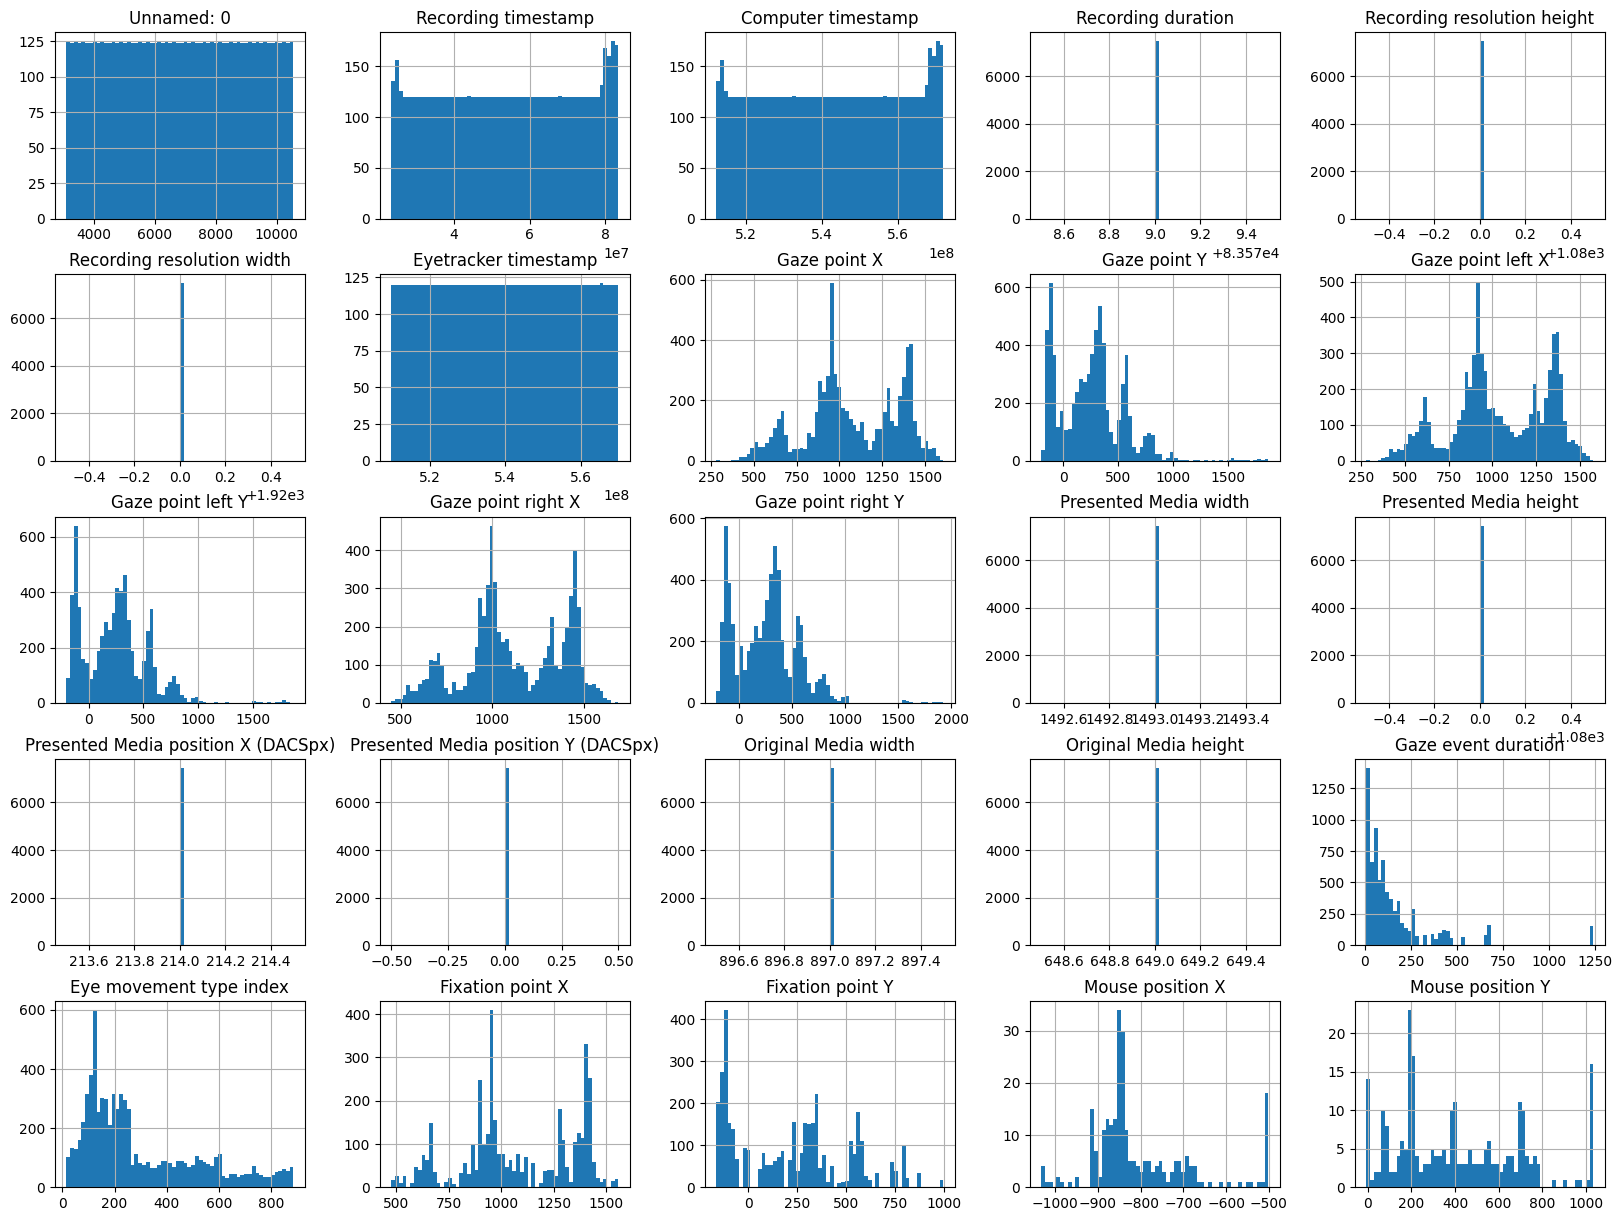

In [9]:
#Creating histogram plots for the columns in the DataFrame
df.hist(bins=60, figsize=(20, 15));

# Data Pre-procesing
* some of the columns that may not be necessary for model training.
   * Unnamed: 0: This appears to be an index column and is not relevant for the analysis.
   * Sensor: This column may not be relevant for the model as it is not clear what kind of sensor it is.
   * Project name, Export date, Participant name, Recording name, Recording date, Recording date UTC, Recording start time, Recording start time UTC, Recording duration, Timeline name, Recording Fixation filter name, Recording software version: These columns may not be directly related to the gaze behavior and may not be necessary for model training.
   * Recording resolution height, Recording resolution width, Recording monitor latency: These columns may not be directly related to the gaze behavior beacuse their std is zero and may not be necessary for model training.
   * Event and Event value: These columns may not be relevant for predicting gaze behavior.
   * Presented Stimulus name, Presented Media name: These columns may not be necessary for predicting gaze behavior unless the stimuli or media presented to the participant is of interest.
   * Eye movement type, Eye movement type index: These columns may not be relevant for predicting gaze behavior as they describe the type of eye movement rather than the gaze behavior itself.
   * validity left and validity right: keeping data which are assigned to be valid. dropping remaining values.
   * Mouse position X, Mouse position Y: These columns may not be necessary for predicting gaze behavior as the focus is on the gaze behavior and not the mouse behavior and it has 98% NaN values.
* replace all the , to . in the number values.
* One commonly used method for filling missing values in time series is to use interpolation, which can help preserve the underlying patterns and trends in the data.

In [154]:
def preprocess_data(data):
    """
    Preprocesses eye-tracking data by dropping unnecessary columns,
    filtering valid data, converting data types, interpolating missing values,
    and renaming columns.

    Args:
        data (DataFrame): Input eye-tracking data as a Pandas DataFrame.

    Returns:
        DataFrame: Preprocessed eye-tracking data as a Pandas DataFrame.
    """
    columns_dropped =['Unnamed: 0','Sensor','Project name', 'Export date', 'Recording name', 'Recording date',
                  'Recording date UTC','Recording start time', 'Recording start time UTC', 'Recording duration', 'Timeline name',
                  'Recording Fixation filter name','Recording software version','Recording resolution height', 'Recording resolution width',
                  'Recording monitor latency','Event', 'Event value','Presented Stimulus name', 'Presented Media name','Eye movement type',
                  'Eye movement type index','Mouse position X', 'Mouse position Y']

    # drop the columns
    df_preprocessed = data.drop(columns=columns_dropped)

    # keeping data which are assigned to be valid. dropping remaining values
    df_preprocessed = df_preprocessed[(df_preprocessed['Validity left'] == 'Valid') & (df_preprocessed['Validity right'] == 'Valid')]
    df_preprocessed.drop(columns=['Validity left', 'Validity right'], inplace=True)
    
    # replacing all commas to dots in the number values
    df_preprocessed = df_preprocessed.replace(to_replace=r',', value='.', regex=True)

    columns_to_convert = ['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 
                          'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right', 
                          'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 
                          'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 
                          'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 
                          'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 
                          'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 
                          'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']
    
    # converting selected columns to float data type
    df_preprocessed[columns_to_convert] = df_preprocessed[columns_to_convert].astype(float)

    # linear interpolation
    df_interpolated = df_preprocessed.interpolate(method='linear', limit_direction='forward')

    # filling remaining NaN values with forward fill method
    df_preprocessed = df_interpolated.fillna(method='ffill')

    # dropping rows with NaN values in 'Pupil diameter left' and 'Pupil diameter right' columns
    df_preprocessed.dropna(subset=['Pupil diameter left', 'Pupil diameter right'], inplace=True)
    
    # Convert 'Participant name' column to integer and rename it to 'Participant nr'
    df_preprocessed['Participant name'] = df_preprocessed['Participant name'].str[-2:].astype(int)
    df_preprocessed.rename(columns={'Participant name': 'Participant nr'}, inplace=True)
    
    return df_preprocessed

In [155]:
# Call the preprocess_data() function to preprocess the data
df_preprocessed = preprocess_data(df)


In [12]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6269 entries, 4 to 7463
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Recording timestamp                  6269 non-null   int64  
 1   Computer timestamp                   6269 non-null   int64  
 2   Participant nr                       6269 non-null   int32  
 3   Eyetracker timestamp                 6269 non-null   float64
 4   Gaze point X                         6269 non-null   float64
 5   Gaze point Y                         6269 non-null   float64
 6   Gaze point left X                    6269 non-null   float64
 7   Gaze point left Y                    6269 non-null   float64
 8   Gaze point right X                   6269 non-null   float64
 9   Gaze point right Y                   6269 non-null   float64
 10  Gaze direction left X                6269 non-null   float64
 11  Gaze direction left Y         

In [13]:
df_preprocessed.head()

Recording timestamp  Computer timestamp  Participant nr  \
4             23442782           512115853               1   
5             23451119           512124190               1   
6             23459447           512132518               1   
7             23467779           512140850               1   
8             23476117           512149188               1   

   Eyetracker timestamp  Gaze point X  Gaze point Y  Gaze point left X  \
4           509897311.0         962.0         346.0              912.0   
5           509905648.0         972.0         340.0              913.0   
6           509913976.0         970.0         323.0              922.0   
7           509922308.0         977.0         332.0              922.0   
8           509930645.0         975.0         352.0              931.0   

   Gaze point left Y  Gaze point right X  Gaze point right Y  ...  \
4              292.0              1012.0               400.0  ...   
5              287.0              1031.0               393.0  ...   
6              292.0              1017.0               354.0  ...   
7              292.0              1032.0               371.0  ...   
8              452.0              1018.0               253.0  ...   

   Presented Media height  Presented Media position X (DACSpx)  \
4                  1080.0                                214.0   
5                  1080.0                                214.0   
6                  1080.0                                214.0   
7                  1080.0                                214.0   
8                  1080.0                                214.0   

   Presented Media position Y (DACSpx)  Original Media width  \
4                                  0.0                 897.0   
5                                  0.0                 897.0   
6                                  0.0                 897.0   
7                                  0.0                 897.0   
8                                  0.0                 897.0   

   Original Media height  Gaze event duration  Fixation point X  \
4                  649.0                117.0             971.0   
5                  649.0                117.0             971.0   
6                  649.0                117.0             971.0   
7                  649.0                117.0             971.0   
8                  649.0                117.0             971.0   

   Fixation point Y  Fixation point X (MCSnorm)  Fixation point Y (MCSnorm)  
4             341.0                      0.5073                       0.316  
5             341.0                      0.5073                       0.316  
6             341.0                      0.5073                       0.316  
7             341.0                      0.5073                       0.316  
8             341.0                      0.5073                       0.316  

[5 rows x 45 columns]

Time series Plot

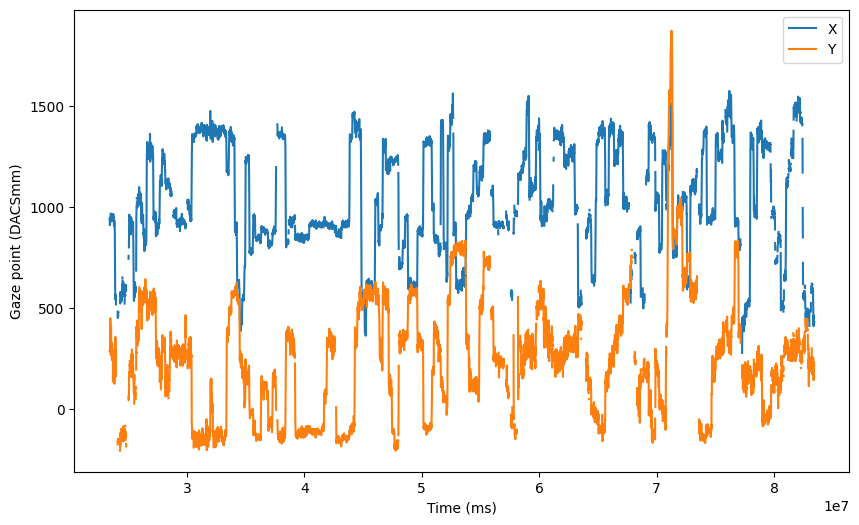

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Recording timestamp'], df['Gaze point left X'], label='X')
ax.plot(df['Recording timestamp'], df['Gaze point left Y'], label='Y')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Gaze point (DACSmm)')
ax.legend()
plt.show()

Plotting the time series of "Gaze event duration" for fixations longer than a certain duration (e.g., 500 ms):

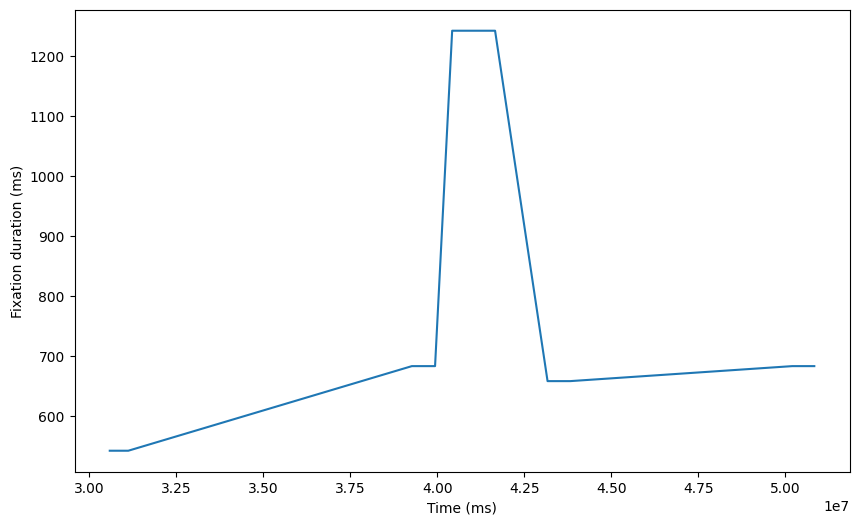

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
mask = df['Gaze event duration'] > 500
ax.plot(df.loc[mask, 'Recording timestamp'], df.loc[mask, 'Gaze event duration'])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Fixation duration (ms)')
plt.show()

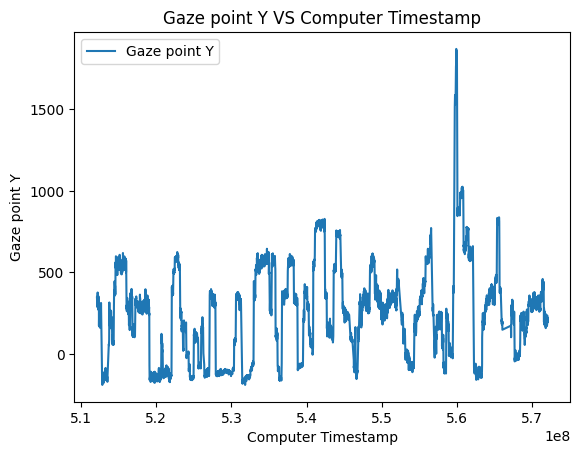

In [16]:
def plot_dataset(df_preprocessed, x="Computer timestamp", y="Gaze point Y"):
    plt.plot( df_preprocessed[x],df_preprocessed[y], label=y)
    plt.title(y + " VS Computer Timestamp")
    plt.xlabel("Computer Timestamp")
    plt.ylabel(y)
    plt.legend()
    plt.rcParams["figure.figsize"] = (8, 6)
    plt.show()
plot_dataset(df_preprocessed)

In [17]:
def plot_timeseries(df):
    """
    Plot time series data from DataFrame using matplotlib.

    Args:
        df (pd.DataFrame): DataFrame containing the data to be plotted.

    Returns:
        None
    """
    data = df_preprocessed
    plt.rcParams["figure.figsize"] = (20, 20)
    df_columns = list(data.columns)[1:]
    fig, axs = plt.subplots(nrows=6, ncols=8)
    fig.subplots_adjust(hspace=0.6, wspace=0.8)
    for i in range(len(df_columns)):
        col = df_columns[i]
        try:
            ax = axs.flat[i]
            ax.set_title(col)
            ax.plot(data["Recording timestamp"], data[col], label=col)
        except ValueError:
            print("Found value error in column: ", col)
        except KeyError:
            pass
        except TypeError:
            pass
    plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


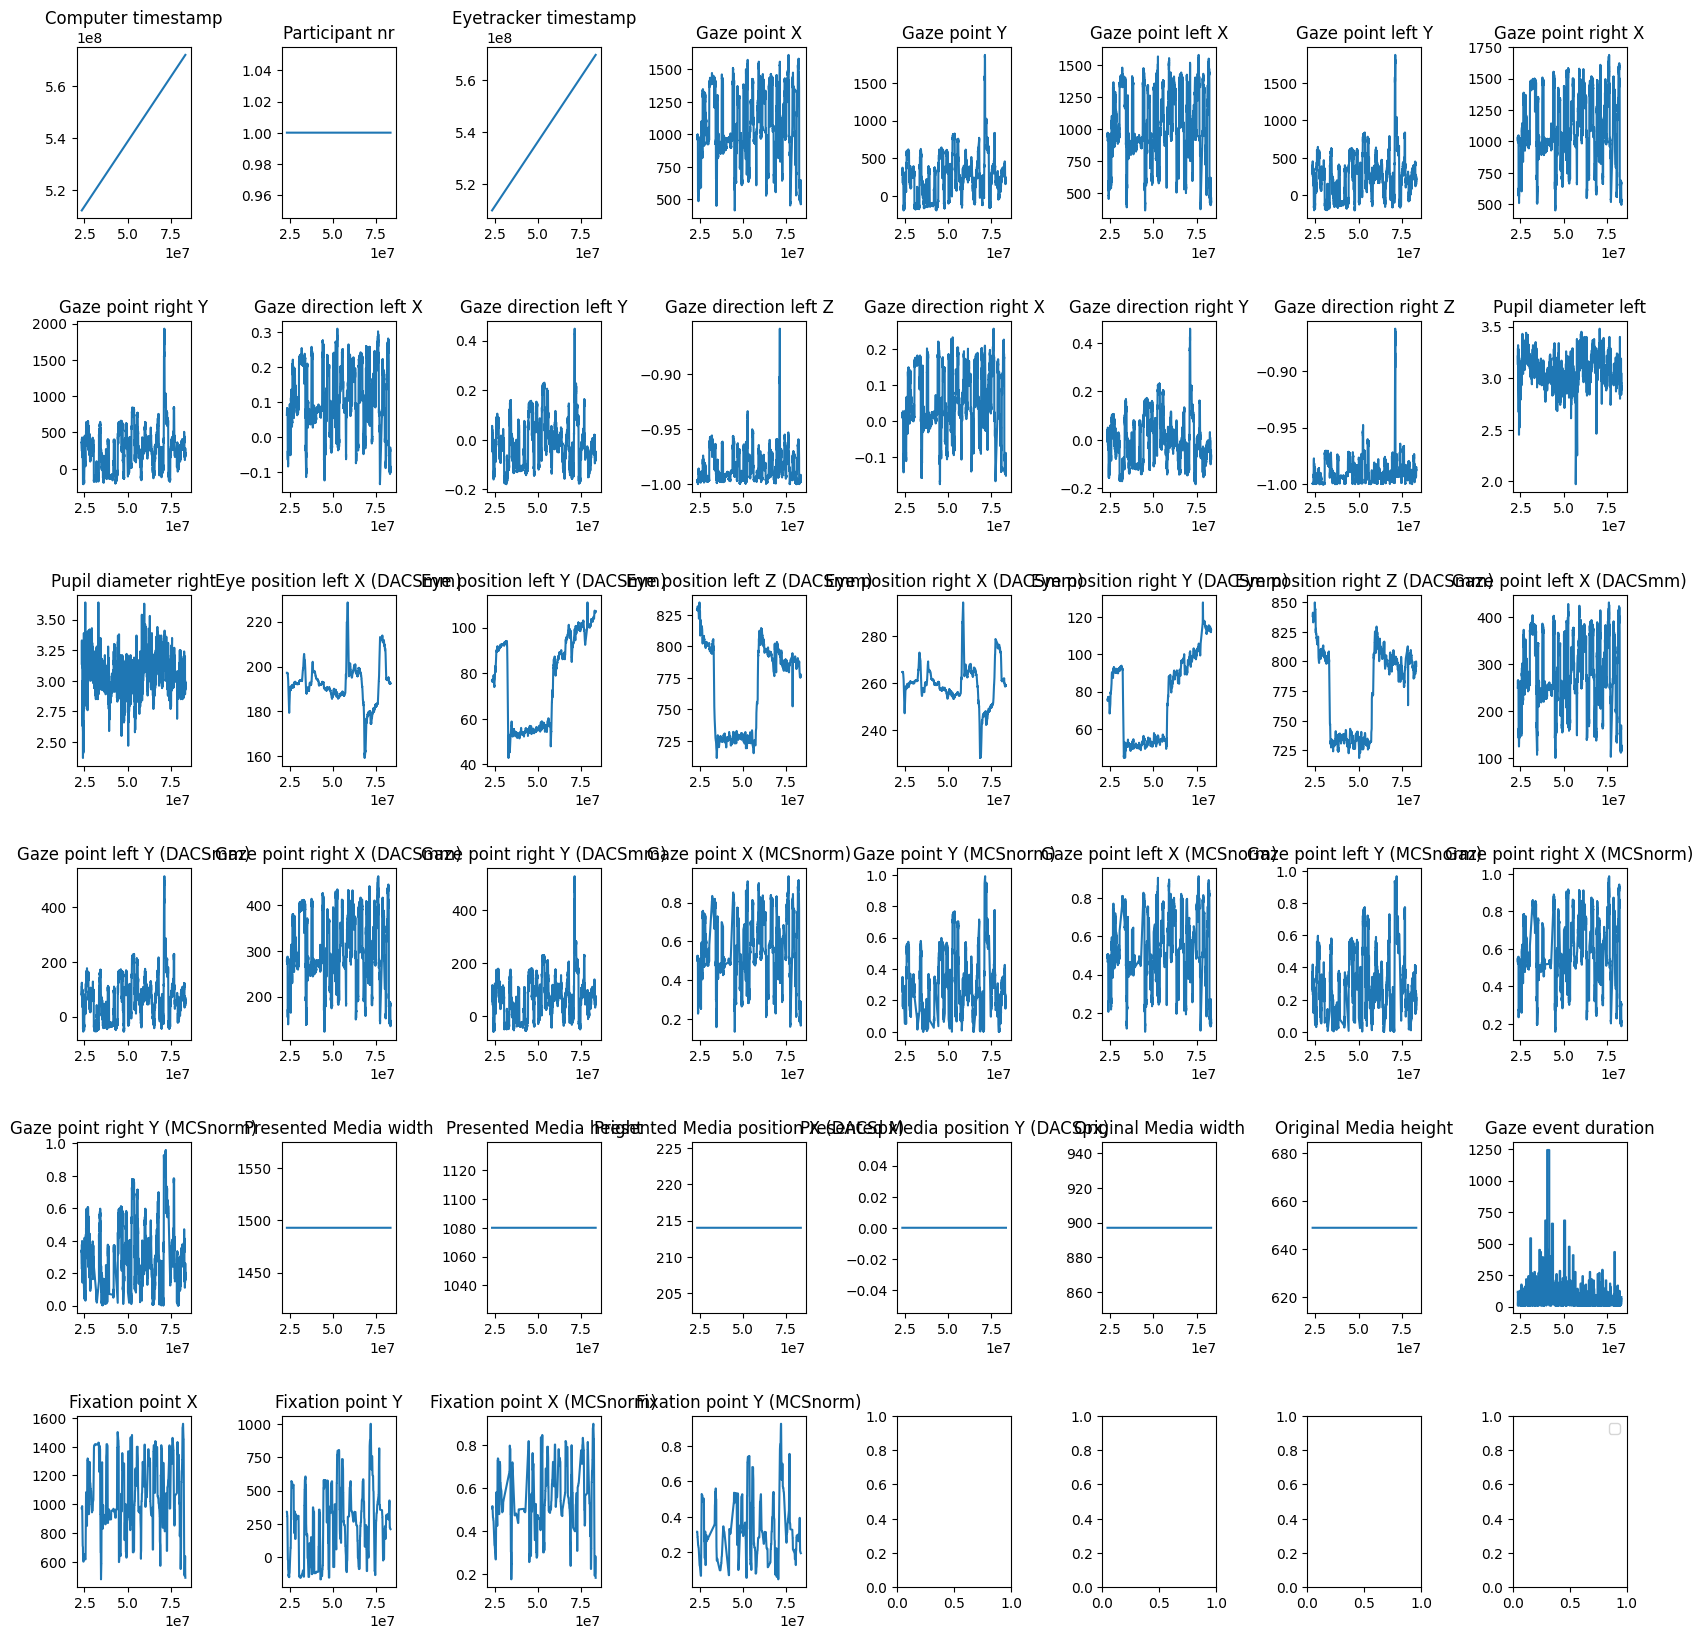

In [18]:
plot_timeseries(df_preprocessed)


After plotting the time-series graphs, I got to know we can delete the columns which have a constant graph with respect to the "Eyetracker timestamp", "Computer timestamp", "Recording timestamp" column as they do not provide any useful information.

In [158]:
#Identify constant columns
constant_cols = []
for col in df_preprocessed.columns:
    if col not in ["Eyetracker timestamp", "Computer timestamp", "Recording timestamp"]:
        if df_preprocessed[col].nunique() == 1:
            constant_cols.append(col)

#Drop constant columns from the DataFrame
df_preprocessed.drop(columns=constant_cols, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


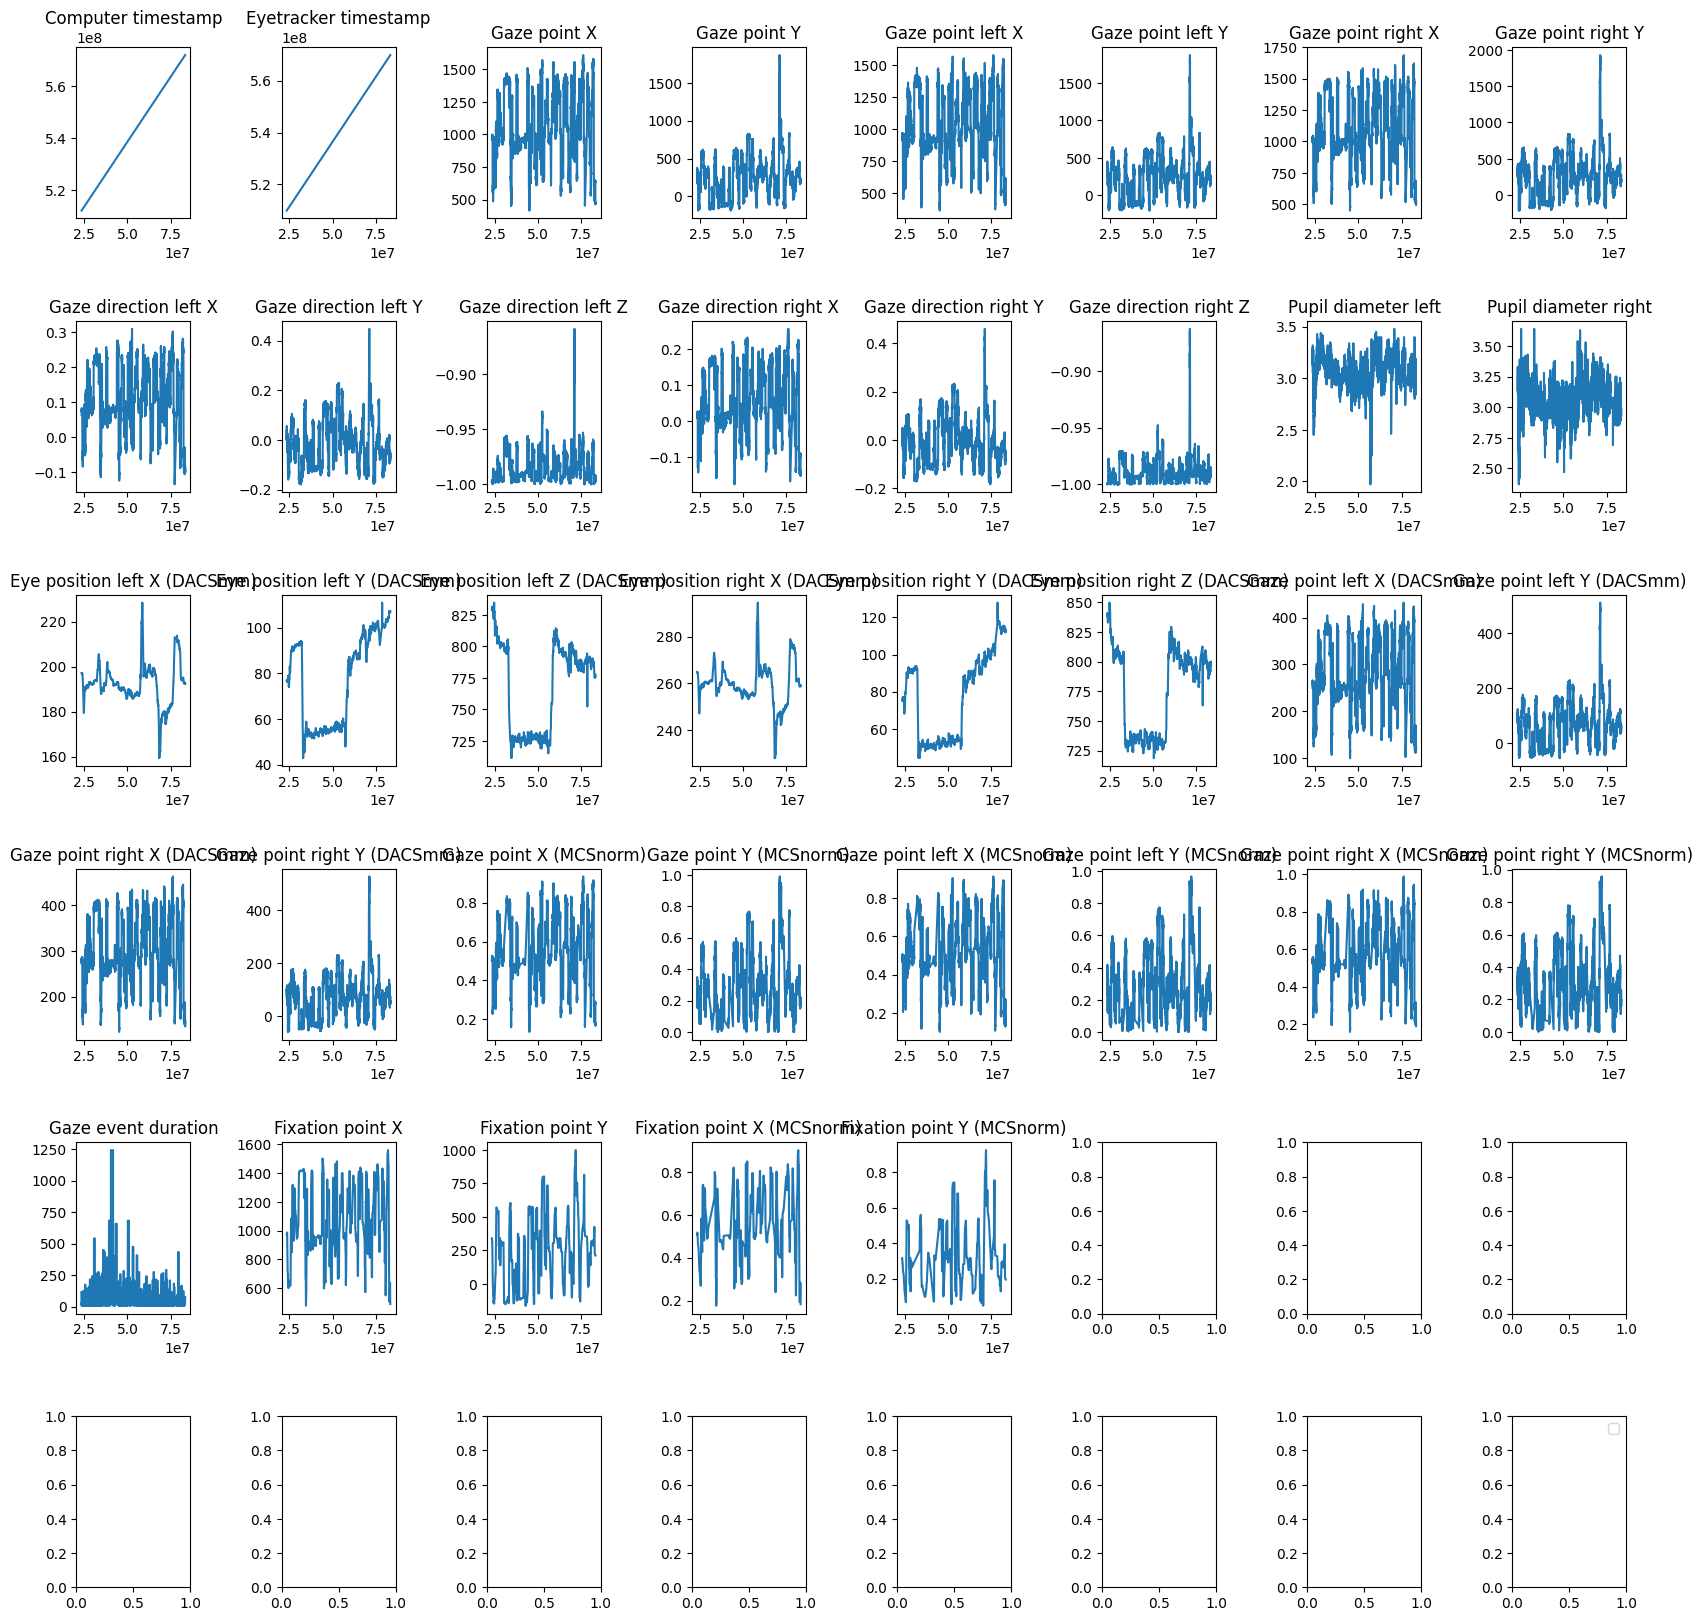

In [20]:
plot_timeseries(df_preprocessed)

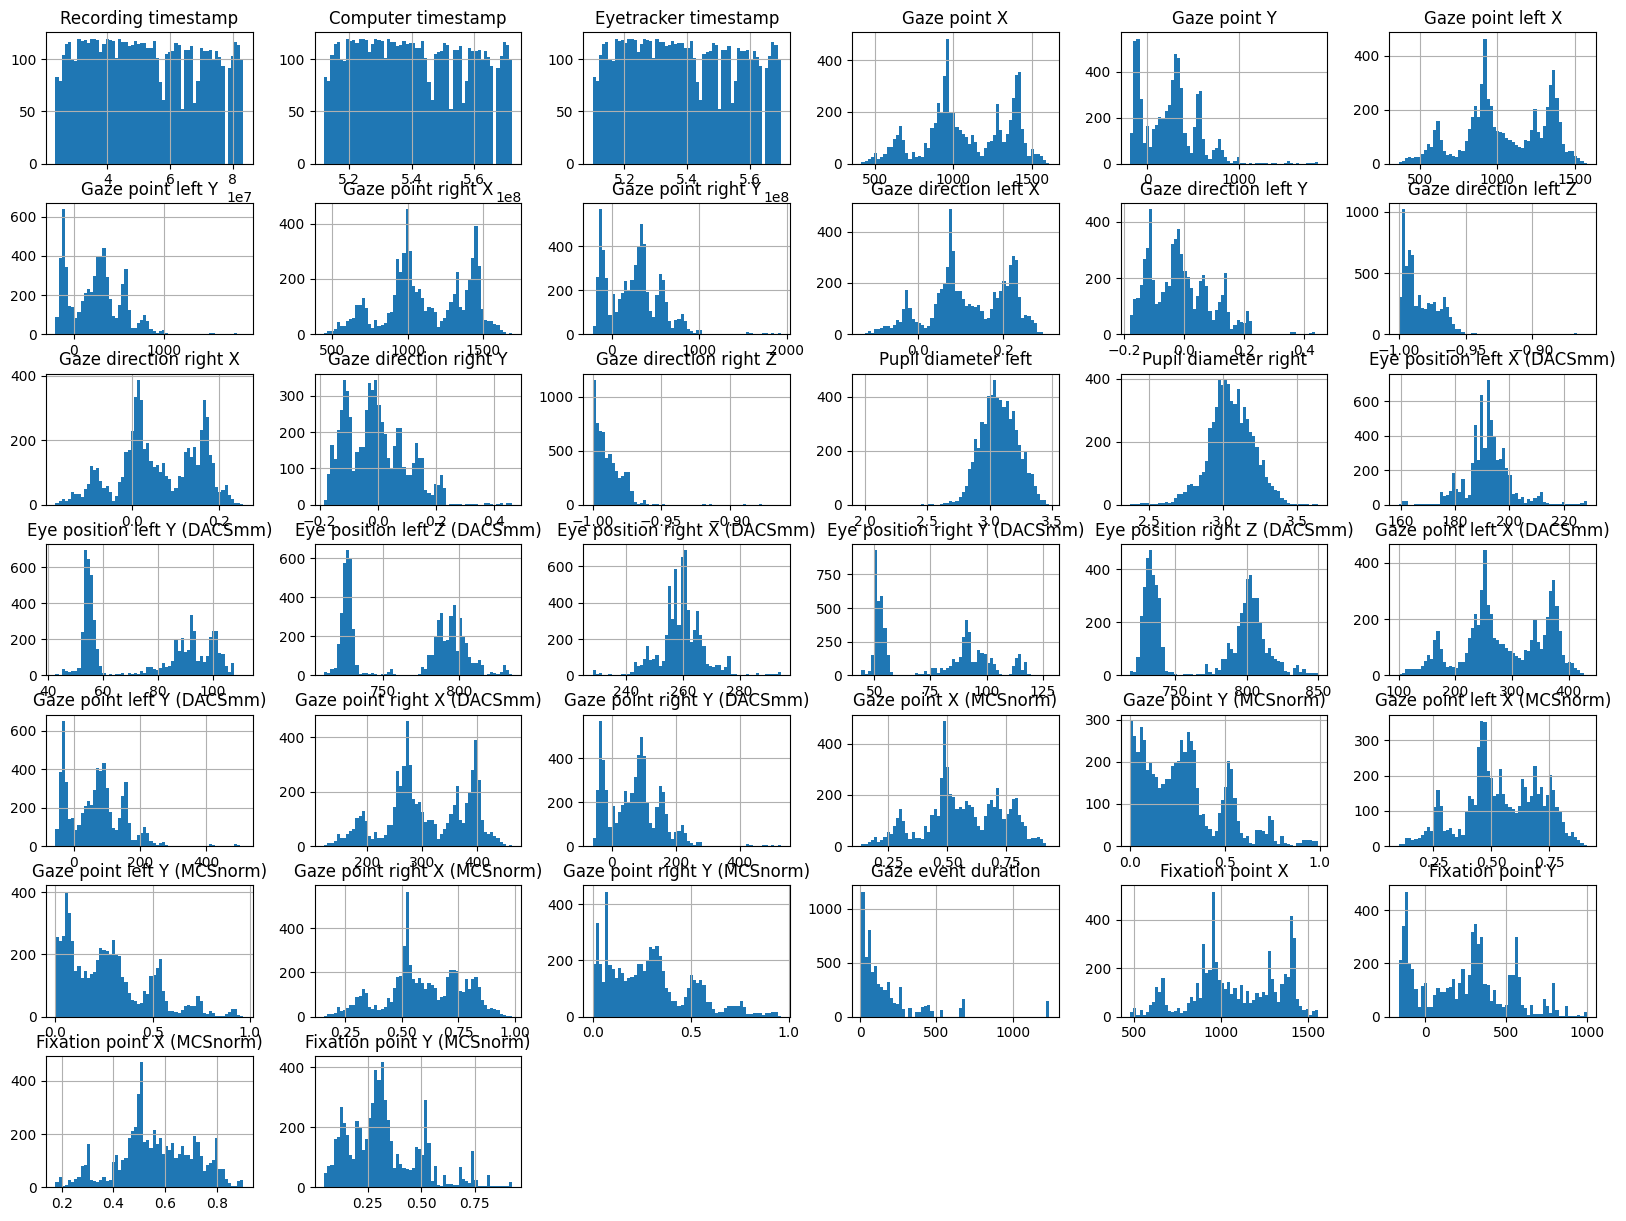

In [160]:
#Creating histogram plots for the columns in the DataFrame
df_preprocessed.hist(bins=60, figsize=(20, 15));

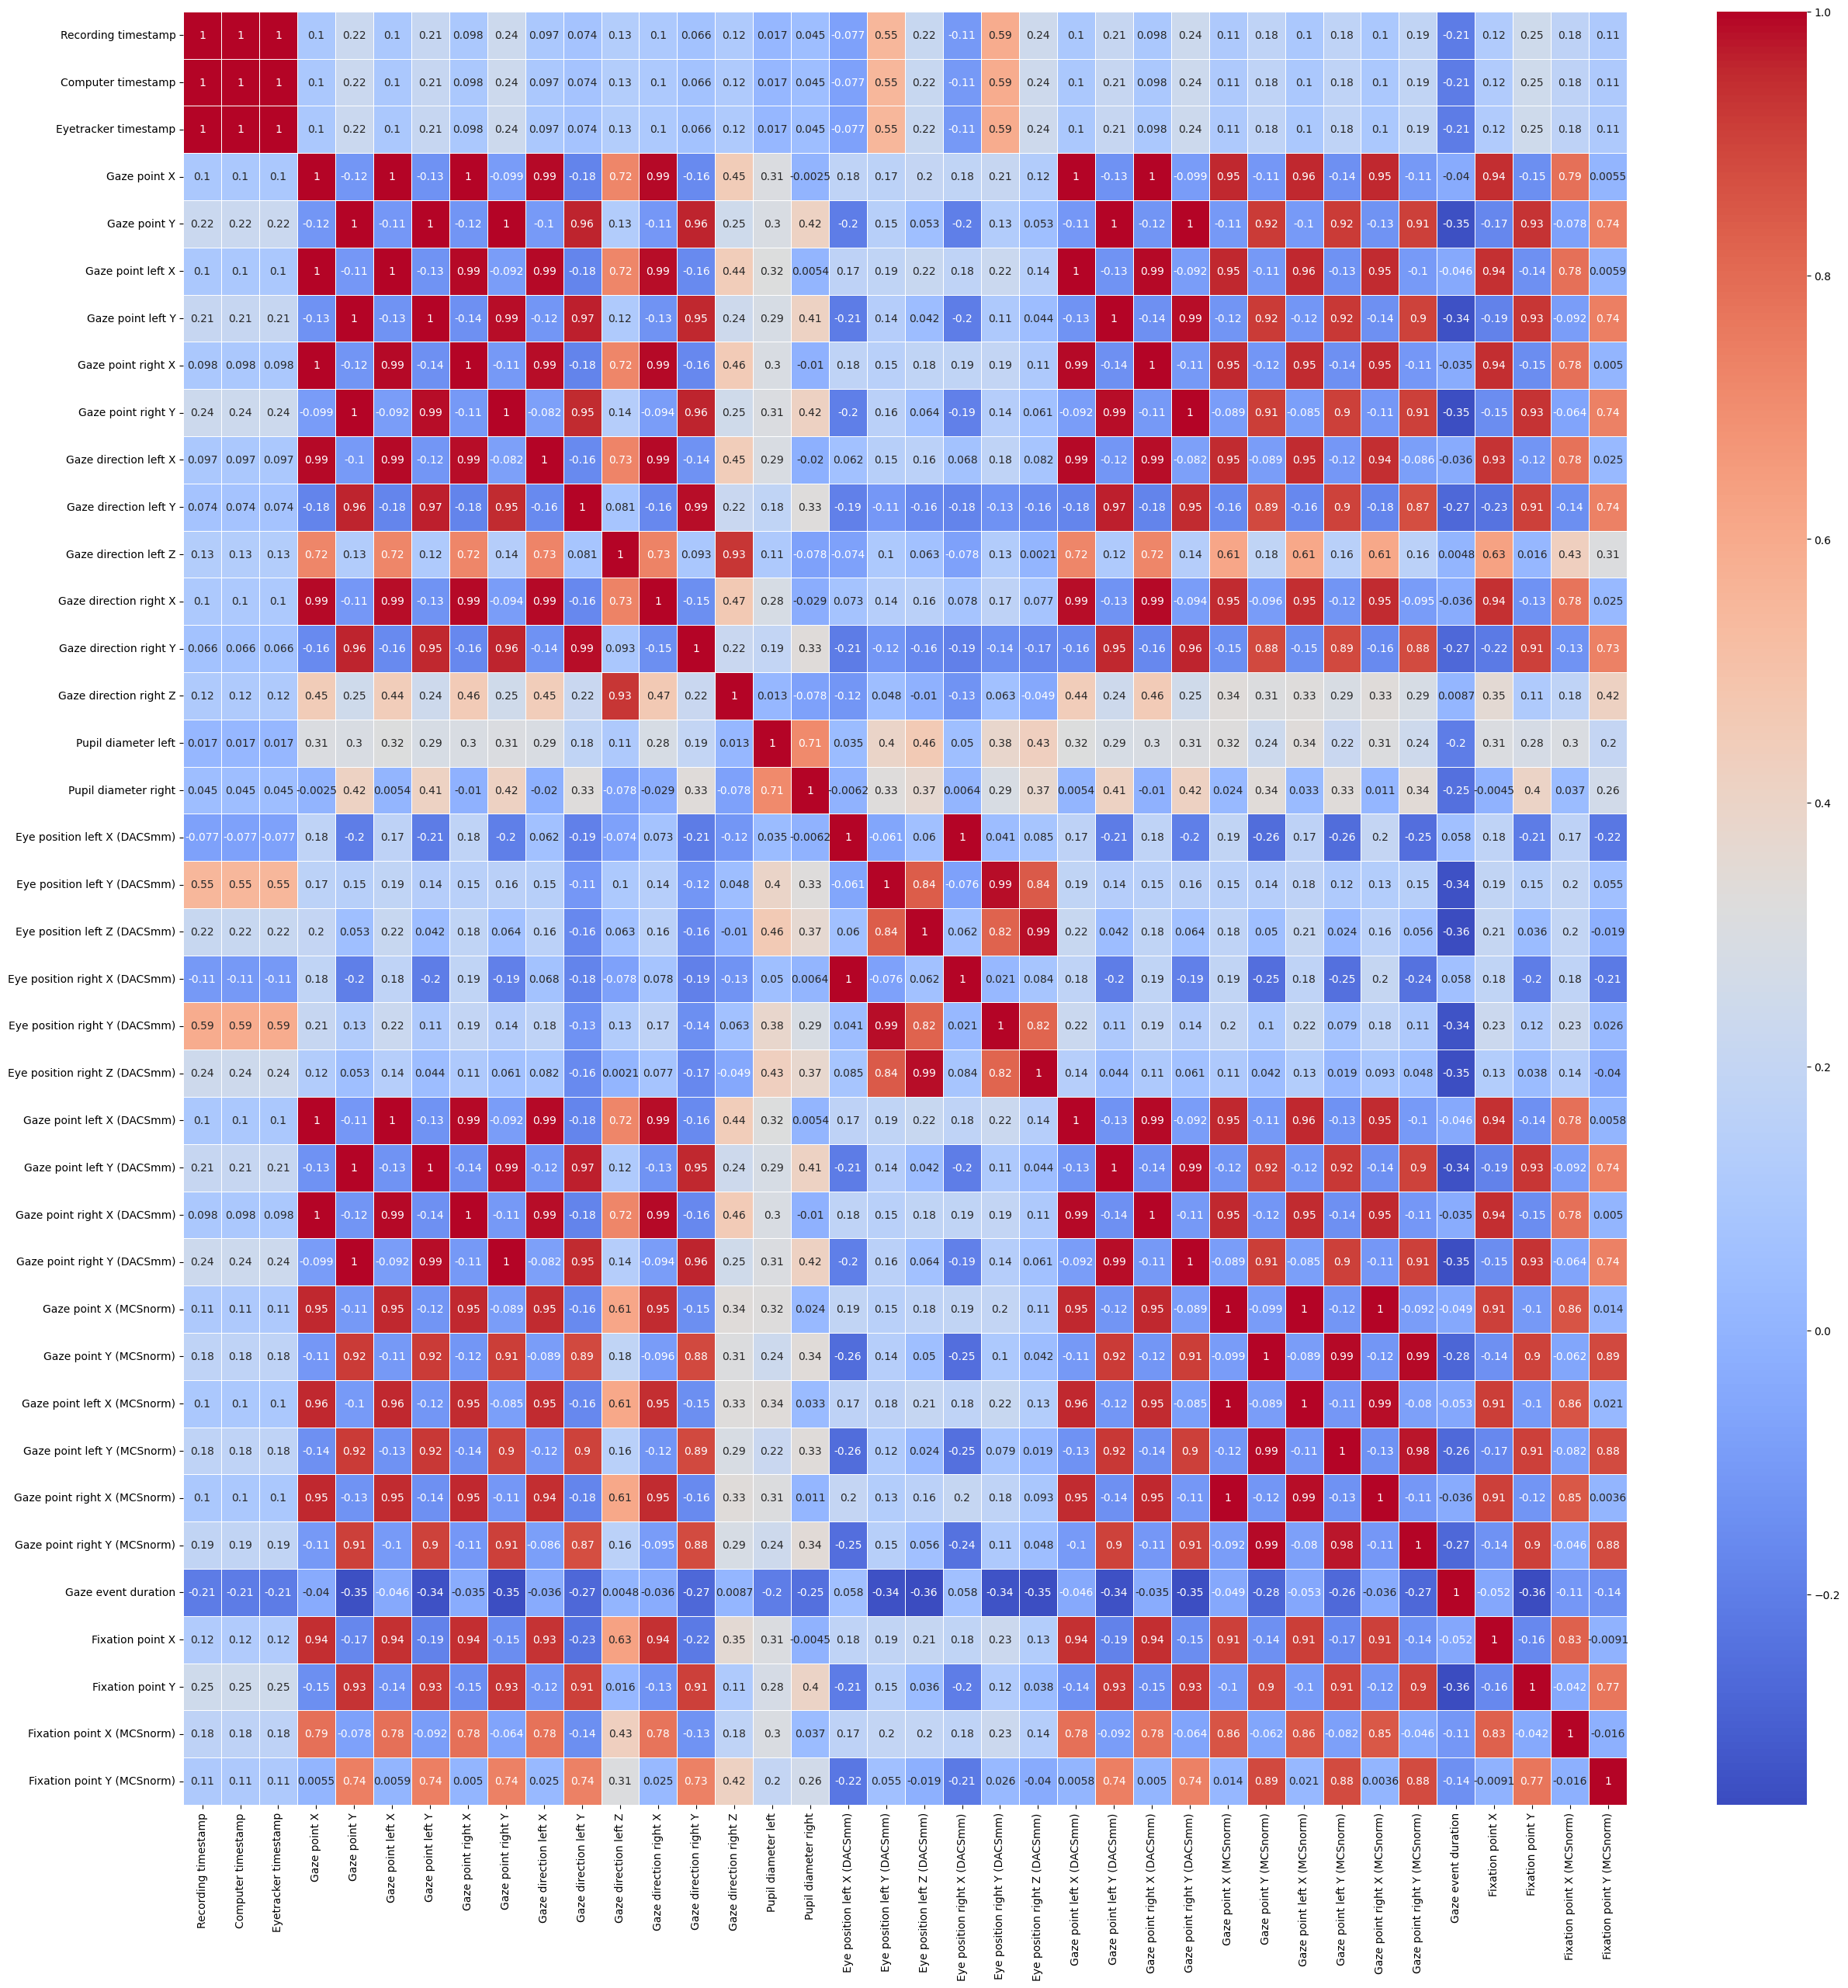

In [161]:
#correlation matrix for columns after preprocessing 
correlation_matrix = df_preprocessed.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.show()

Analyzing gaze behavior during tasks

Analyzing gaze behavior during tasks typically involves processing the raw eye tracker data to extract meaningful gaze metrics that can provide insights into the participant's visual attention patterns. Here are some common methods that can be used to analyze gaze behavior during tasks:

Fixation detection: Fixations are periods of stable gaze where the eyes are relatively stationary. Fixation detection algorithms can be used to identify fixations from raw gaze data, typically by setting thresholds for parameters such as gaze velocity or dispersion. Fixation duration, fixation count, and fixation locations can be calculated as metrics of gaze behavior.

Saccade detection: Saccades are rapid eye movements between fixations that are used to shift gaze from one location to another. Saccade detection algorithms can be used to identify saccades from raw gaze data, typically by detecting rapid changes in gaze position. Saccade amplitude, saccade duration, and saccade count can be calculated as metrics of gaze behavior.

In [21]:
# Extract gaze point X and Y coordinates
gaze_x = df_preprocessed['Gaze point X']
gaze_y = df_preprocessed['Gaze point Y']

# Define fixation and saccade threshold values
fixation_threshold = 30
saccade_threshold = 30 

# Initialize fixation and saccade lists
fixations = []
saccades = []

# Loop through the gaze data to detect fixations and saccades
for i in range(1, len(gaze_x)):
    # Calculate gaze velocity as the Euclidean distance between consecutive gaze points
    velocity = np.sqrt((gaze_x.iloc[i] - gaze_x.iloc[i-1]) ** 2 + (gaze_y.iloc[i] - gaze_y.iloc[i-1]) ** 2)
    # Check if the velocity falls below the fixation threshold, indicating a fixation
    if velocity < fixation_threshold:
        # Add the gaze point coordinates to the fixations list
        fixations.append((gaze_x.iloc[i], gaze_y.iloc[i]))
    # Check if the velocity exceeds the saccade threshold, indicating a saccade
    elif velocity > saccade_threshold:
        # Add the gaze point coordinates to the saccades list
        saccades.append((gaze_x.iloc[i], gaze_y.iloc[i]))

# Convert fixations and saccades to numpy arrays
fixations = np.array(fixations)
saccades = np.array(saccades)

print("fixations : ",fixations)
print()
print("saccades : ",saccades)

fixations :  [[972. 340.]
 [970. 323.]
 [977. 332.]
 ...
 [498. 221.]
 [482. 218.]
 [480. 213.]]

saccades :  [[989. 288.]
 [979. 336.]
 [990. 301.]
 ...
 [497. 213.]
 [467. 191.]
 [462. 201.]]


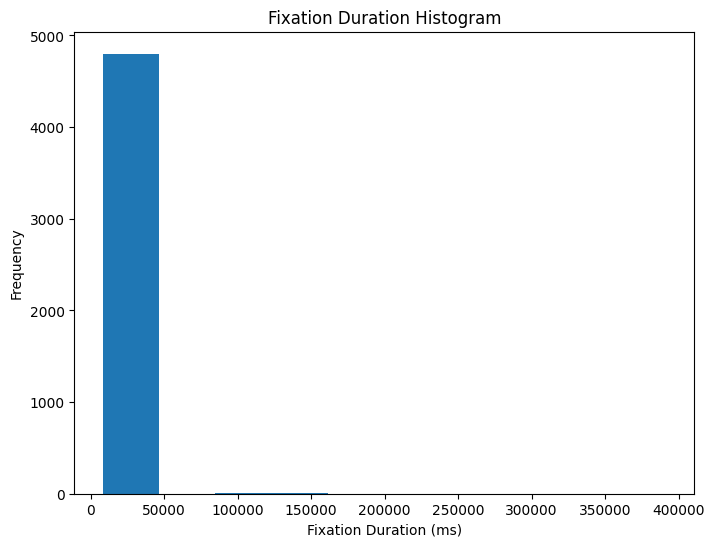

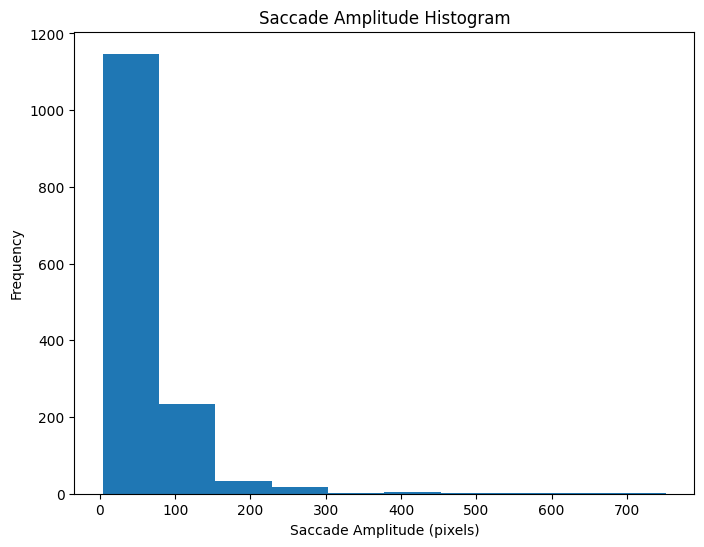

In [22]:
# Calculate fixation duration
fixation_durations = []
for i in range(len(fixations) - 1):
    fixation_duration = df_preprocessed['Recording timestamp'].iloc[i+1] - df_preprocessed['Recording timestamp'].iloc[i]
    fixation_durations.append(fixation_duration)

# Calculate saccade amplitude
saccade_amplitudes = []
for i in range(len(saccades) - 1):
    saccade_amplitude = np.sqrt((saccades[i+1][0] - saccades[i][0]) ** 2 + (saccades[i+1][1] - saccades[i][1]) ** 2)
    saccade_amplitudes.append(saccade_amplitude)

#print("fixation duration: ",fixation_duration)
#print("sccade amplitudes: ",saccade_amplitudes)

# Generate fixation duration histogram
plt.figure(figsize=(8, 6))
plt.hist(fixation_durations, bins=10)
#plt.figure(figsize=(10, 7))
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.title('Fixation Duration Histogram')
plt.show()

# Generate saccade amplitude histogram
plt.figure(figsize=(8, 6))
plt.hist(saccade_amplitudes, bins=10)
plt.xlabel('Saccade Amplitude (pixels)')
plt.ylabel('Frequency')
plt.title('Saccade Amplitude Histogram')
plt.show()

Heatmaps and scanpaths: Heatmaps and scanpaths are visual representations of gaze behavior during tasks. Heatmaps are created by aggregating gaze data into a 2D grid and calculating the density of fixations at each grid location, while scanpaths are the sequential order of fixations and saccades. Heatmaps and scanpaths can provide insights into areas of interest, gaze patterns, and exploration strategies during the tasks.

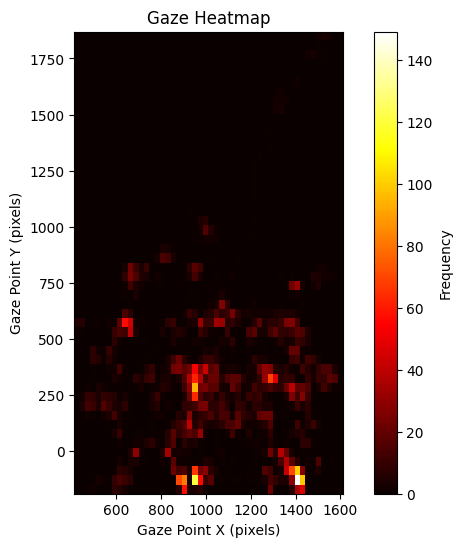

In [23]:
# Generate gaze heatmap
heatmap, xedges, yedges = np.histogram2d(gaze_x, gaze_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig = plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
plt.colorbar(label='Frequency')
plt.xlabel('Gaze Point X (pixels)')
plt.ylabel('Gaze Point Y (pixels)')
plt.title('Gaze Heatmap')
plt.show()

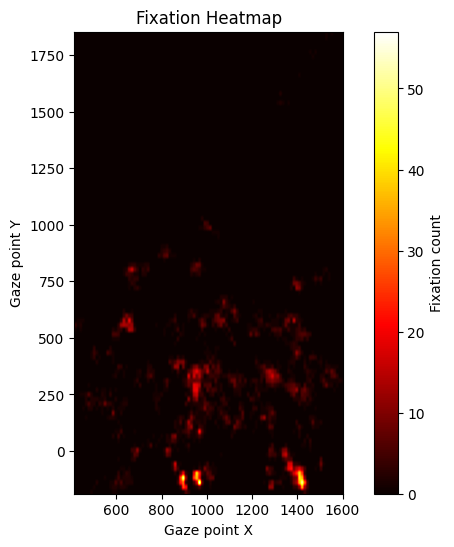

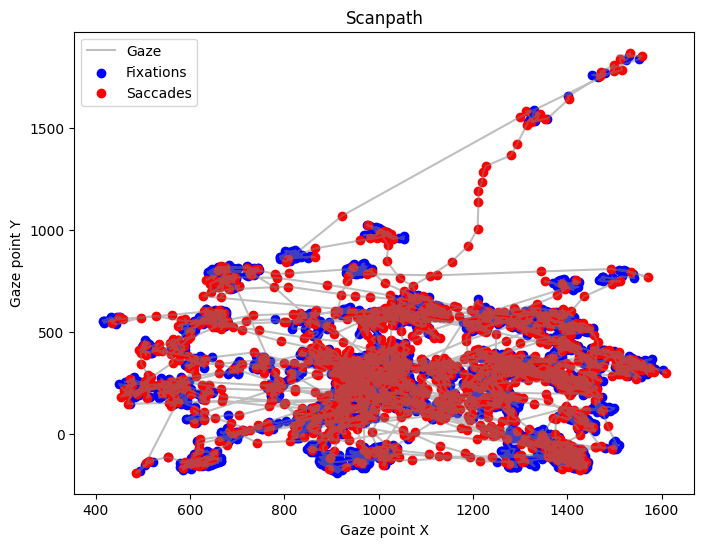

Fixation duration: 8315 fixations
Saccade amplitude: 11.180339887498949 pixels


In [24]:
# Generate a heatmap of fixations
heatmap, xedges, yedges = np.histogram2d(fixations[:, 0], fixations[:, 1], bins=(100, 100))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
plt.colorbar(label='Fixation count')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.title('Fixation Heatmap')
plt.show()

# Generate a scanpath plot of fixations and saccades
plt.figure(figsize=(8, 6))
plt.plot(gaze_x, gaze_y, color='gray', alpha=0.5, label='Gaze')
plt.scatter(fixations[:, 0], fixations[:, 1], color='blue', label='Fixations')
plt.scatter(saccades[:, 0], saccades[:, 1], color='red', label='Saccades')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.legend()
plt.title('Scanpath')
plt.show()

# Print analysis results
print('Fixation duration:', fixation_duration, 'fixations')
print('Saccade amplitude:', saccade_amplitude, 'pixels')

Understanding the significance of the signals from the data set and how they affect the model's prediction of empathy comes through data exploration.

# Using 60 files for modling

* We looked at one file out of 502 in order to better understand the data it contained. Now, for 60 participants, considering one trail file per participant will be used to develop the model. 


Reading CSV files into DataFrames

In [2]:
data_path = "EyeT/"

participants = range(1, 61)
trial_num = 1

selected_files = []

for participant in participants:
    participant_files = os.listdir(data_path)
    participant_files = [f for f in participant_files if f.endswith(f"_participant_{participant}_trial_{trial_num}.csv")]
    if len(participant_files) == 0:
        print(f"No files found for participant {participant}")
        continue
    selected_files.append(os.path.join(data_path, participant_files[0]))

In [3]:
len(selected_files)

60

In [4]:
# Initialize an empty list to store the dataframes
dfs = []

#loop through each selected files
for files in selected_files:
  df = pd.read_csv(files)
  dfs.append(df)

#Concatenate all the DataFrames into a single one
df = pd.concat(dfs)
print(df.shape)
df.head()

(390380, 71)


Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0       12532             13725441           604307462          NaN   
1       12533             13725441           604307462          NaN   
2       12534             13727290           604309311  Eye Tracker   
3       12535             13735621           604317642  Eye Tracker   
4       12536             13743935           604325956  Eye Tracker   

            Project name Export date Participant name Recording name  \
0  Test group experiment  24.09.2020  Participant0001     Recording2   
1  Test group experiment  24.09.2020  Participant0001     Recording2   
2  Test group experiment  24.09.2020  Participant0001     Recording2   
3  Test group experiment  24.09.2020  Participant0001     Recording2   
4  Test group experiment  24.09.2020  Participant0001     Recording2   

  Recording date Recording date UTC  ... Original Media height  \
0     24.09.2020         24.09.2020  ...                   NaN   
1     24.09.2020         24.09.2020  ...                   NaN   
2     24.09.2020         24.09.2020  ...                 649.0   
3     24.09.2020         24.09.2020  ...                 649.0   
4     24.09.2020         24.09.2020  ...                 649.0   

  Eye movement type  Gaze event duration Eye movement type index  \
0           Saccade                 25.0                   125.0   
1           Saccade                 25.0                   125.0   
2           Saccade                 25.0                   125.0   
3          Fixation                 75.0                    43.0   
4          Fixation                 75.0                    43.0   

  Fixation point X Fixation point Y  Fixation point X (MCSnorm)  \
0              NaN              NaN                         NaN   
1              NaN              NaN                         NaN   
2              NaN              NaN                         NaN   
3            925.0            349.0                      0,4763   
4            925.0            349.0                      0,4763   

   Fixation point Y (MCSnorm) Mouse position X  Mouse position Y  
0                         NaN              NaN               NaN  
1                         NaN              NaN               NaN  
2                         NaN              NaN               NaN  
3                      0,3232              NaN               NaN  
4                      0,3232              NaN               NaN  

[5 rows x 71 columns]

Data Pre-procesing

* Added the number of columns to the drop-down list in the preceding function. Following a time series plot check, certain columns with constant values were dropped. Therefore, I have added the names of those columns with the previous list of columns dropped.


In [33]:
def preprocess_data(data):
    """
    Preprocesses eye-tracking data by dropping unnecessary columns,
    filtering valid data, converting data types, interpolating missing values,
    and renaming columns.

    Args:
        data (DataFrame): Input eye-tracking data as a Pandas DataFrame.

    Returns:
        DataFrame: Preprocessed eye-tracking data as a Pandas DataFrame.
    """
    columns_dropped =['Recording timestamp', 'Computer timestamp',
                      'Recording duration', 'Eyetracker timestamp','Event value', 'Sensor', 'Recording name', 'Eye movement type index', 
                      'Eye movement type', 'Recording resolution width', 'Recording resolution height', 
                      'Timeline name', 'Export date', 
                      'Recording date UTC', 'Mouse position X', 'Recording start time', 
                      'Recording Fixation filter name', 'Presented Stimulus name', 
                      'Recording software version', 'Original Media height', 'Presented Media width', 
                      'Presented Media name', 'Recording date', 'Recording start time UTC', 'Original Media width', 
                      'Presented Media position X (DACSpx)', 'Unnamed: 0', 'Event', 'Presented Media position Y (DACSpx)', 
                      'Mouse position Y', 'Recording monitor latency', 'Project name', 'Presented Media height']

    # drop the columns
    df_preprocessed = data.drop(columns=columns_dropped)

    # keeping data which are assigned to be valid. dropping remaining values
    df_preprocessed = df_preprocessed[(df_preprocessed['Validity left'] == 'Valid') & (df_preprocessed['Validity right'] == 'Valid')]
    df_preprocessed.drop(columns=['Validity left', 'Validity right'], inplace=True)
    
    # replacing all commas to dots in the number values
    df_preprocessed = df_preprocessed.replace(to_replace=r',', value='.', regex=True)

    columns_to_convert = ['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 
                          'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right', 
                          'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 
                          'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 
                          'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 
                          'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 
                          'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 
                          'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']
    
    # converting selected columns to float data type
    df_preprocessed[columns_to_convert] = df_preprocessed[columns_to_convert].astype(float)

    # linear interpolation
    df_interpolated = df_preprocessed.interpolate(method='linear', limit_direction='forward')

    # filling remaining NaN values with forward fill method
    df_preprocessed = df_interpolated.fillna(method='ffill')

    # dropping rows with NaN values in 'Pupil diameter left' and 'Pupil diameter right' columns
    df_preprocessed.dropna(subset=['Pupil diameter left', 'Pupil diameter right'], inplace=True)
    
    # Convert 'Participant name' column to integer and rename it to 'Participant nr'
    df_preprocessed['Participant name'] = df_preprocessed['Participant name'].str[-2:].astype(int)
    df_preprocessed.rename(columns={'Participant name': 'Participant nr'}, inplace=True)
    
    return df_preprocessed

In [34]:
# Call the preprocess_data() function to preprocess the data
df_preprocessed = preprocess_data(df)


In [35]:
df_questionnaire_1 = pd.read_csv("Questionnaire_datasetIA.csv",encoding='latin-1')

# questionnaire could be used as the ground truth
df_questionnaire = df_questionnaire_1[['Participant nr','Total Score original']]
# there are 40 questions and each question worth 5 points
#scores.describe()
df_questionnaire.head()


Participant nr  Total Score original
0               1                   108
1               2                   105
2               3                    81
3               4                    96
4               5                   106

In [36]:
# Merge the dataframes on 'Participant nr'
df_merged = pd.merge(df_preprocessed, df_questionnaire, on='Participant nr')

In [37]:
df_merged.head()

Participant nr  Gaze point X  Gaze point Y  Gaze point left X  \
0               1         918.0         344.0              879.0   
1               1         922.0         355.0              895.0   
2               1         929.0         356.0              894.0   
3               1         931.0         356.0              897.0   
4               1         929.0         354.0              881.0   

   Gaze point left Y  Gaze point right X  Gaze point right Y  \
0              340.0               956.0               348.0   
1              357.0               950.0               354.0   
2              359.0               964.0               353.0   
3              352.0               965.0               359.0   
4              355.0               977.0               352.0   

   Gaze direction left X  Gaze direction left Y  Gaze direction left Z  ...  \
0                0.06491                0.06155               -0.99599  ...   
1                0.07087                0.06757               -0.99519  ...   
2                0.07035                0.06806               -0.99520  ...   
3                0.07159                0.06562               -0.99527  ...   
4                0.06585                0.06673               -0.99560  ...   

   Gaze point left X (MCSnorm)  Gaze point left Y (MCSnorm)  \
0                       0.4457                       0.3150   
1                       0.4567                       0.3306   
2                       0.4556                       0.3320   
3                       0.4578                       0.3260   
4                       0.4474                       0.3290   

   Gaze point right X (MCSnorm)  Gaze point right Y (MCSnorm)  \
0                        0.4976                        0.3225   
1                        0.4931                        0.3274   
2                        0.5024                        0.3269   
3                        0.5032                        0.3324   
4                        0.5117                        0.3258   

   Gaze event duration  Fixation point X  Fixation point Y  \
0                 75.0             925.0             349.0   
1                 75.0             925.0             349.0   
2                 75.0             925.0             349.0   
3                 75.0             925.0             349.0   
4                 75.0             925.0             349.0   

   Fixation point X (MCSnorm)  Fixation point Y (MCSnorm)  \
0                      0.4763                      0.3232   
1                      0.4763                      0.3232   
2                      0.4763                      0.3232   
3                      0.4763                      0.3232   
4                      0.4763                      0.3232   

   Total Score original  
0                   108  
1                   108  
2                   108  
3                   108  
4                   108  

[5 rows x 37 columns]

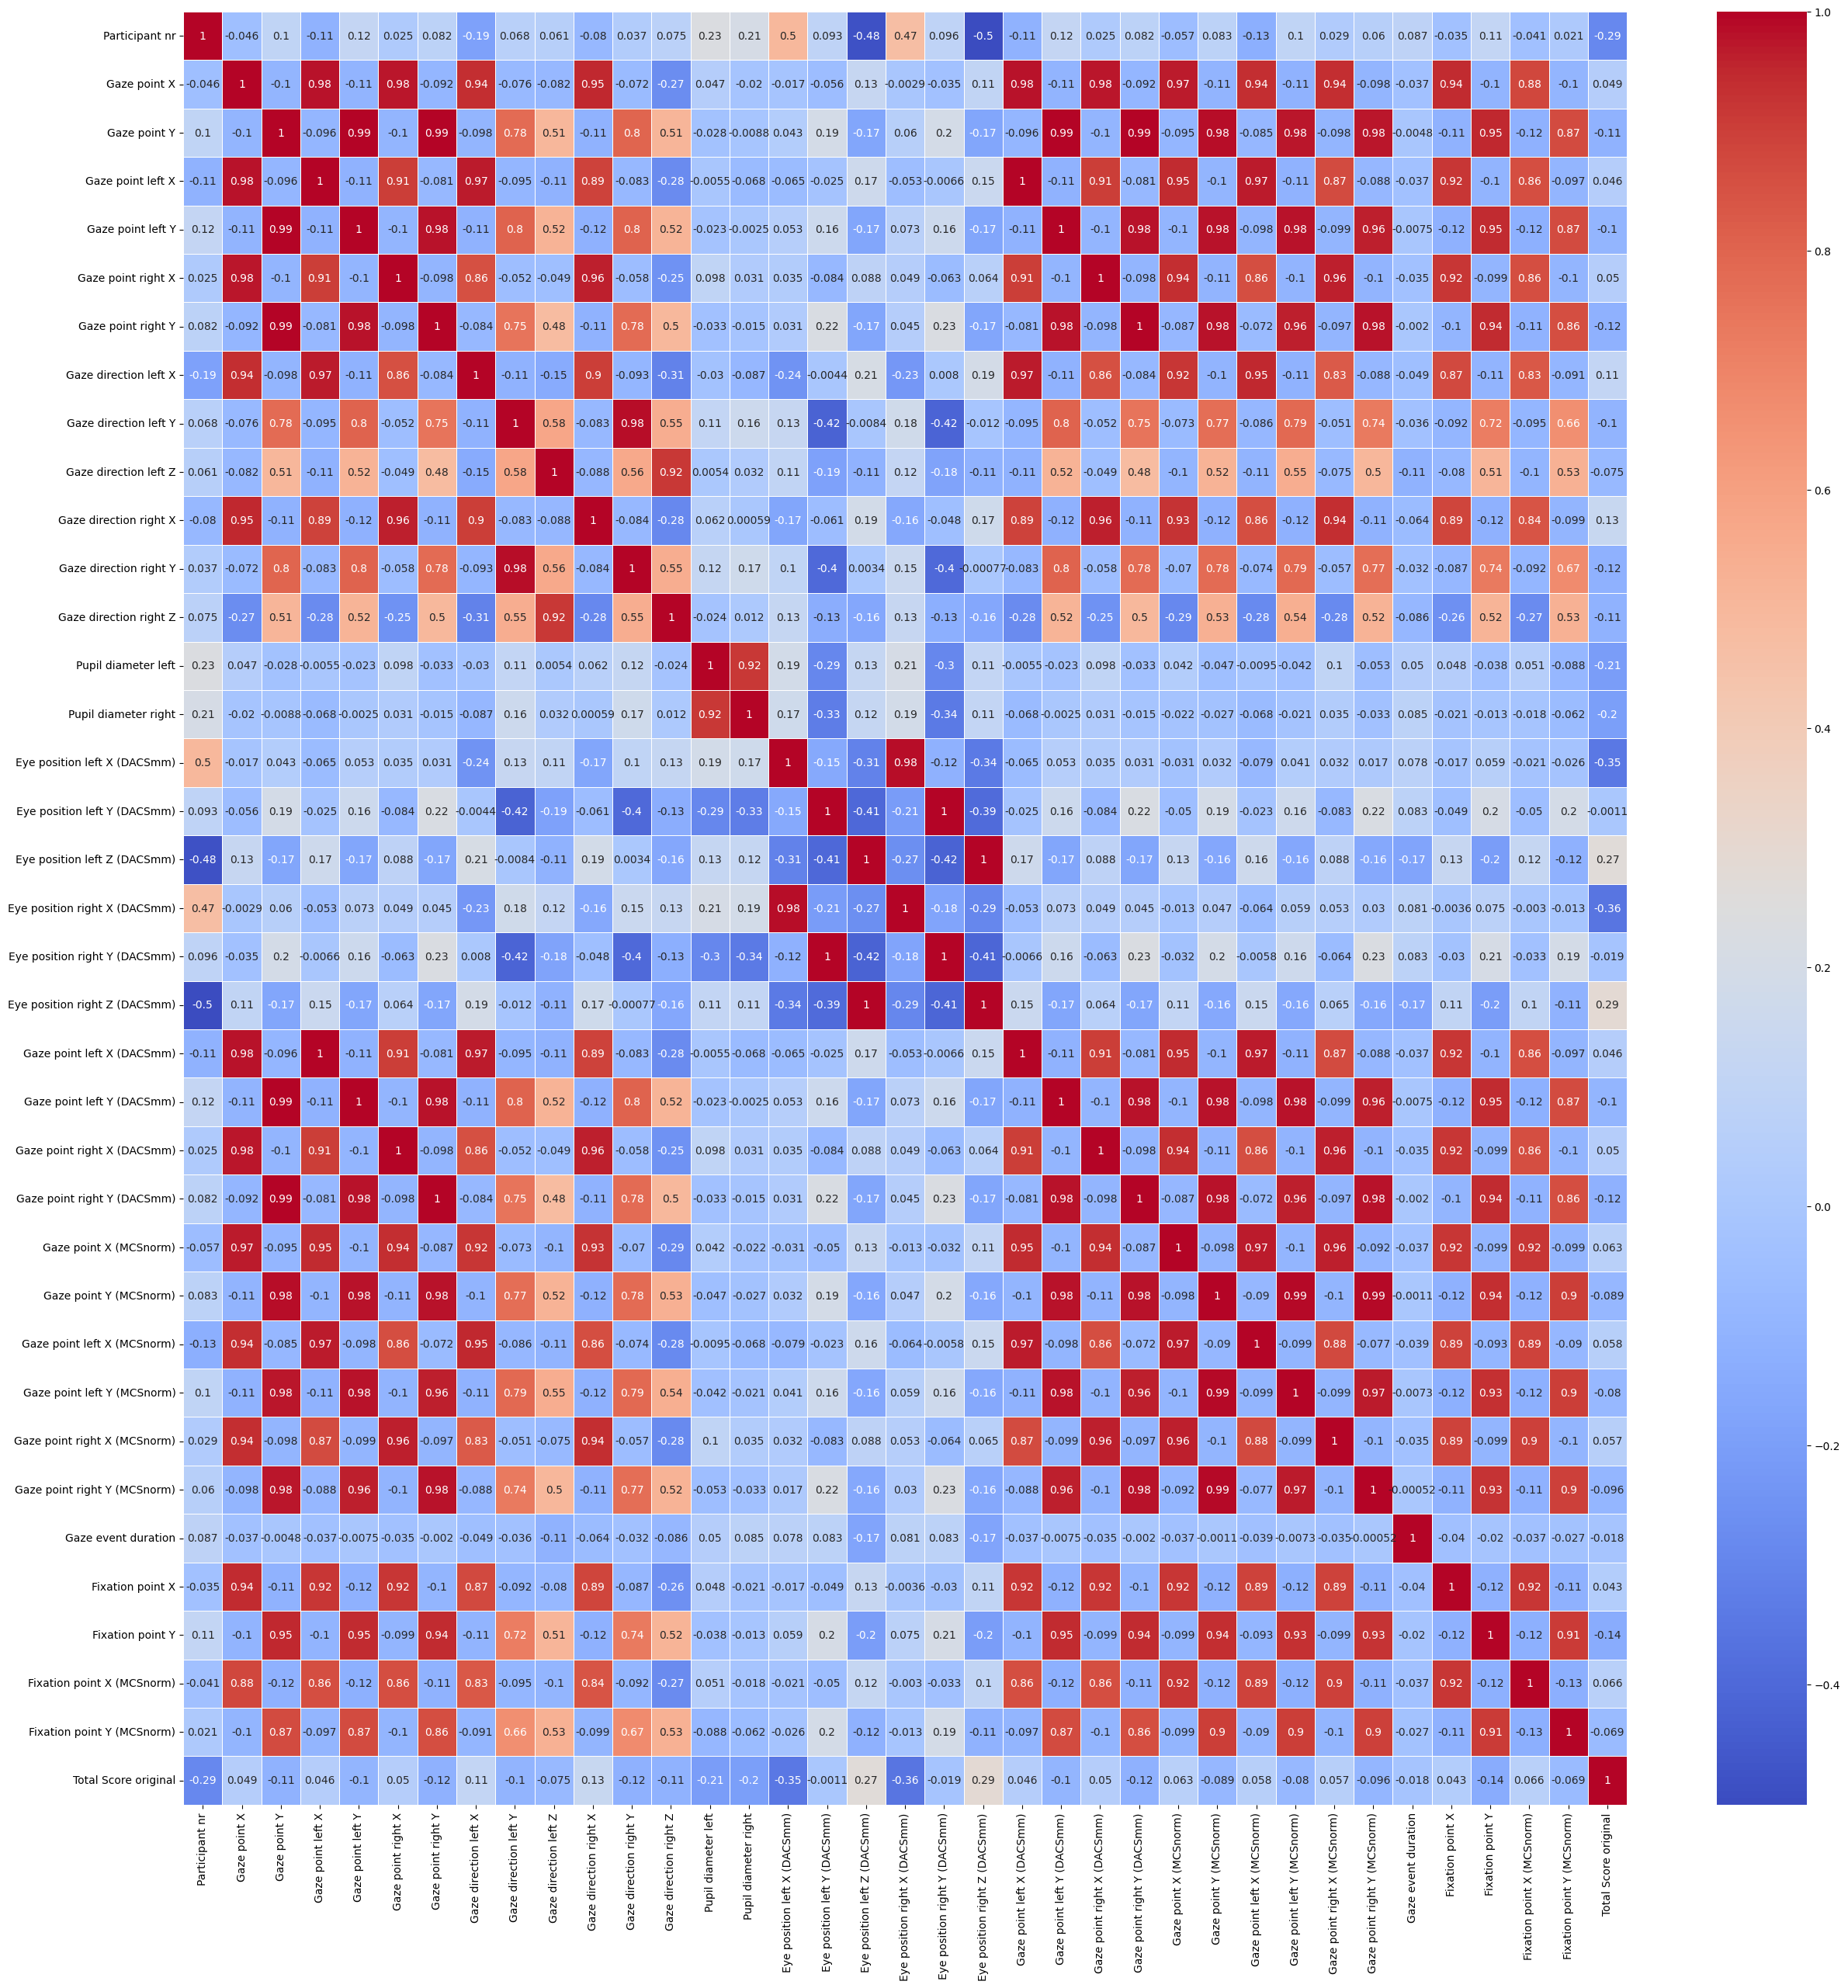

In [10]:
#correlation matrix for columns after preprocessing 
correlation_matrix = df_merged.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.show()

In [11]:
df_merged.columns

Index(['Participant nr', 'Gaze point X', 'Gaze point Y', 'Gaze point left X',
       'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
       'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil diameter left', 'Pupil diameter right',
       'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)',
       'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)',
       'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
       'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)',
       'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)',
       'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)',
       'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)',
       'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)',
       'Gaze event duration', 'Fixation point X', 'Fixation point Y',
 

# Feature selection

To predict empathy scores using the eye test data, we need to identify relevant features that could potentially impact empathy levels. Here are some possible important features to consider:

    'Gaze direction left X' and 'Gaze direction left Y': These columns represent the X and Y components of the gaze direction vector for the left eye, which could be indicative of the direction of the participant's gaze. The direction of gaze could potentially be related to empathy, as previous research has shown that gaze patterns can be associated with social cognition and emotional processing.

    'Gaze direction right X' and 'Gaze direction right Y': Similar to the gaze direction for the left eye, these columns represent the X and Y components of the gaze direction vector for the right eye, which could also be informative for predicting empathy scores.

    'Pupil diameter left' and 'Pupil diameter right': These columns represent the diameter of the pupil for the left and right eyes, respectively. Pupil dilation has been linked to emotional arousal, and changes in pupil diameter could potentially reflect differences in emotional responsiveness, which could be relevant for empathy.

    'Gaze event duration': This column represents the duration of gaze events, which could provide information on the duration of fixations or sustained attention to specific areas of interest. Gaze event duration could potentially be related to empathy, as it could reflect differences in attentional processing during social interactions.

    'Gaze point X' and 'Gaze point Y': These columns represent the X and Y coordinates of the gaze point on the screen, which could provide information on the spatial distribution of gaze during the eye test. The pattern of gaze points could potentially be associated with empathy, as it could reflect differences in visual attention to social cues.

    'Fixation point X' and 'Fixation point Y': Similar to the gaze point coordinates, these columns represent the X and Y coordinates of the fixation point on the screen, which could also provide information on the spatial distribution of fixations during the eye test. The pattern of fixation points could potentially be relevant for empathy, as it could reflect differences in visual attention to specific areas of interest.
    


* picking these features to train a model, evaluating its performance, and contrasting it with another model that includes all features.

In [12]:
X_selected = df_merged[['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction right X', 'Gaze direction right Y',
                        'Pupil diameter left', 'Pupil diameter right', 'Gaze event duration', 'Gaze point X', 'Gaze point Y',
                        'Fixation point X', 'Fixation point Y']]


In [13]:
X_selected.shape

(282270, 11)

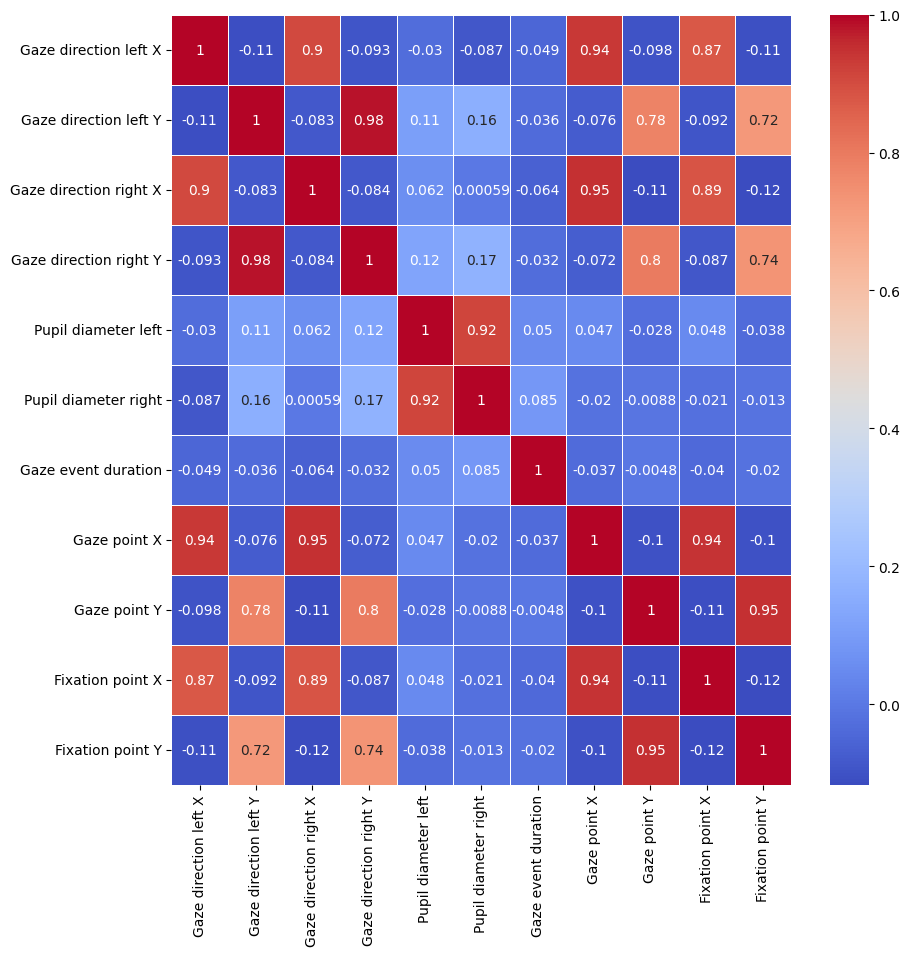

In [14]:
#correlation matrix for columns after preprocessing 
correlation_matrix = X_selected.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.show()

Multiple features have varying scales, thus the data is scaled using the MIn-max scaler by linearly translating the values to a certain range, often [0,1]. It is suitable for data that has different scales across different features.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max scaling on the remaining columns
X_scaled = scaler.fit_transform(X_selected)

# Convert the result back to a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X_selected.columns)

X_scaled_df.head()


Gaze direction left X  Gaze direction left Y  Gaze direction right X  \
0               0.508892               0.475637                0.443295   
1               0.514488               0.481899                0.440894   
2               0.514000               0.482409                0.445989   
3               0.515164               0.479871                0.446352   
4               0.509775               0.481025                0.450938   

   Gaze direction right Y  Pupil diameter left  Pupil diameter right  \
0                0.472710             0.300175              0.306985   
1                0.474654             0.297848              0.303922   
2                0.474477             0.295521              0.300858   
3                0.476743             0.293194              0.297794   
4                0.473999             0.292030              0.298407   

   Gaze event duration  Gaze point X  Gaze point Y  Fixation point X  \
0             0.013267      0.394205      0.299838          0.399812   
1             0.013267      0.395961      0.305781          0.399812   
2             0.013267      0.399034      0.306321          0.399812   
3             0.013267      0.399912      0.306321          0.399812   
4             0.013267      0.399034      0.305240          0.399812   

   Fixation point Y  
0          0.362159  
1          0.362159  
2          0.362159  
3          0.362159  
4          0.362159

In [16]:
X_scaled_df.shape

(282270, 11)

In [17]:
X = X_scaled_df
y = df_merged['Total Score original']

# Perform train-test split on normalized feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(225816, 56454, 225816, 56454)

In [18]:
X.shape

(282270, 11)

In [19]:
y.shape

(282270,)

Multilayer Perceptron (MLP)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Create an MLP model
model = Sequential()

# Add input layer with the number of features as input_dim
model.add(Dense(units=64, activation='relu', input_dim=11))  # 11 features in X_selected

# Add one or more hidden layers with desired number of units and activation functions
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer with a single output neuron for regression task or multiple neurons for multi-class classification
model.add(Dense(units=1))  #regression task

# Compile the model by specifying loss function, optimizer, and evaluation metric(s)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model on your training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32)  

# Evaluate the model on your test data
loss, mse = model.evaluate(X_test, y_test)  

# Make predictions with the trained model
predictions = model.predict(X_test)  


Epoch 1/10
7057/7057 [==============================] - 15s 2ms/step - loss: 192.3114 - mse: 192.3114
Epoch 2/10
7057/7057 [==============================] - 14s 2ms/step - loss: 67.4868 - mse: 67.4868
Epoch 3/10
7057/7057 [==============================] - 14s 2ms/step - loss: 63.8210 - mse: 63.8210
Epoch 4/10
7057/7057 [==============================] - 15s 2ms/step - loss: 61.4926 - mse: 61.4926
Epoch 5/10
7057/7057 [==============================] - 14s 2ms/step - loss: 59.6720 - mse: 59.6720
Epoch 6/10
7057/7057 [==============================] - 12s 2ms/step - loss: 57.5485 - mse: 57.5485
Epoch 7/10
7057/7057 [==============================] - 13s 2ms/step - loss: 55.0894 - mse: 55.0894
Epoch 8/10
7057/7057 [==============================] - 16s 2ms/step - loss: 53.1841 - mse: 53.1841
Epoch 9/10
7057/7057 [==============================] - 12s 2ms/step - loss: 51.8848 - mse: 51.8848
Epoch 10/10
1765/1765 [==============================] - 3s 1ms/step


Here's a function that encapsulates the code for creating scatter plots, histograms, density plots, and box plots of predicted vs. actual values for empathy scores using Matplotlib and Seaborn.

In [21]:
#Scatter Plot Function

def create_scatter_plot(y_test, predictions):
    """
    Creates a scatter plot of predicted vs. actual values for empathy scores.

    Parameters:
        -- y_test (array-like): Actual empathy scores.
        -- predictions (array-like): Predicted empathy scores.
    """
    plt.scatter(y_test, predictions, c='blue', label='Predicted')
    plt.scatter(y_test, y_test, c='red', label='Actual')
    plt.xlabel('Actual Empathy Score')
    plt.ylabel('Predicted Empathy Score')
    plt.title('Actual vs. Predicted Empathy Score')
    plt.legend()
    plt.show()


In [22]:
#Histogram Function

def create_histograms(y_test, predictions):
    """
    Creates histograms of predicted and actual values for empathy scores.

    Parameters:
        -- y_test (array-like): Actual empathy scores.
        -- predictions (array-like): Predicted empathy scores.
    """
    plt.hist(y_test, bins=20, alpha=0.5, label='Actual Empathy Score')
    plt.hist(predictions, bins=20, alpha=0.5, label='Predicted Empathy Score')
    plt.xlabel('Empathy Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Actual vs. Predicted Empathy Score')
    plt.legend()
    plt.show()


In [23]:
#Density Plot Function

def create_density_plots(y_test, predictions):
    """
    Creates density plots of predicted and actual values for empathy scores.

    Parameters:
        -- y_test (array-like): Actual empathy scores.
        -- predictions (array-like): Predicted empathy scores.
    """
    sns.kdeplot(y_test, label='Actual Empathy Score', color='red')
    sns.kdeplot(predictions, label='Predicted Empathy Score')
    plt.xlabel('Empathy Score')
    plt.ylabel('Density')
    plt.title('Density Plot of Actual vs. Predicted Empathy Score')
    plt.legend()
    plt.show()


In [24]:
#Box Plot Function

def create_box_plot(y_test, predictions):
    """
    Creates a box plot of predicted vs. actual values for empathy scores.

    Parameters:
        -- y_test (array-like): Actual empathy scores.
        -- predictions (array-like): Predicted empathy scores.
    """
    sns.boxplot(data=[y_test, predictions], width=0.5)
    plt.xticks(ticks=[0, 1], labels=['Actual', 'Predicted'])
    plt.ylabel('Empathy Score')
    plt.title('Box Plot of Actual vs. Predicted Empathy Score')
    plt.show()


In [25]:
#loss curve function

def plot_loss_curve(history):
    """
    Plots the training loss over epochs from the history object.

    Parameters:
        -- history (object): History object returned by the model.fit() function.
    """
    # Extract loss values and number of epochs
    loss = history.history['loss']
    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.show()


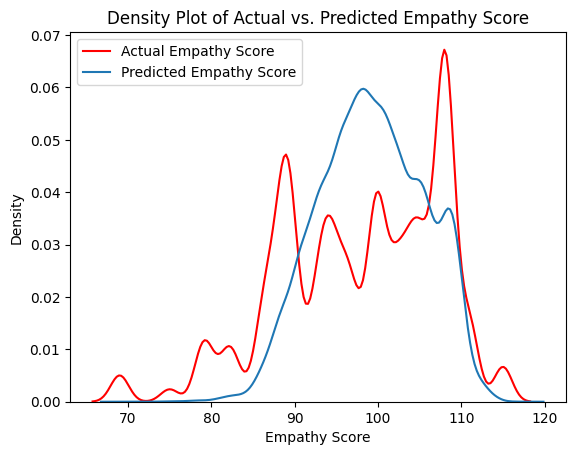

In [26]:
create_density_plots(y_test, predictions)

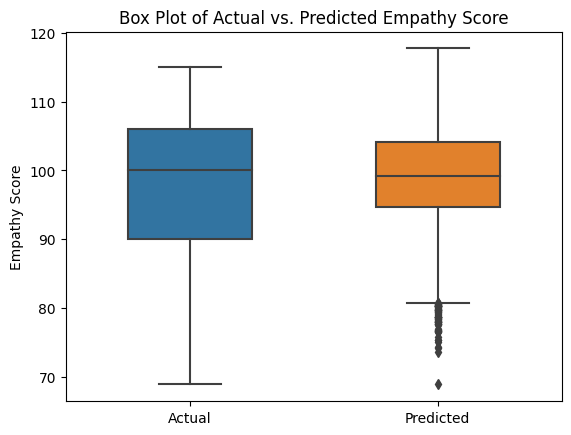

In [27]:
create_box_plot(y_test, predictions)

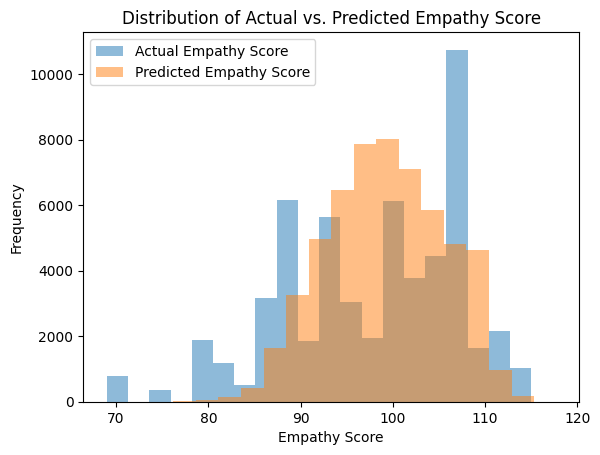

In [28]:
create_histograms(y_test, predictions)

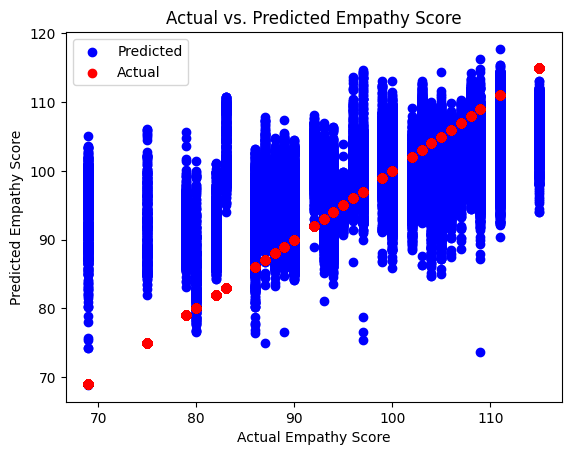

In [29]:
create_scatter_plot(y_test, predictions)

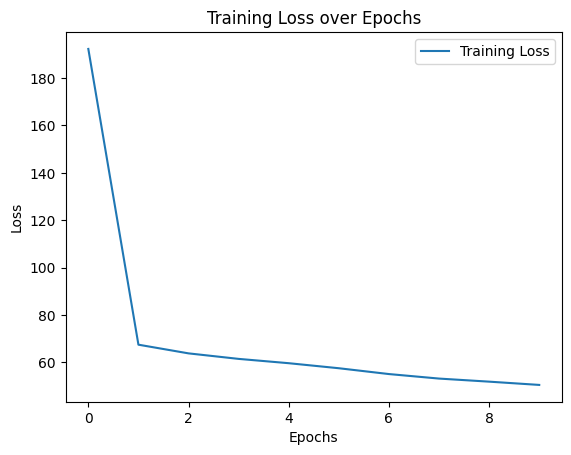

In [30]:
plot_loss_curve(history)


In [50]:
X_scaled_df.shape

(282270, 11)

In [51]:
predictions


array([[101.55671 ],
       [ 87.5598  ],
       [ 96.441414],
       ...,
       [ 96.15447 ],
       [ 90.71704 ],
       [ 96.63398 ]], dtype=float32)

In [52]:
import numpy as np
import pandas as pd

# concatenate y_test and predictions
df01 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), predictions.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

df01['predictions'] = df01['predictions'].round()

# print the dataframe
df01.head(10)


y_test  predictions
0   105.0        102.0
1    75.0         88.0
2    88.0         96.0
3    93.0         89.0
4    89.0         94.0
5   109.0        101.0
6    90.0         97.0
7   106.0        107.0
8   102.0        102.0
9   107.0         98.0

In [32]:
def calculate_mismatch_percentage(y_test, predictions, df):
    """
    Calculates and prints the number and percentage of values that do not match in y_test and predictions.

    Parameters:
        -- y_test (array-like): Actual empathy scores.
        -- predictions (array-like): Predicted empathy scores.
        -- df (DataFrame): DataFrame containing y_test and predictions as columns.
    """
    # Calculate number of values that do not match in y_test and predictions
    mismatch_predictions = (df['predictions'] != df['y_test']).sum()

    # Calculate percentage of values that do not match in y_test and predictions
    percent_mismatch_predictions = (mismatch_predictions / len(df)) * 100

    # Calculate number of values that do match in y_test and predictions
    match_predictions = len(df) - mismatch_predictions

    # Calculate percentage of values that do match in y_test and predictions
    percent_match_predictions = (match_predictions / len(df)) * 100

    # Print results
    print(f'Number of values that do not match in predictions: {mismatch_predictions} out of {len(df)}')
    print(f'Percentage of values that do not match in predictions: {percent_mismatch_predictions.round(2)}%')
    print(f'Number of values that do match in predictions: {match_predictions} out of {len(df)}')
    print(f'Percentage of values that do match in predictions: {percent_match_predictions.round(2)}%')

In [128]:
calculate_mismatch_percentage(y_test, predictions, df01)

Number of values that do not match in predictions: 52234 out of 56454
Percentage of values that do not match in predictions: 92.52%
Number of values that do match in predictions: 4220 out of 56454
Percentage of values that do match in predictions: 7.48%


Changing epochs=100 for same model

In [56]:
from keras.models import Sequential
from keras.layers import Dense

# Create an MLP model
model1 = Sequential()

# Add input layer with the number of features as input_dim
model1.add(Dense(units=64, activation='relu', input_dim=11))  # Assuming 11 features in X_selected

# Add one or more hidden layers with desired number of units and activation functions
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=16, activation='relu'))

# Add output layer with a single output neuron for regression task or multiple neurons for multi-class classification
model1.add(Dense(units=1))  #regression task

# Compile the model by specifying loss function, optimizer, and evaluation metric(s)
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model on your training data
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32)  

# Evaluate the model on your test data
loss, mse = model1.evaluate(X_test, y_test)  

# Make predictions with the trained model
predictions1 = model1.predict(X_test)  


Epoch 1/100
7057/7057 [==============================] - 13s 2ms/step - loss: 232.4841 - mse: 232.4841
Epoch 2/100
7057/7057 [==============================] - 12s 2ms/step - loss: 72.0017 - mse: 72.0017
Epoch 3/100
7057/7057 [==============================] - 12s 2ms/step - loss: 66.2164 - mse: 66.2164
Epoch 4/100
7057/7057 [==============================] - 13s 2ms/step - loss: 63.2755 - mse: 63.2755
Epoch 5/100
7057/7057 [==============================] - 12s 2ms/step - loss: 61.3507 - mse: 61.3507
Epoch 6/100
7057/7057 [==============================] - 12s 2ms/step - loss: 60.0829 - mse: 60.0829
Epoch 7/100
7057/7057 [==============================] - 12s 2ms/step - loss: 58.4807 - mse: 58.4807
Epoch 8/100
7057/7057 [==============================] - 12s 2ms/step - loss: 56.8918 - mse: 56.8918
Epoch 9/100
7057/7057 [==============================] - 13s 2ms/step - loss: 55.1043 - mse: 55.1043
Epoch 10/100
7057/7057 [==============================] - 12s 2ms/step - loss: 53.0761 - 

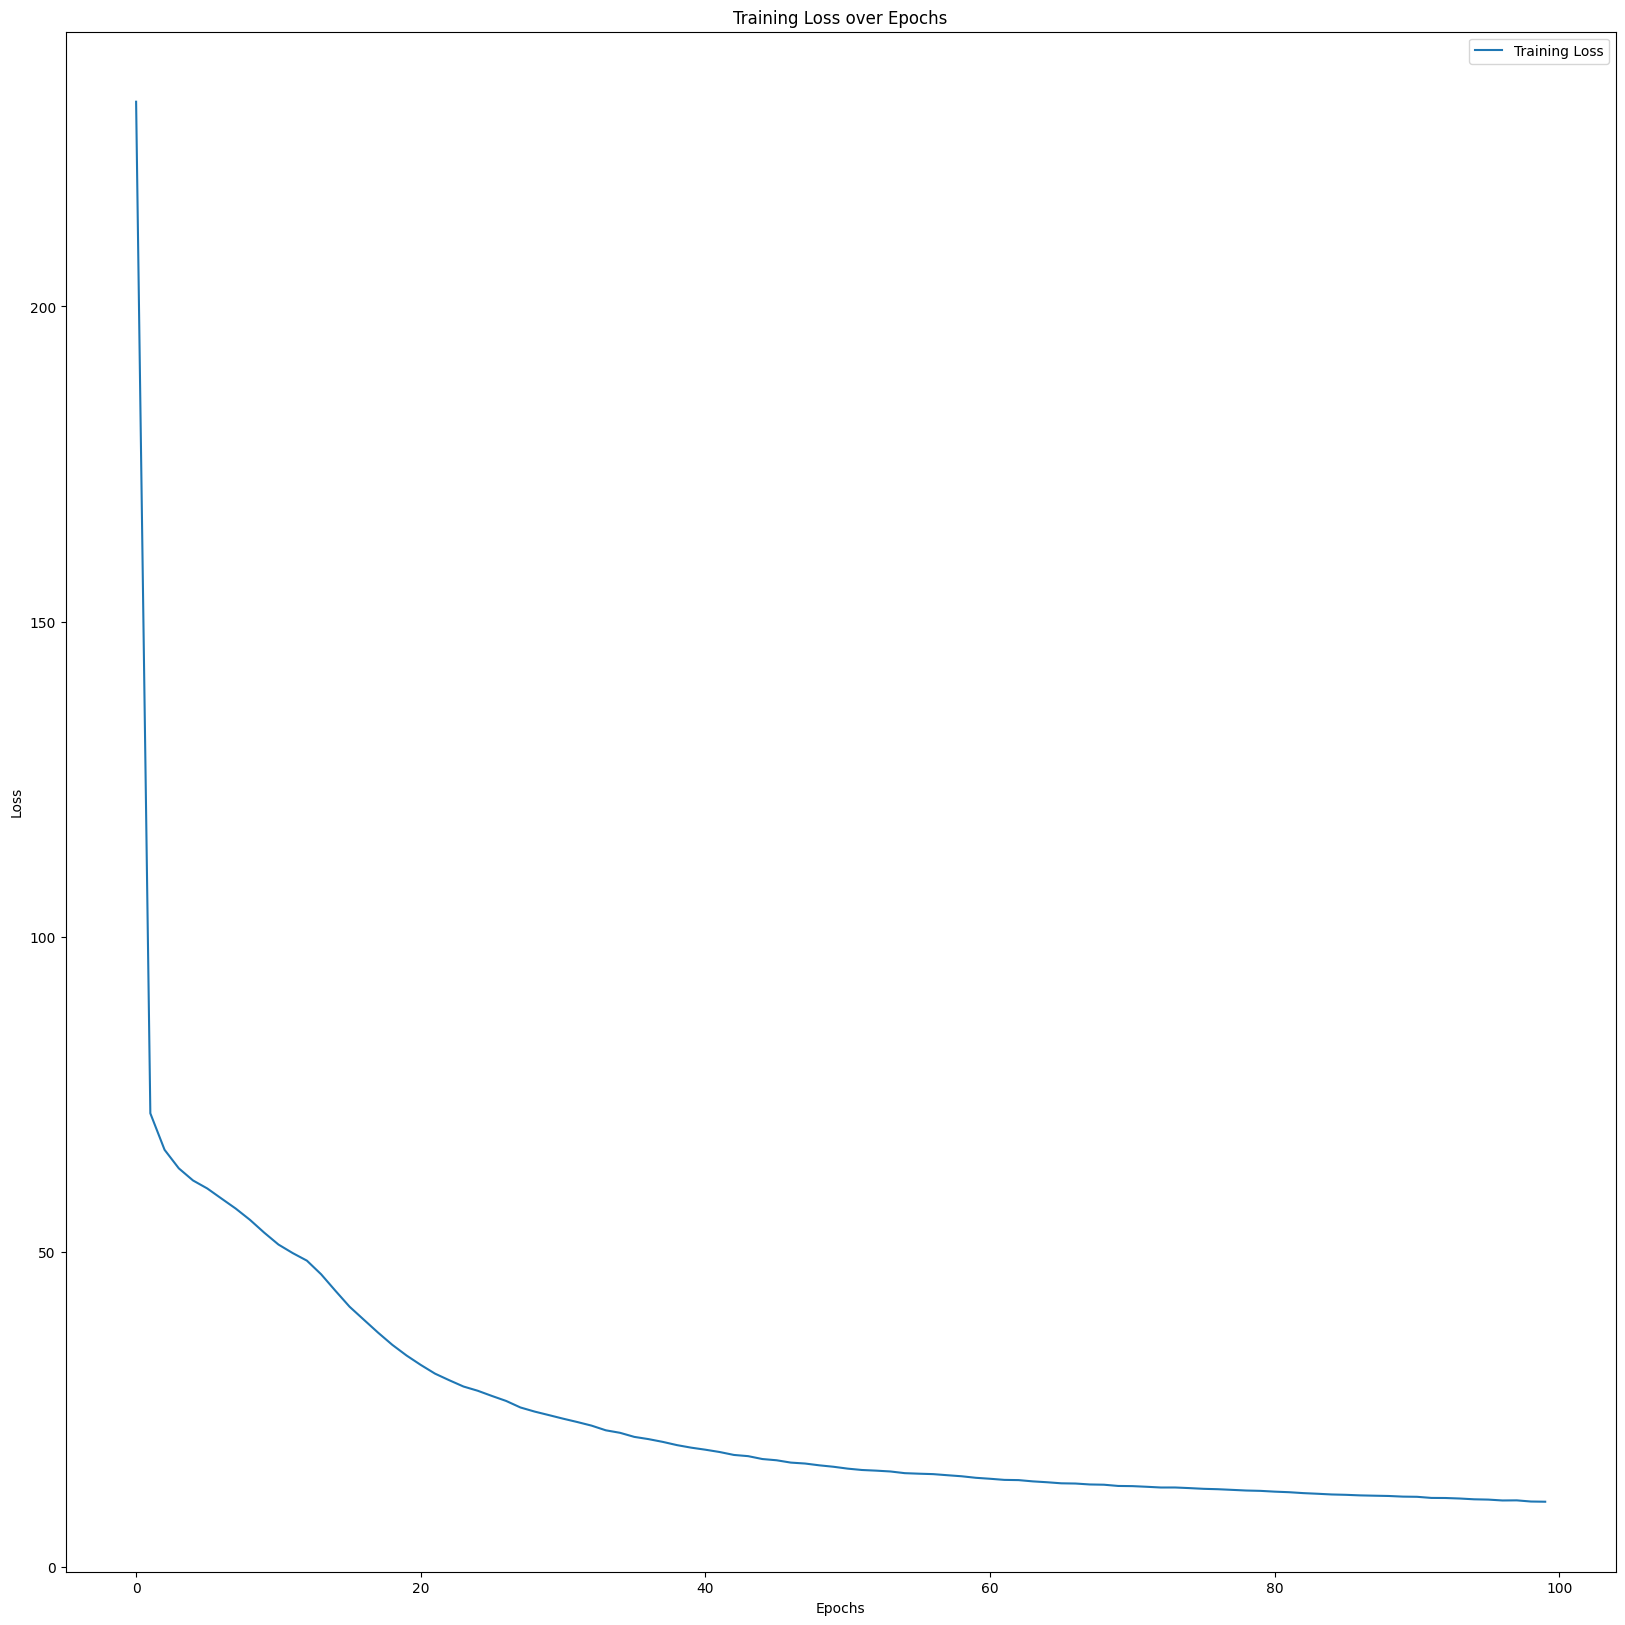

In [57]:
plot_loss_curve(history1)

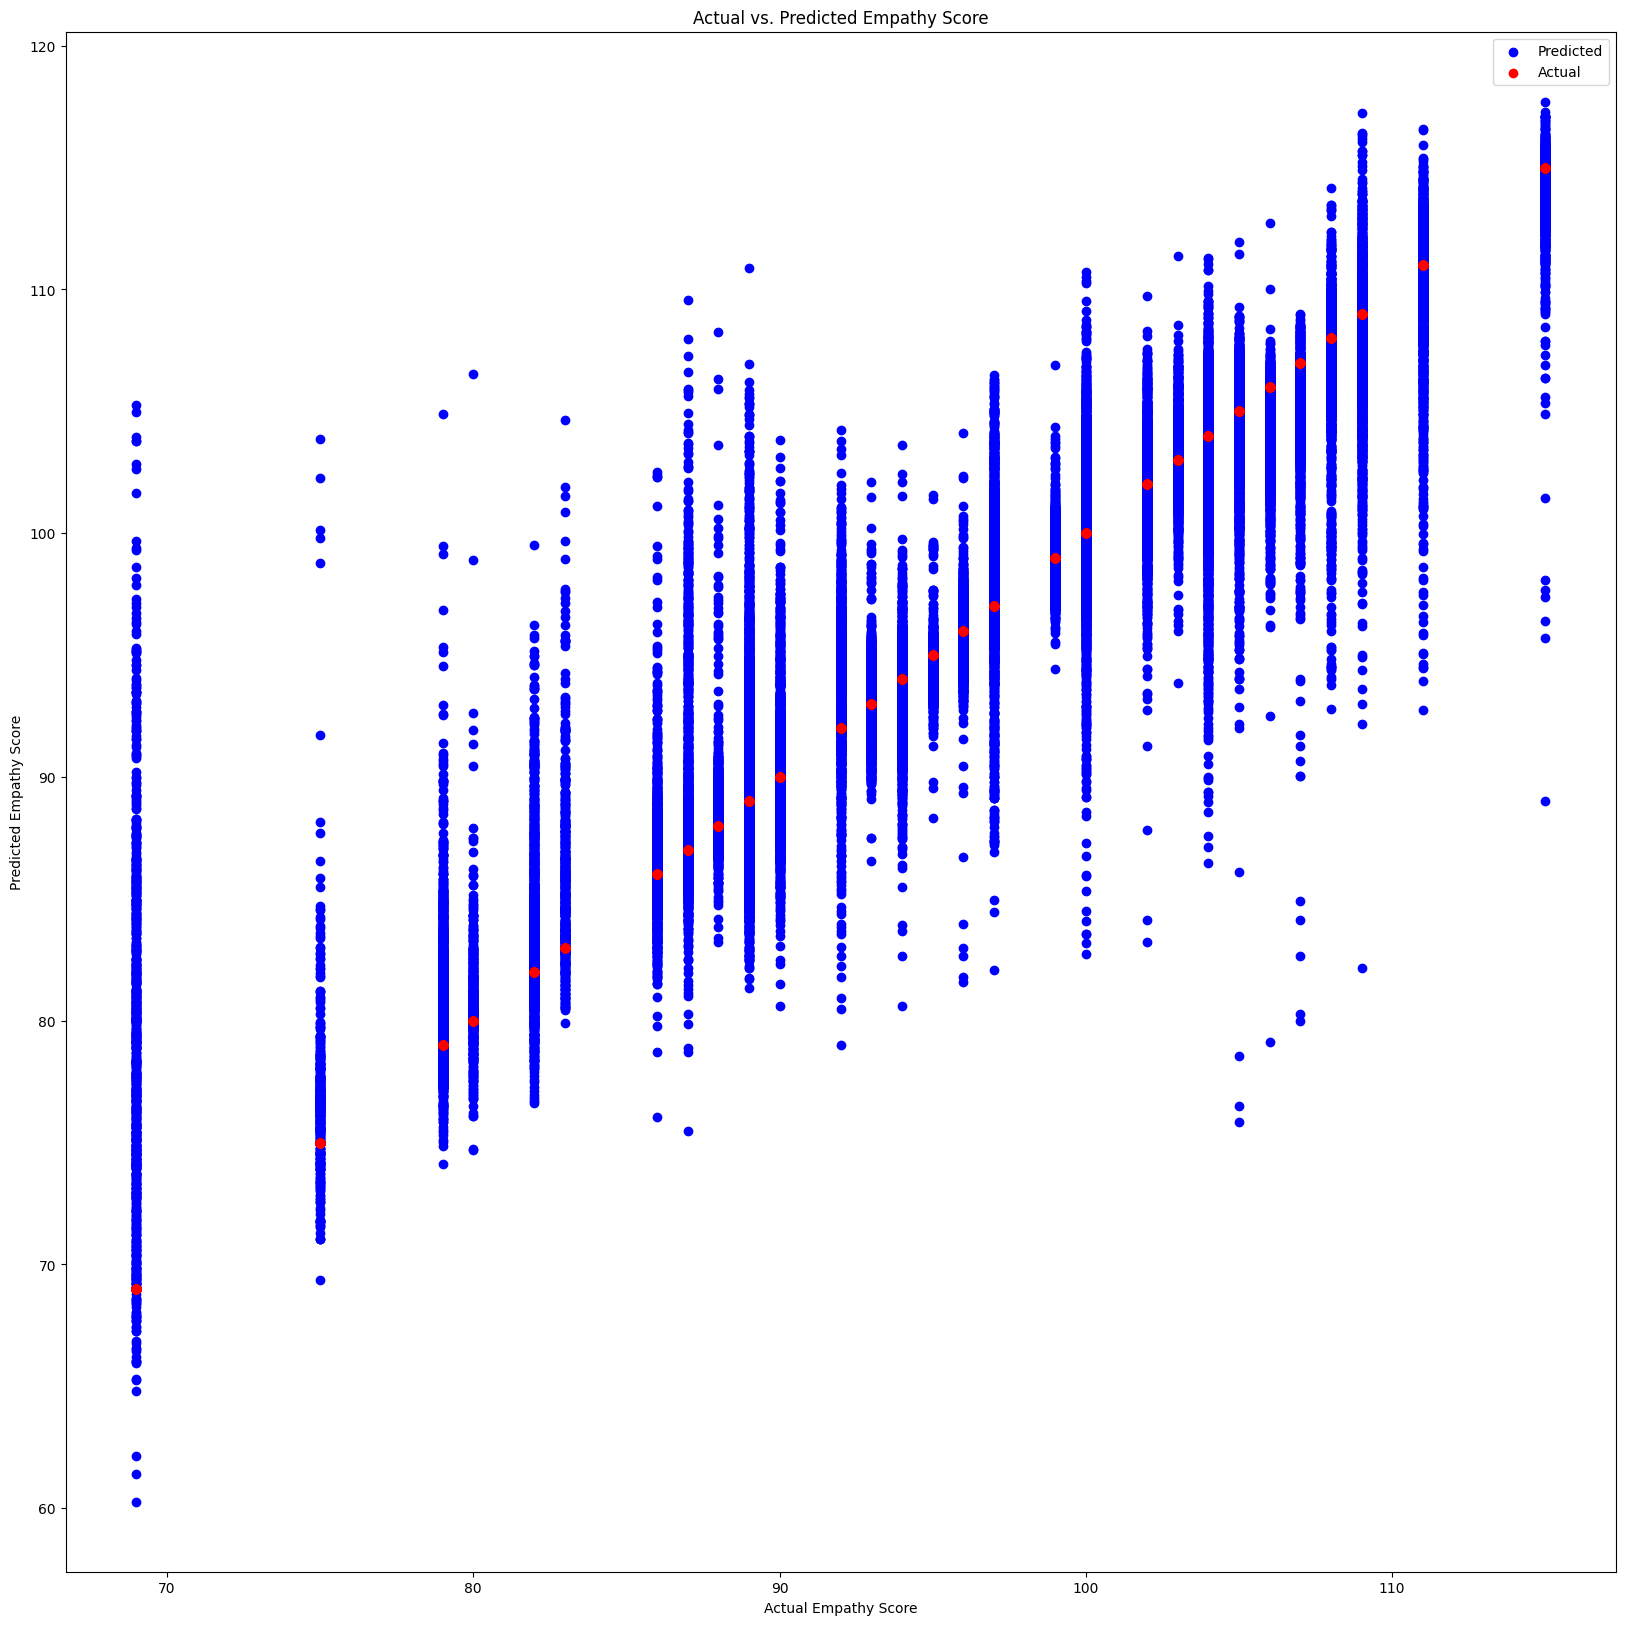

In [58]:
create_scatter_plot(y_test, predictions1)

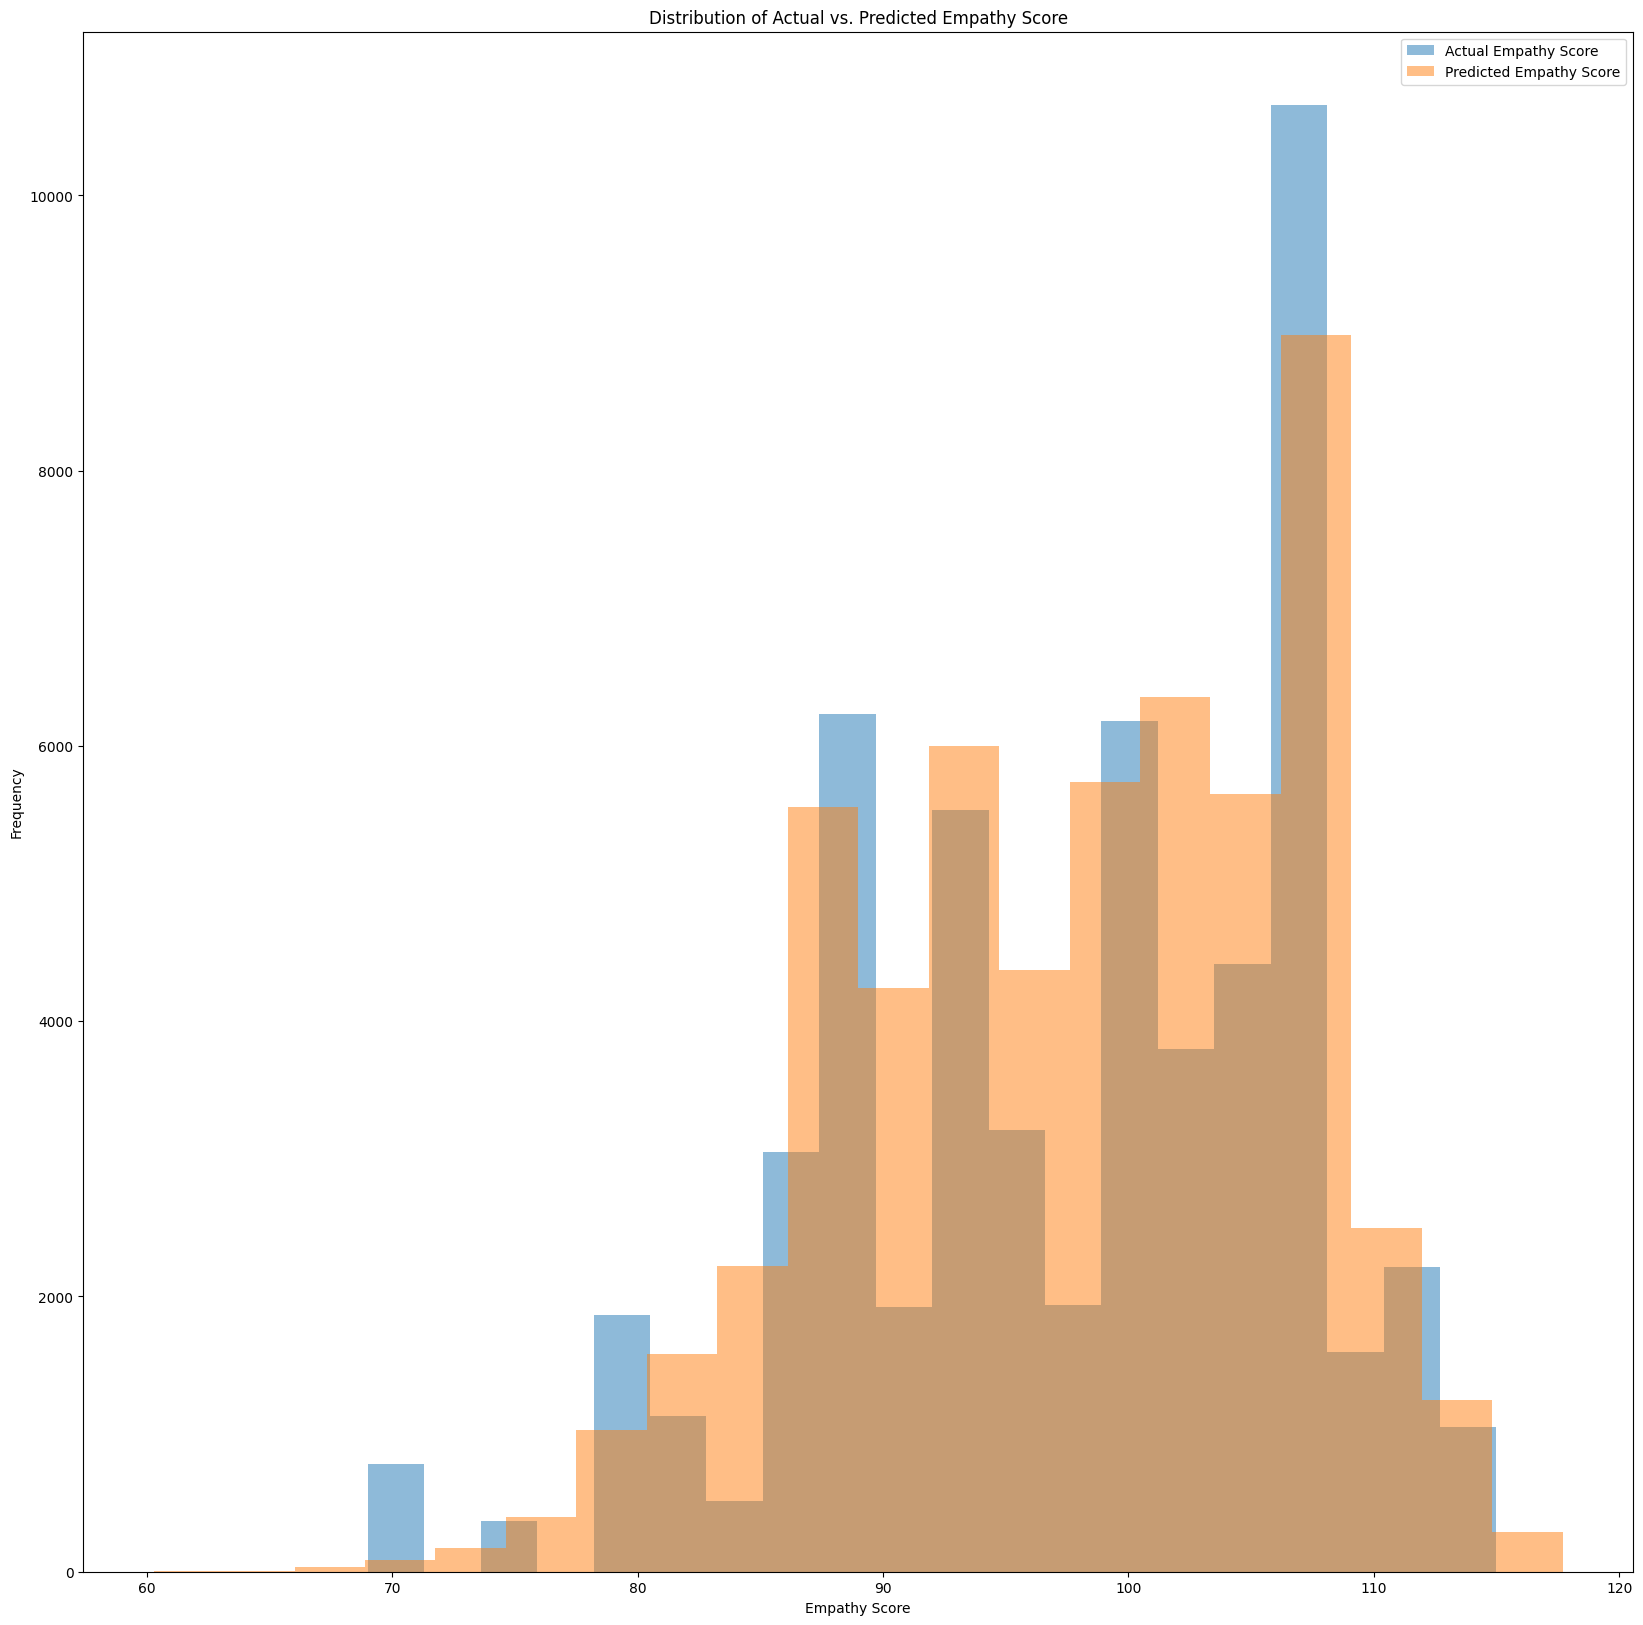

In [59]:
create_histograms(y_test, predictions1)

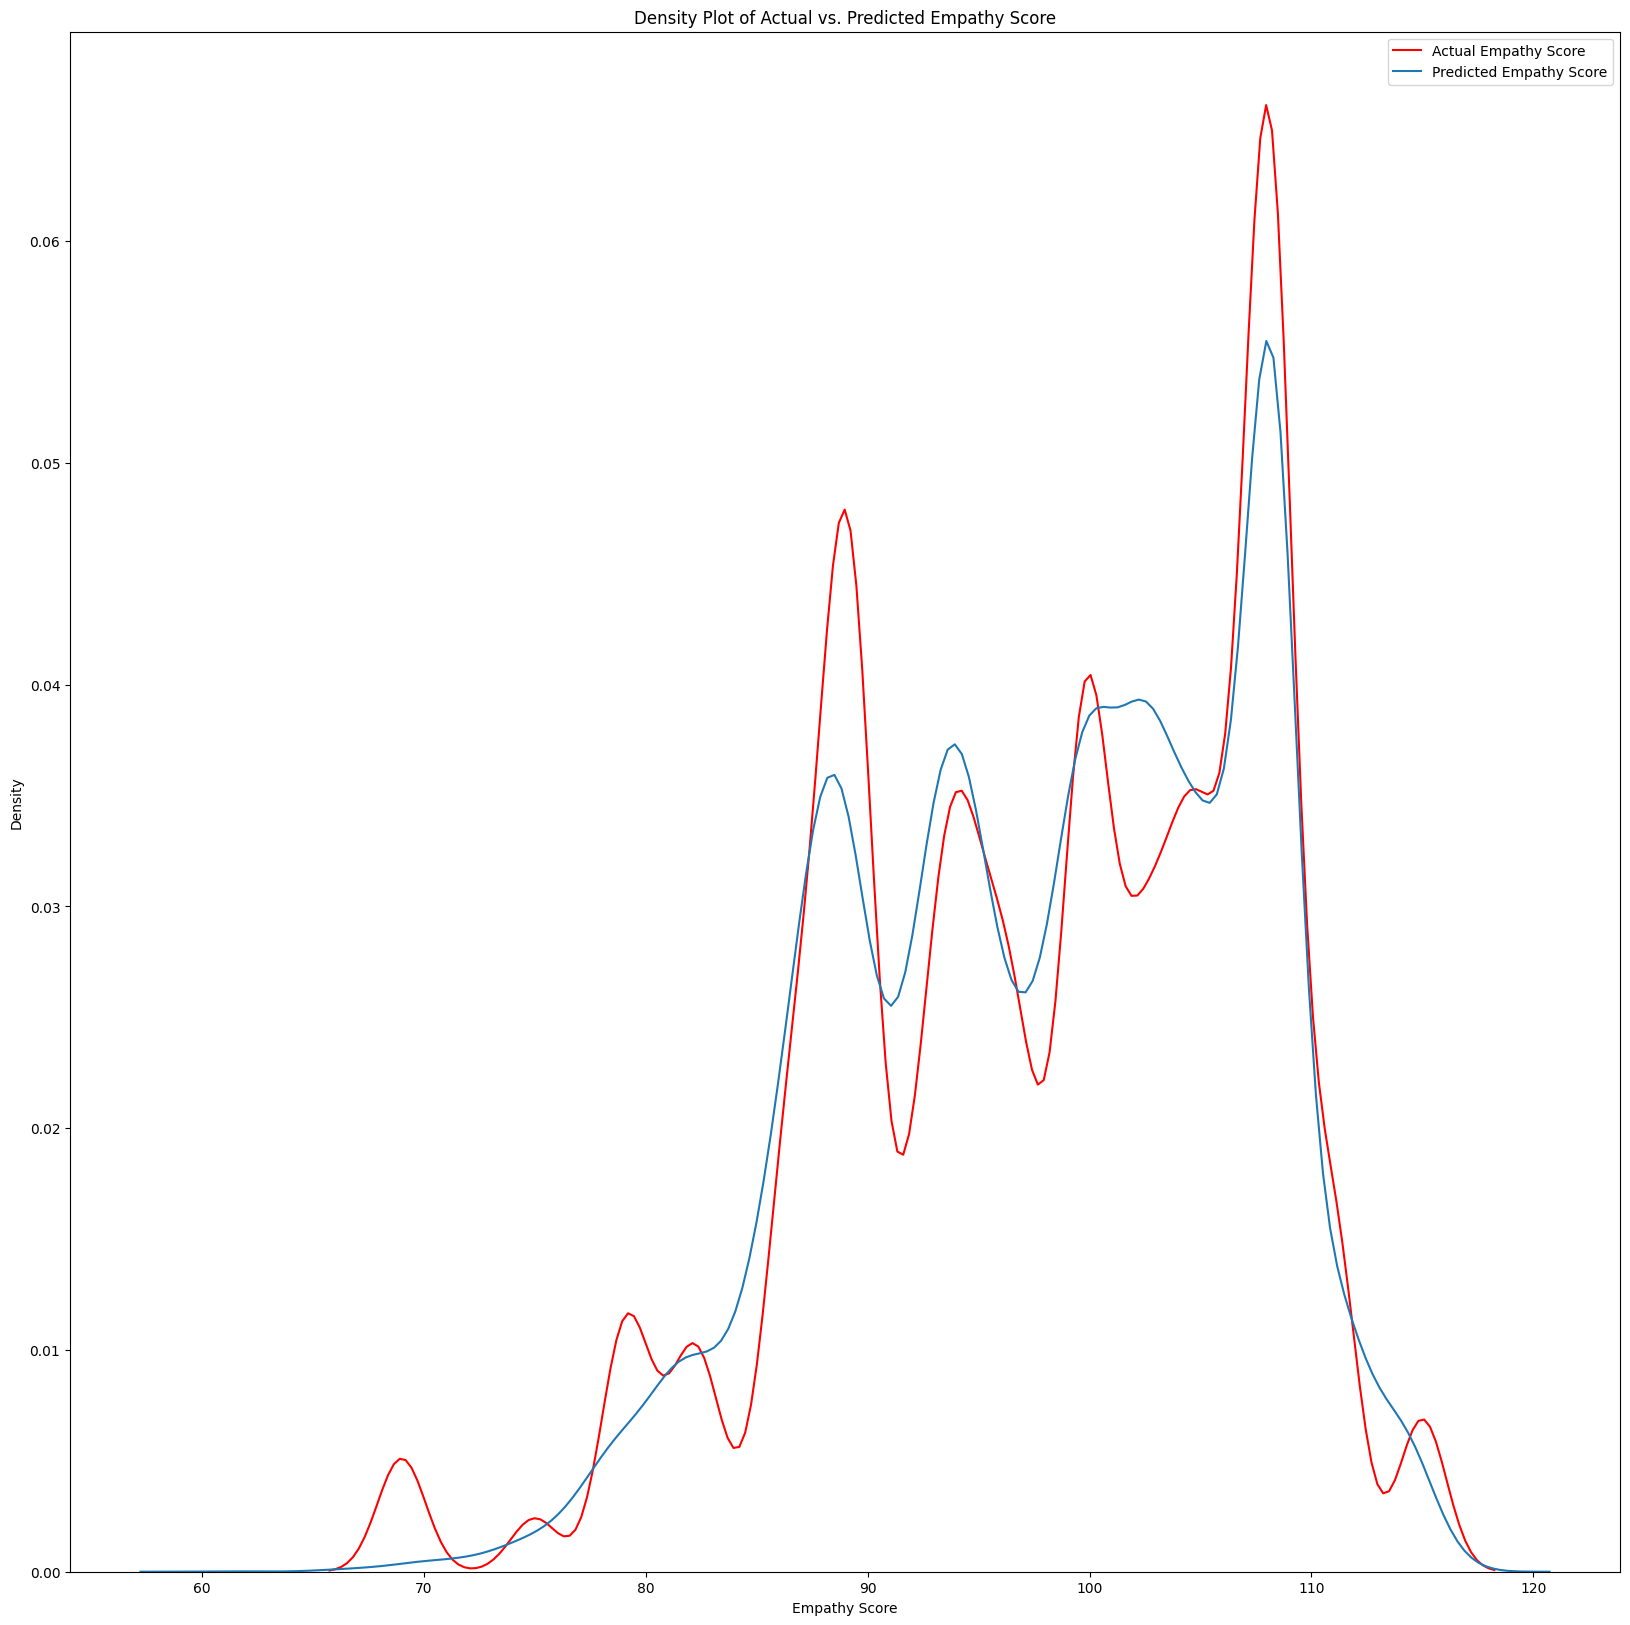

In [60]:
create_density_plots(y_test, predictions1)

In [61]:
# concatenate y_test and predictions
df02 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), predictions1.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

# Round the predicted scores to 2 decimal places
df02['predictions'] = df02['predictions'].round()

# print the dataframe
df02.head(10)

y_test  predictions
0   105.0        105.0
1    75.0         72.0
2    88.0         87.0
3    93.0         92.0
4    89.0         94.0
5   109.0        105.0
6    90.0         93.0
7   106.0        105.0
8   102.0        100.0
9   107.0        108.0

In [129]:
calculate_mismatch_percentage(y_test, predictions, df02)

Number of values that do not match in predictions: 41062 out of 56454
Percentage of values that do not match in predictions: 72.74%
Number of values that do match in predictions: 15392 out of 56454
Percentage of values that do match in predictions: 27.26%


* One trail file for 60 participants with 11 characteristics was examined. 

* For training and testing, we will now utilise the same amount of files with 37 features.



In [38]:
X_all_features = df_merged.drop(['Participant nr', 'Total Score original'], axis=1)
X_all_scaled = scaler.fit_transform(X_all_features)

# Convert the result back to a dataframe
X_all_features_df = pd.DataFrame(X_all_scaled, columns=X_all_features.columns)

X_all_features_df.head()

Gaze point X  Gaze point Y  Gaze point left X  Gaze point left Y  \
0      0.394205      0.299838           0.405111           0.304992   
1      0.395961      0.305781           0.411814           0.314317   
2      0.399034      0.306321           0.411395           0.315414   
3      0.399912      0.306321           0.412652           0.311574   
4      0.399034      0.305240           0.405949           0.313220   

   Gaze point right X  Gaze point right Y  Gaze direction left X  \
0            0.405906            0.291322               0.508892   
1            0.403261            0.294421               0.514488   
2            0.409431            0.293905               0.514000   
3            0.409872            0.297004               0.515164   
4            0.415161            0.293388               0.509775   

   Gaze direction left Y  Gaze direction left Z  Gaze direction right X  ...  \
0               0.475637               0.014233                0.443295  ...   
1               0.481899               0.017073                0.440894  ...   
2               0.482409               0.017038                0.445989  ...   
3               0.479871               0.016789                0.446352  ...   
4               0.481025               0.015618                0.450938  ...   

   Gaze point Y (MCSnorm)  Gaze point left X (MCSnorm)  \
0                0.318896                       0.4457   
1                0.329099                       0.4567   
2                0.329599                       0.4556   
3                0.329299                       0.4578   
4                0.327498                       0.4474   

   Gaze point left Y (MCSnorm)  Gaze point right X (MCSnorm)  \
0                     0.315032                      0.497550   
1                     0.330633                      0.493049   
2                     0.332033                      0.502350   
3                     0.326033                      0.503150   
4                     0.329033                      0.511651   

   Gaze point right Y (MCSnorm)  Gaze event duration  Fixation point X  \
0                      0.322565             0.013267          0.399812   
1                      0.327465             0.013267          0.399812   
2                      0.326965             0.013267          0.399812   
3                      0.332466             0.013267          0.399812   
4                      0.325865             0.013267          0.399812   

   Fixation point Y  Fixation point X (MCSnorm)  Fixation point Y (MCSnorm)  
0          0.362159                    0.477079                    0.322891  
1          0.362159                    0.477079                    0.322891  
2          0.362159                    0.477079                    0.322891  
3          0.362159                    0.477079                    0.322891  
4          0.362159                    0.477079                    0.322891  

[5 rows x 35 columns]

In [39]:
X_all_features_df.shape


(282270, 35)

In [40]:
from sklearn.model_selection import train_test_split
X = X_all_features_df
y = df_merged['Total Score original']

# Perform train-test split on normalized feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(225816, 56454, 225816, 56454)

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# Create an MLP model
model2 = Sequential()

# Add input layer with the number of features as input_dim
model2.add(Dense(units=64, activation='relu', input_dim=35))  #35 features in X_selected

# Add one or more hidden layers with desired number of units and activation functions
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=16, activation='relu'))

# Add output layer with a single output neuron for regression task or multiple neurons for multi-class classification
model2.add(Dense(units=1))  #regression task

# Compile the model by specifying loss function, optimizer, and evaluation metric(s)
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model on your training data
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32)  

# Evaluate the model on your test data
loss, mse = model2.evaluate(X_test, y_test)  

# Make predictions with the trained model
predictions2 = model2.predict(X_test)  


Epoch 1/10
7057/7057 [==============================] - 14s 2ms/step - loss: 201.1055 - mse: 201.1055
Epoch 2/10
7057/7057 [==============================] - 12s 2ms/step - loss: 59.2219 - mse: 59.2219
Epoch 3/10
7057/7057 [==============================] - 13s 2ms/step - loss: 49.1988 - mse: 49.1988
Epoch 4/10
7057/7057 [==============================] - 15s 2ms/step - loss: 41.5475 - mse: 41.5475
Epoch 5/10
7057/7057 [==============================] - 13s 2ms/step - loss: 34.3181 - mse: 34.3181
Epoch 6/10
7057/7057 [==============================] - 12s 2ms/step - loss: 26.9837 - mse: 26.9837
Epoch 7/10
7057/7057 [==============================] - 14s 2ms/step - loss: 20.3852 - mse: 20.3852
Epoch 8/10
7057/7057 [==============================] - 17s 2ms/step - loss: 15.9253 - mse: 15.9253
Epoch 9/10
7057/7057 [==============================] - 16s 2ms/step - loss: 12.9393 - mse: 12.9393
Epoch 10/10
1765/1765 [==============================] - 3s 2ms/step


In [42]:
# concatenate y_test and predictions
df02 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), predictions2.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

# Round the predicted scores to 2 decimal places
df02['predictions'] = df02['predictions'].round()

# print the dataframe
df02.head(10)

y_test  predictions
0   109.0        108.0
1   100.0        102.0
2   108.0        108.0
3   111.0        108.0
4    99.0        100.0
5   102.0        103.0
6   100.0         99.0
7   108.0        108.0
8   104.0         98.0
9   108.0        108.0

In [45]:
calculate_mismatch_percentage(y_test, predictions, df02)

Number of values that do not match in predictions: 45022 out of 56454
Percentage of values that do not match in predictions: 79.75%
Number of values that do match in predictions: 11432 out of 56454
Percentage of values that do match in predictions: 20.25%


With just for 10 iterations, our loss is equal to that of model 1. The model is picking up patterns as more features are introduced, so let's try training it for 50 more epochs.

In [68]:
# Create an MLP model
model3 = Sequential()

# Add input layer with the number of features as input_dim
model3.add(Dense(units=64, activation='relu', input_dim=35))  #35 features in X_selected

# Add one or more hidden layers with desired number of units and activation functions
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=16, activation='relu'))

# Add output layer with a single output neuron for regression task or multiple neurons for multi-class classification
model3.add(Dense(units=1))  #regression task

# Compile the model by specifying loss function, optimizer, and evaluation metric(s)
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model on your training data
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32)  

# Evaluate the model on your test data
loss, mse = model3.evaluate(X_test, y_test)  

# Make predictions with the trained model
predictions3 = model3.predict(X_test)  


Epoch 1/50
7057/7057 [==============================] - 14s 2ms/step - loss: 189.9374 - mse: 189.9374
Epoch 2/50
7057/7057 [==============================] - 12s 2ms/step - loss: 47.7724 - mse: 47.7724
Epoch 3/50
7057/7057 [==============================] - 12s 2ms/step - loss: 35.7490 - mse: 35.7490
Epoch 4/50
7057/7057 [==============================] - 12s 2ms/step - loss: 29.3716 - mse: 29.3716
Epoch 5/50
7057/7057 [==============================] - 12s 2ms/step - loss: 24.5008 - mse: 24.5008
Epoch 6/50
7057/7057 [==============================] - 13s 2ms/step - loss: 21.1214 - mse: 21.1214
Epoch 7/50
7057/7057 [==============================] - 12s 2ms/step - loss: 18.5046 - mse: 18.5046
Epoch 8/50
7057/7057 [==============================] - 12s 2ms/step - loss: 16.3949 - mse: 16.3949
Epoch 9/50
7057/7057 [==============================] - 12s 2ms/step - loss: 14.5794 - mse: 14.5794
Epoch 10/50
7057/7057 [==============================] - 12s 2ms/step - loss: 12.8007 - mse: 12.80

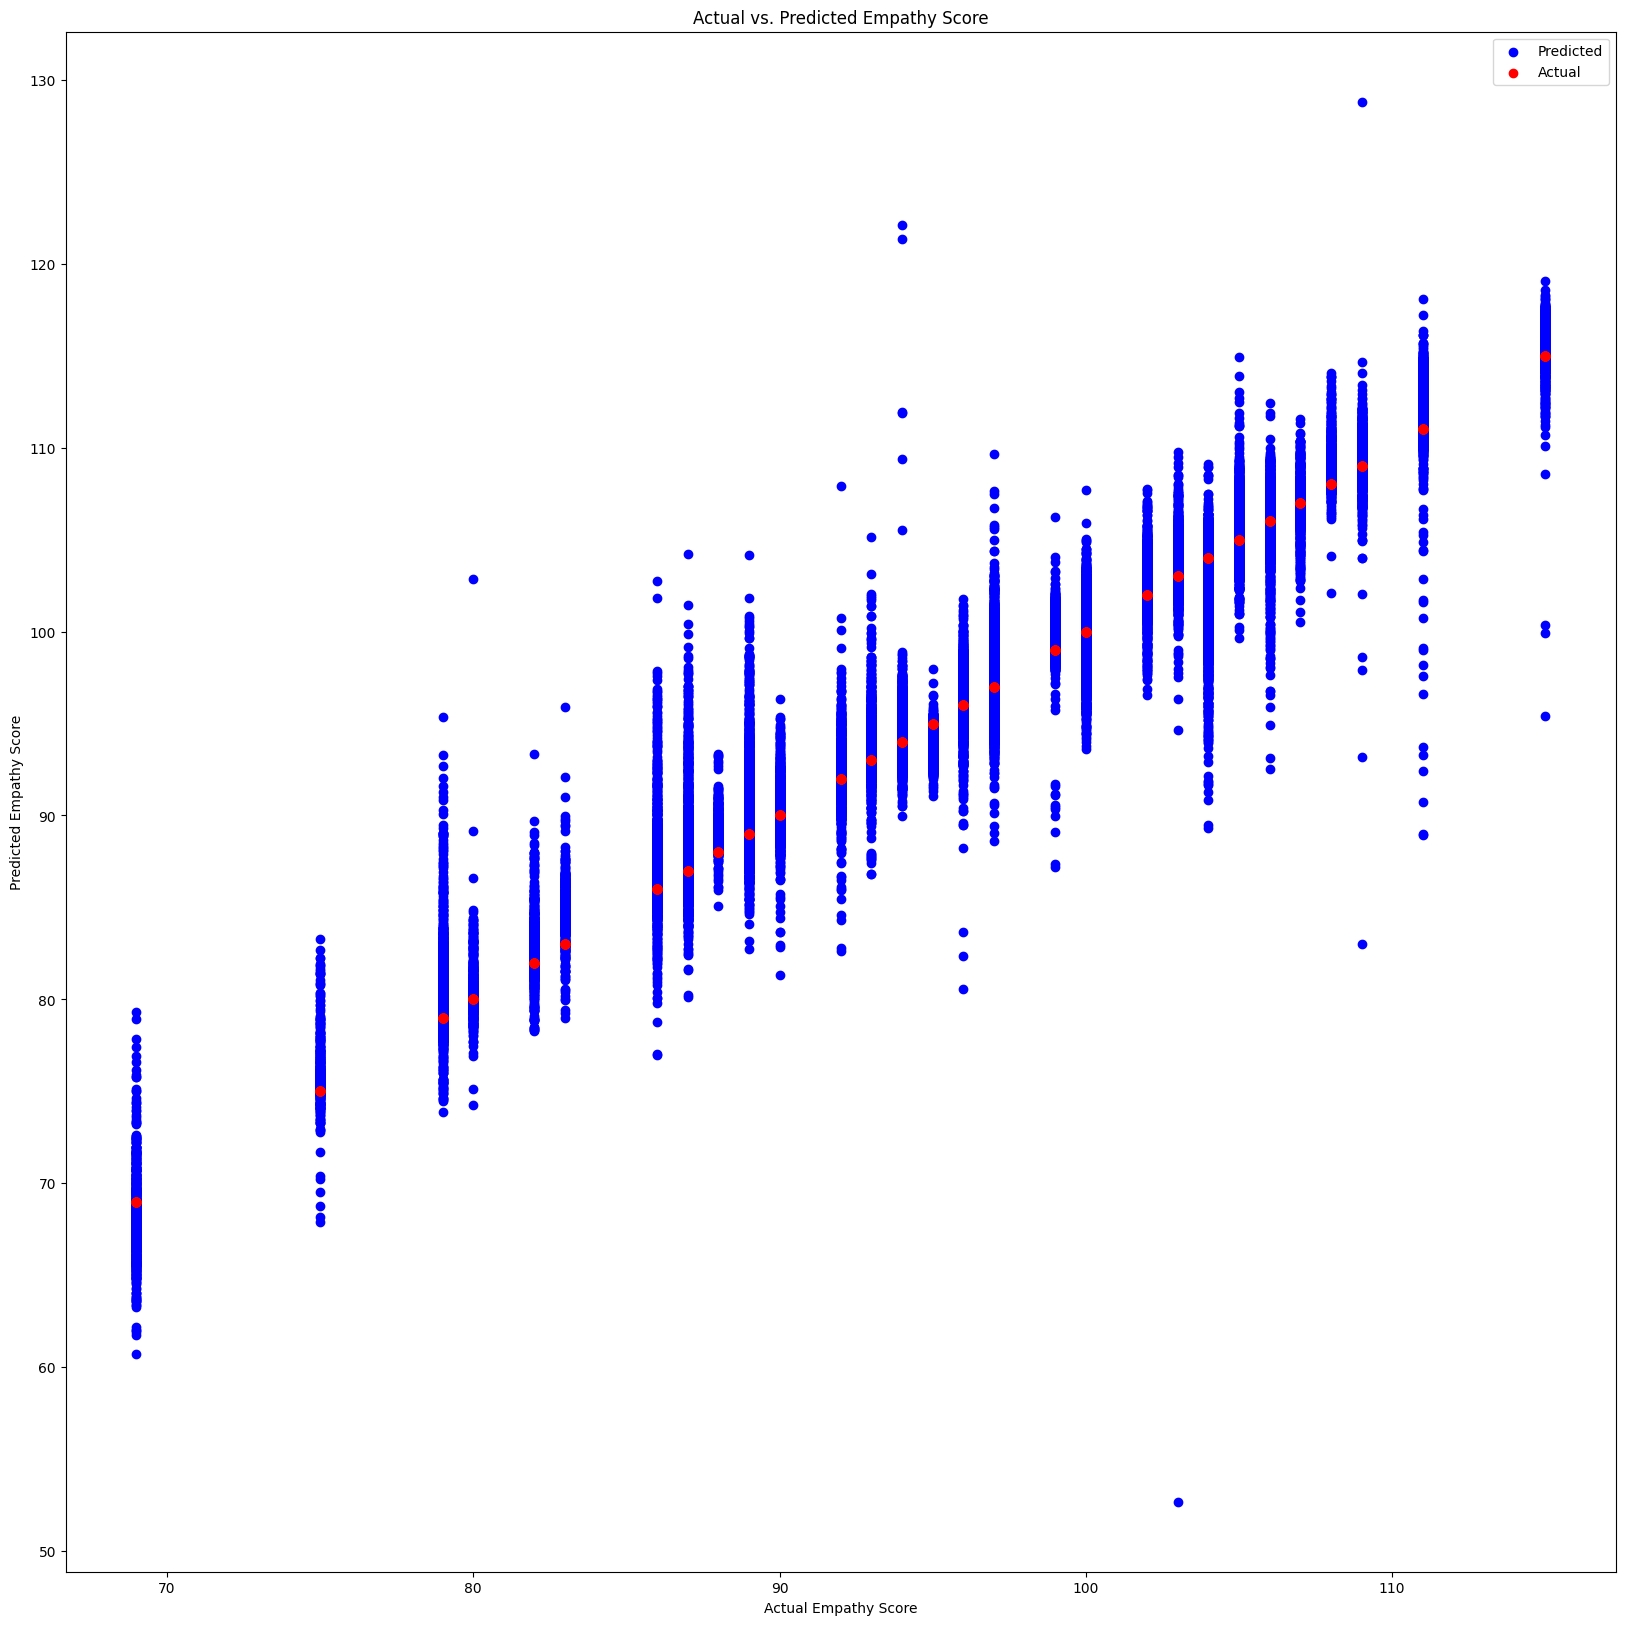

In [69]:
create_scatter_plot(y_test, predictions3)

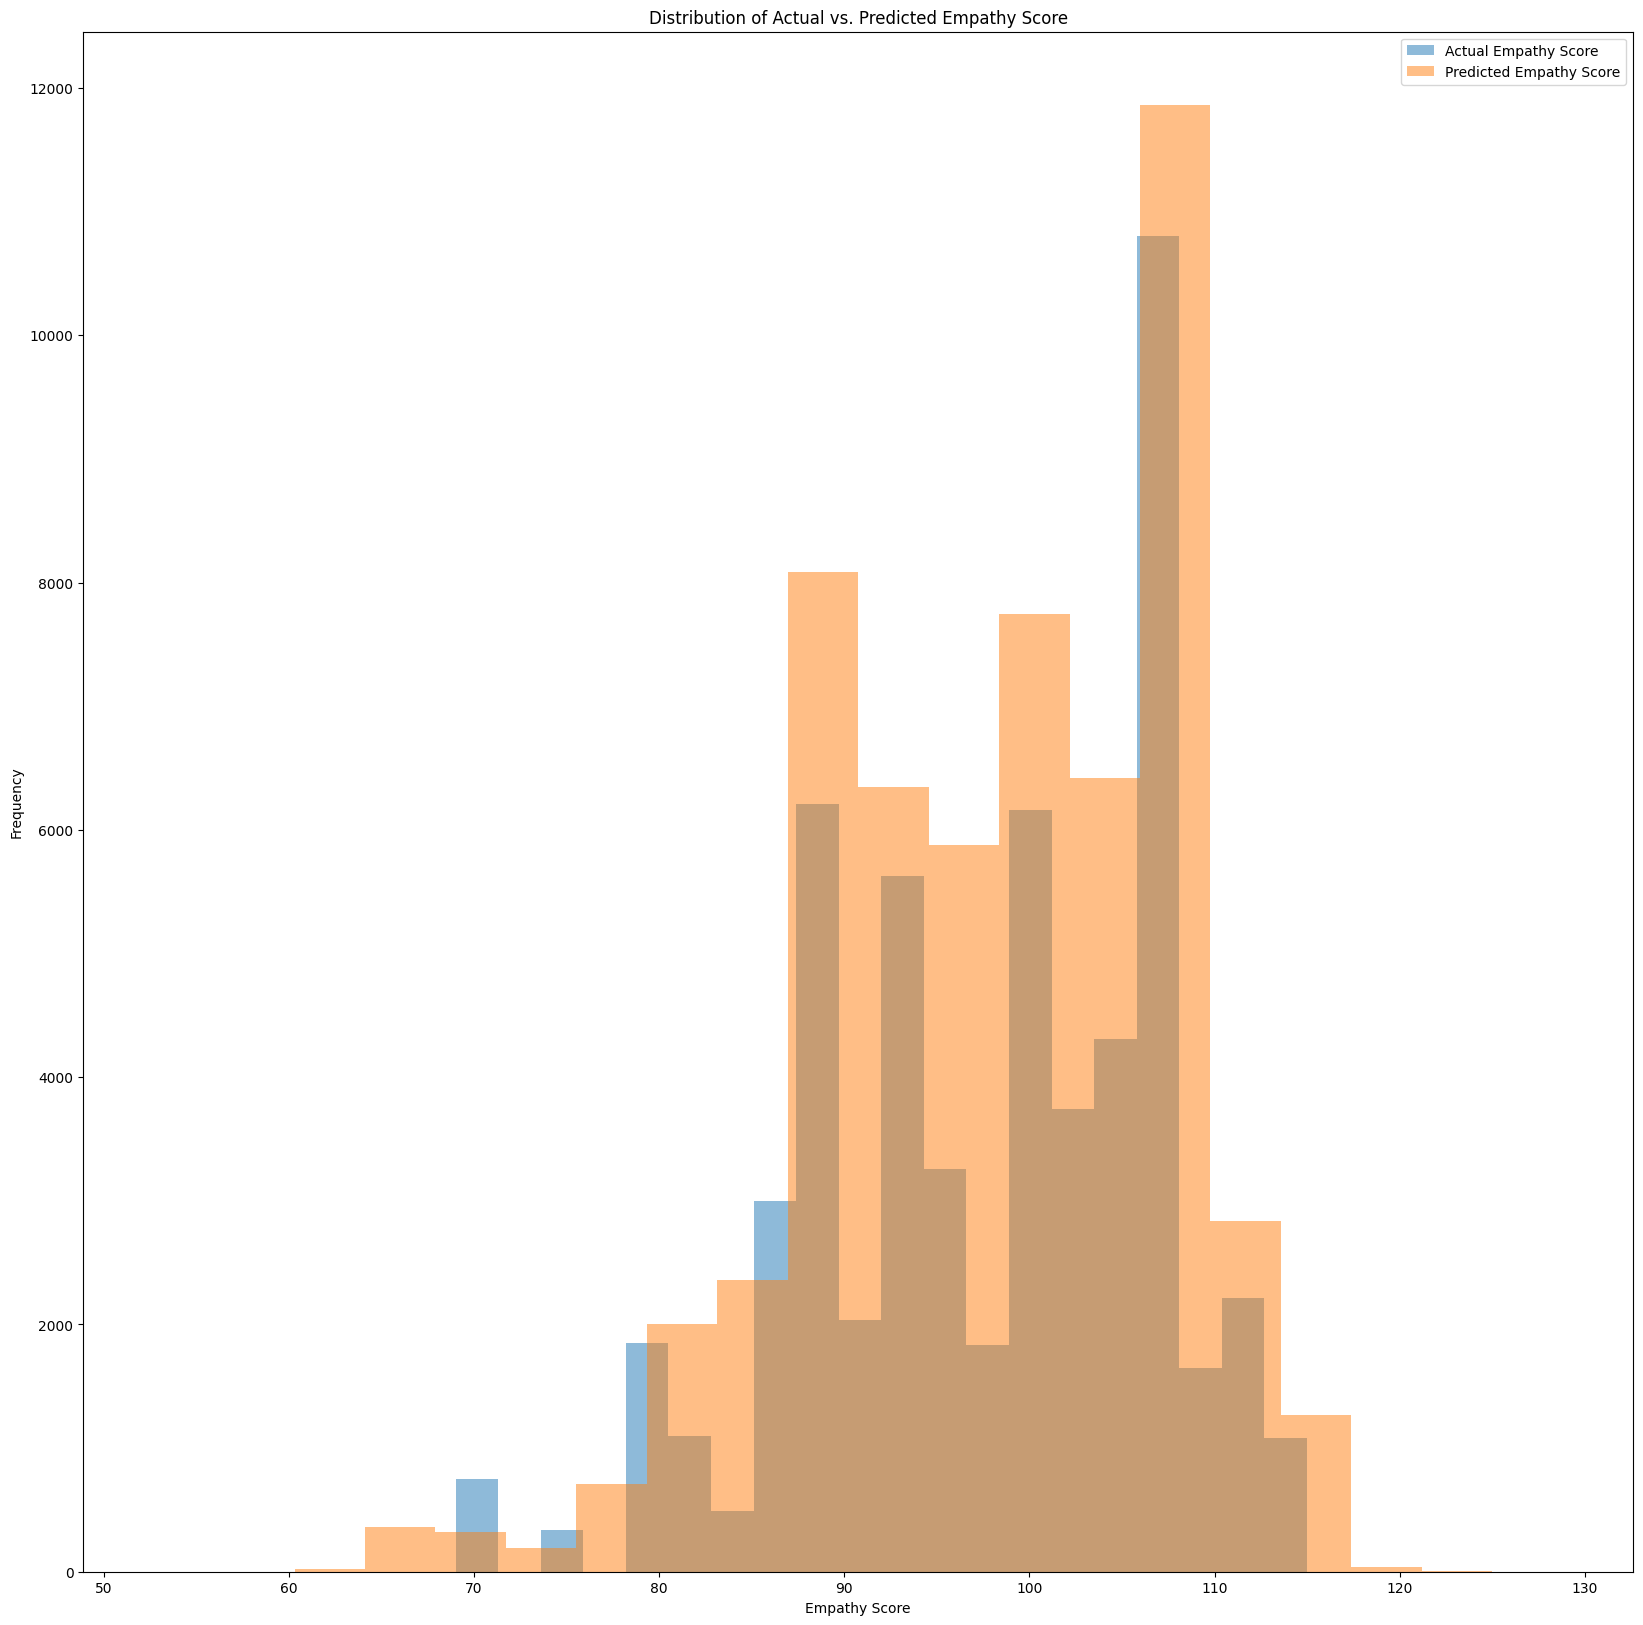

In [70]:
create_histograms(y_test, predictions3)

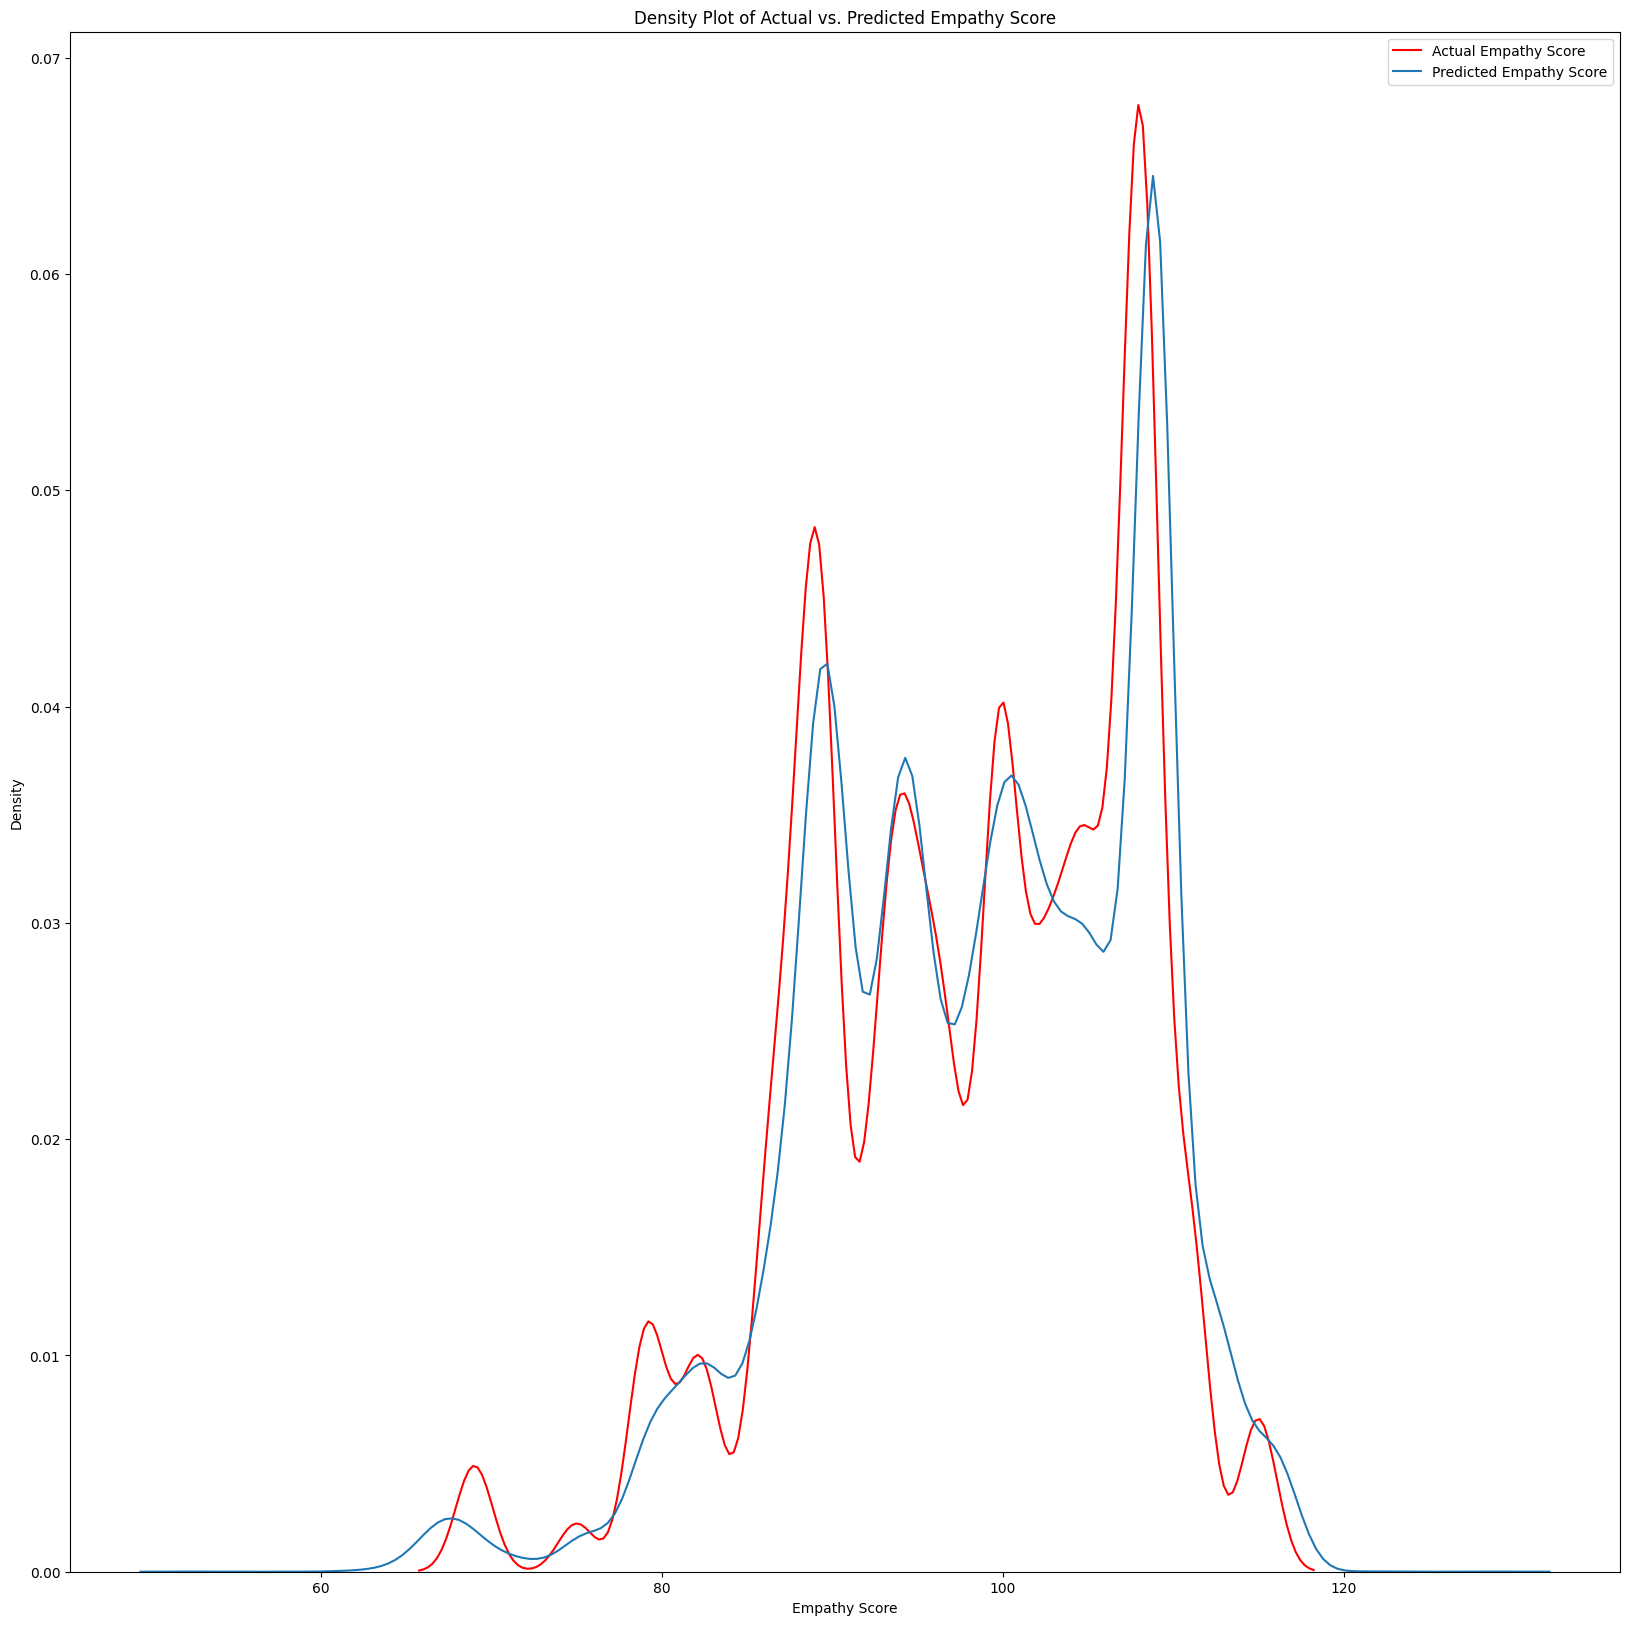

In [71]:
create_density_plots(y_test, predictions3)

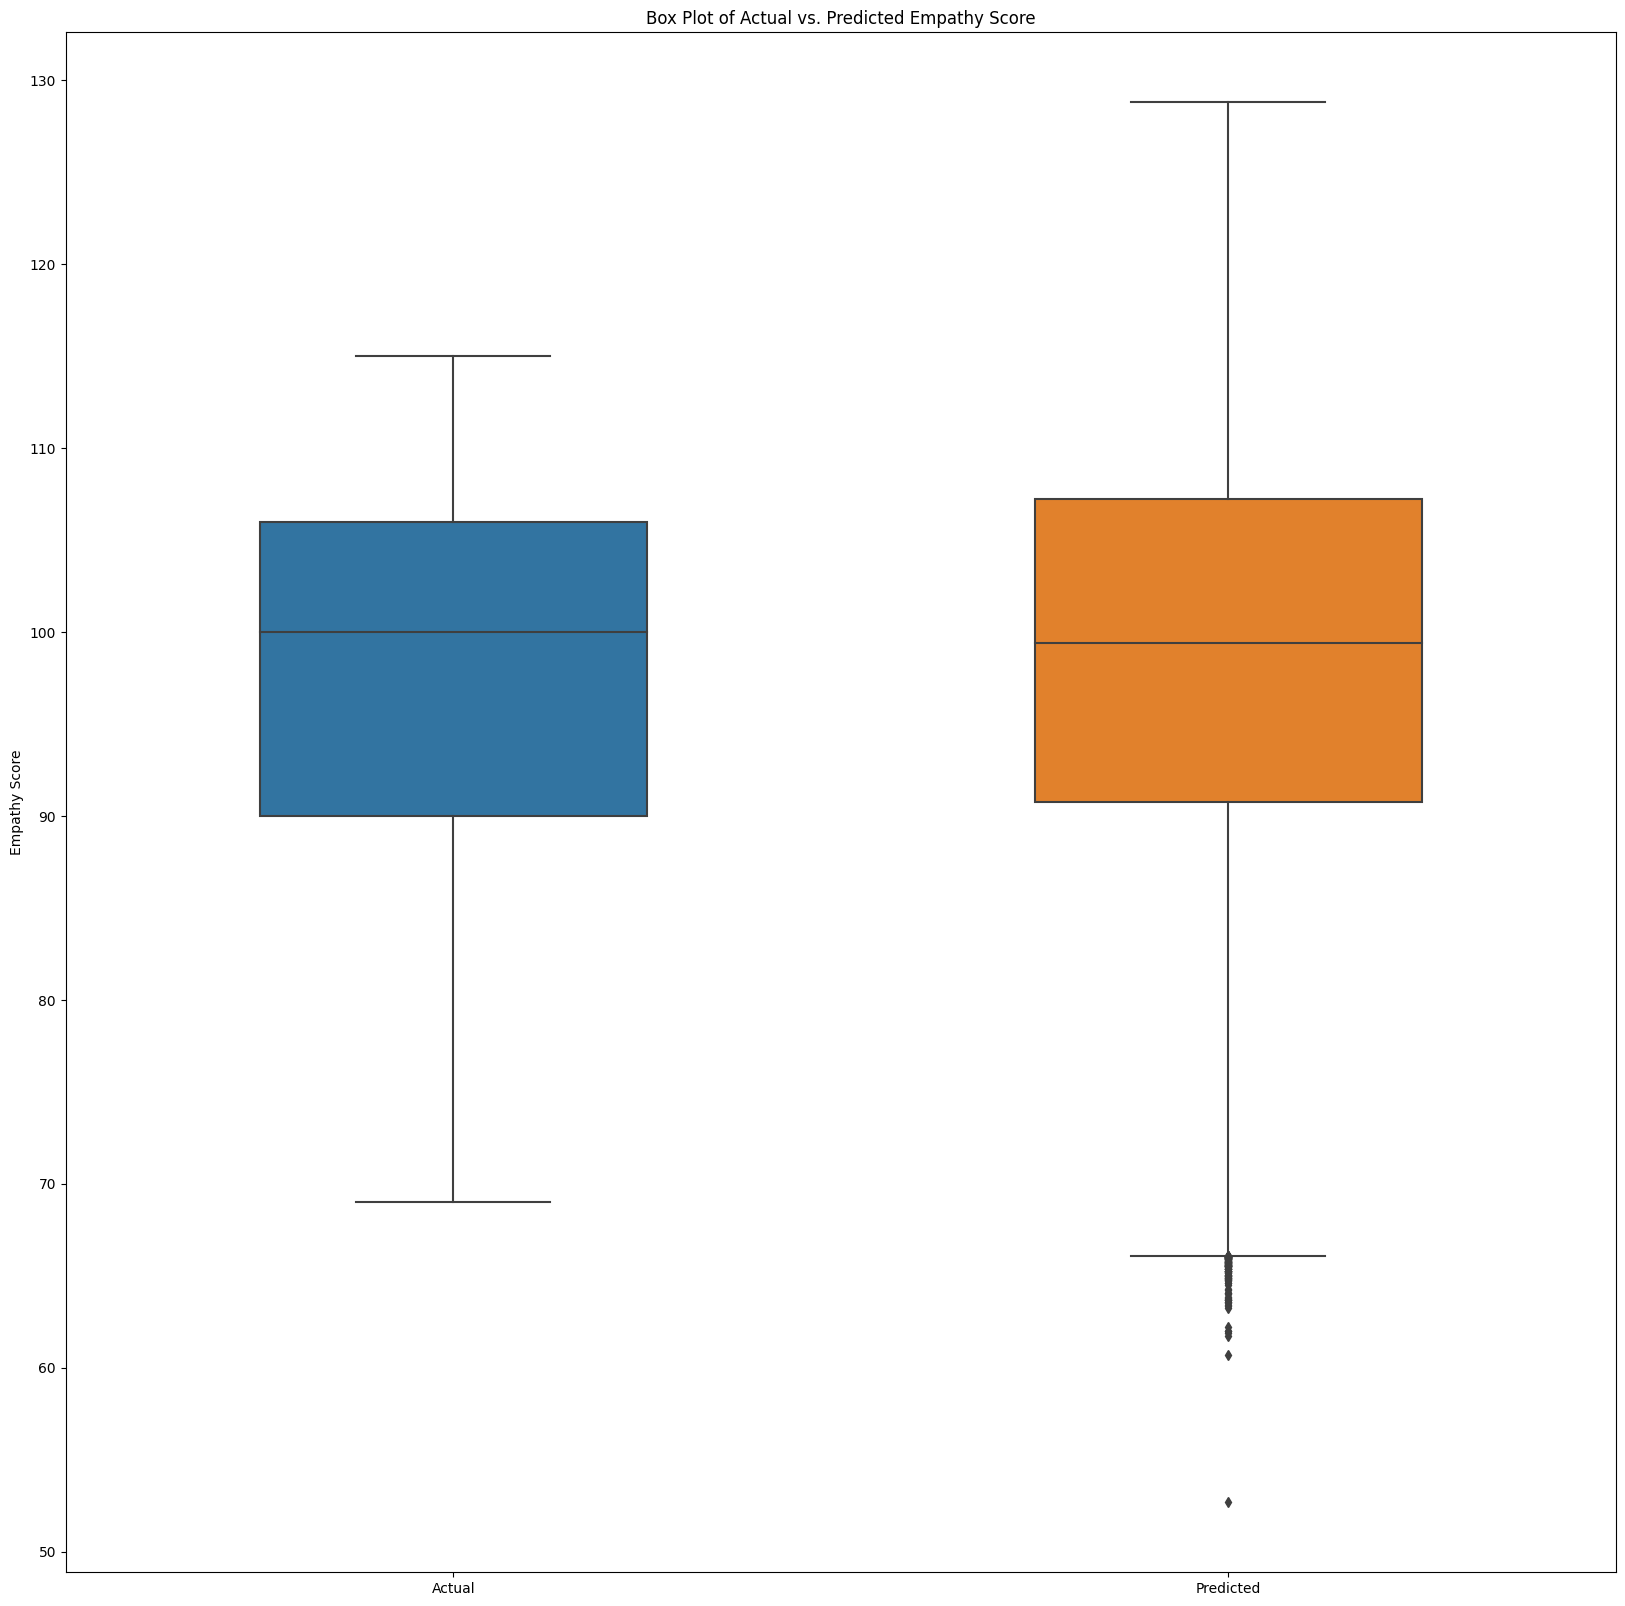

In [72]:
create_box_plot(y_test, predictions3)

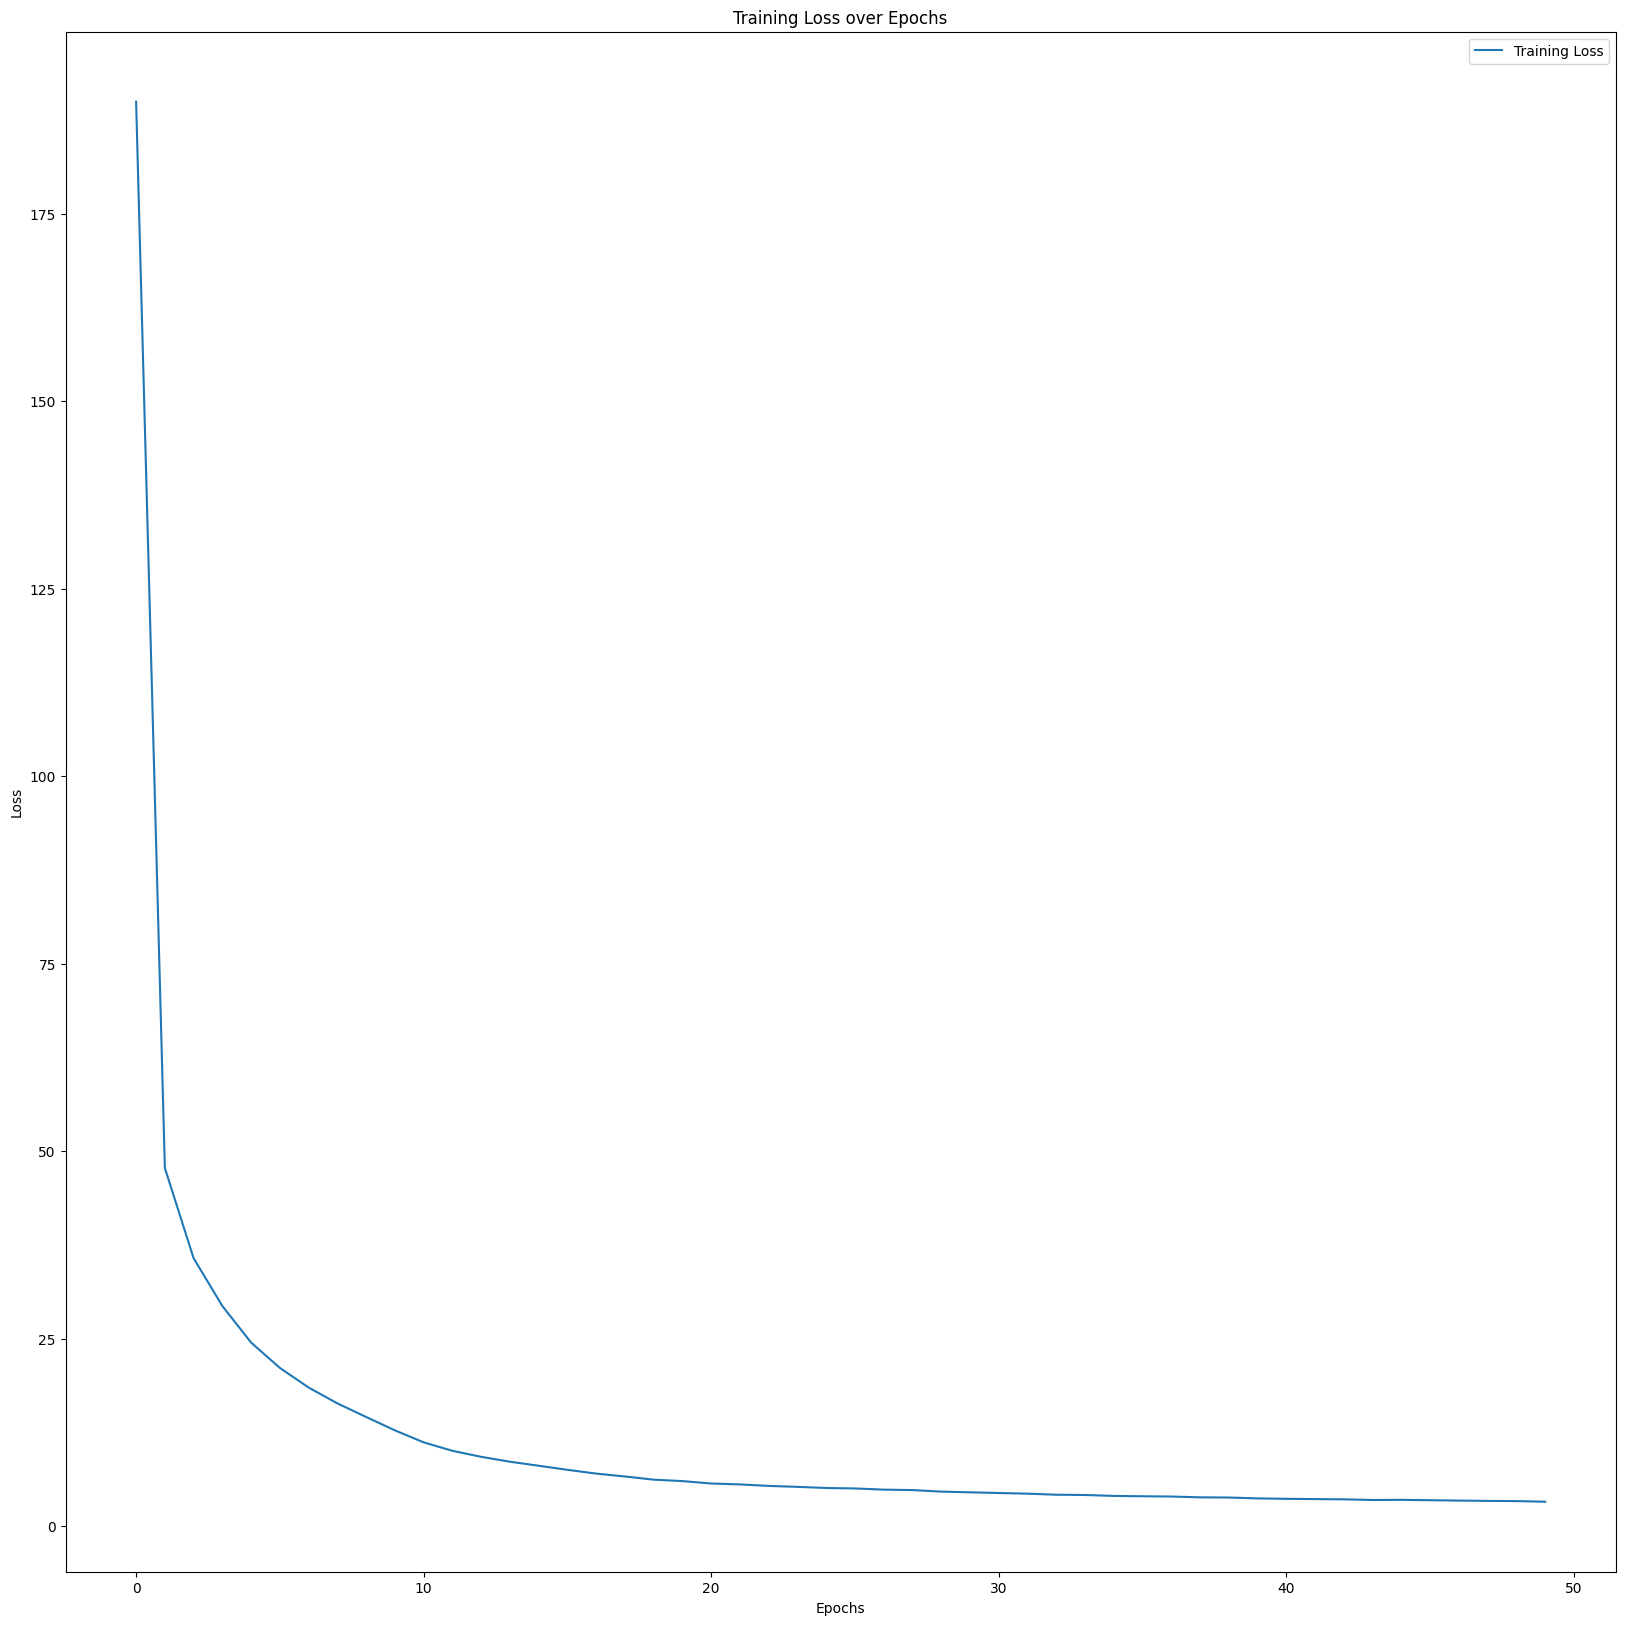

In [73]:
plot_loss_curve(history3)

In [74]:
# concatenate y_test and predictions
df03 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), predictions3.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

# Round the predicted scores to 2 decimal places
df03['predictions'] = df03['predictions'].round()

# print the dataframe
df03.head(10)

y_test  predictions
0   102.0        103.0
1    89.0         90.0
2   108.0        109.0
3    87.0         84.0
4    89.0         90.0
5    82.0         81.0
6   109.0        110.0
7   108.0        109.0
8   100.0        102.0
9    86.0         88.0

In [130]:
calculate_mismatch_percentage(y_test, predictions3, df03)

Number of values that do not match in predictions: 43021 out of 56454
Percentage of values that do not match in predictions: 76.21%
Number of values that do match in predictions: 13433 out of 56454
Percentage of values that do match in predictions: 23.79%


# Full dataset

Let's make predictions for the entire dataset, which consists of 502 files from 60 people. 


In [76]:
import os
from collections import defaultdict

data_path = "EyeT/"
participants = range(1, 61)

selected_files = []
participant_trial_count = defaultdict(int)

for participant in participants:
    for trial_num in range(0, 61):
        participant_files = os.listdir(data_path)
        participant_files = [f for f in participant_files if f.endswith(f"_participant_{participant}_trial_{trial_num}.csv")]
        if len(participant_files) == 0:
            continue
        selected_files.extend([os.path.join(data_path, f) for f in participant_files])
        participant_trial_count[participant] += 1
        #print(participant_files)

# Print the list of participants with the number of trials they have taken
for participant, trial_count in participant_trial_count.items():
    print(f"Participant {participant}: Number of Trials = {trial_count} ")

Participant 1: Number of Trials = 8 
Participant 2: Number of Trials = 4 
Participant 3: Number of Trials = 16 
Participant 4: Number of Trials = 8 
Participant 5: Number of Trials = 24 
Participant 6: Number of Trials = 12 
Participant 7: Number of Trials = 32 
Participant 8: Number of Trials = 16 
Participant 9: Number of Trials = 40 
Participant 10: Number of Trials = 4 
Participant 11: Number of Trials = 48 
Participant 12: Number of Trials = 4 
Participant 13: Number of Trials = 8 
Participant 14: Number of Trials = 4 
Participant 15: Number of Trials = 8 
Participant 16: Number of Trials = 4 
Participant 17: Number of Trials = 8 
Participant 18: Number of Trials = 4 
Participant 19: Number of Trials = 8 
Participant 20: Number of Trials = 4 
Participant 21: Number of Trials = 8 
Participant 22: Number of Trials = 4 
Participant 23: Number of Trials = 8 
Participant 24: Number of Trials = 4 
Participant 25: Number of Trials = 8 
Participant 26: Number of Trials = 3 
Participant 27

In [77]:
# Calculate total number of trials across all participants
total_trials = sum(participant_trial_count.values())

# Print total number of trials
print("Total number of trials: ", total_trials)

Total number of trials:  502


In [78]:
import glob
#Using Glob module for loading
path = r'EyeT/'
files = glob.glob(os.path.join(path, "*.csv"))    
data=[]
#looping to all files and storing in data
for i in files:
    df = pd.read_csv(i)
    data.append(df)
#concatenating all files stored in data
data = pd.concat(data, ignore_index=True)
data.shape # (rows, columns)

(4844304, 71)

In [79]:
data.head()

Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0        3082             23419315           512092386          NaN   
1        3083             23419315           512092386          NaN   
2        3084             23426120           512099191  Eye Tracker   
3        3085             23434449           512107520  Eye Tracker   
4        3086             23442782           512115853  Eye Tracker   

            Project name Export date Participant name Recording name  \
0  Test group experiment  29.10.2020  Participant0001     Recording1   
1  Test group experiment  29.10.2020  Participant0001     Recording1   
2  Test group experiment  29.10.2020  Participant0001     Recording1   
3  Test group experiment  29.10.2020  Participant0001     Recording1   
4  Test group experiment  29.10.2020  Participant0001     Recording1   

  Recording date Recording date UTC  ... Original Media height  \
0     24.09.2020         24.09.2020  ...                   NaN   
1     24.09.2020         24.09.2020  ...                   NaN   
2     24.09.2020         24.09.2020  ...                 649.0   
3     24.09.2020         24.09.2020  ...                 649.0   
4     24.09.2020         24.09.2020  ...                 649.0   

  Eye movement type  Gaze event duration Eye movement type index  \
0          Fixation                117.0                    64.0   
1          Fixation                117.0                    64.0   
2          Fixation                117.0                    64.0   
3          Fixation                117.0                    64.0   
4          Fixation                117.0                    64.0   

  Fixation point X Fixation point Y  Fixation point X (MCSnorm)  \
0            971.0            341.0                      0,5073   
1            971.0            341.0                      0,5073   
2            971.0            341.0                      0,5073   
3            971.0            341.0                      0,5073   
4            971.0            341.0                      0,5073   

   Fixation point Y (MCSnorm) Mouse position X  Mouse position Y  
0                      0,3160              NaN               NaN  
1                      0,3160              NaN               NaN  
2                      0,3160              NaN               NaN  
3                      0,3160              NaN               NaN  
4                      0,3160              NaN               NaN  

[5 rows x 71 columns]

In [80]:
value_counts = data['Participant name'].value_counts()
value_counts

Participant0003    438150
Participant0001    427284
Participant0007    253509
Participant0005    239088
Participant0009    190174
Participant0002    142276
Participant0027    131054
Participant0013    123059
Participant0041    116508
Participant0019    111908
Participant0031    110414
Participant0025    108148
Participant0029    106395
Participant0035    101992
Participant0043     98695
Participant0055     96275
Participant0039     95915
Participant0059     95259
Participant0057     95023
Participant0004     85251
Participant0017     85136
Participant0015     83911
Participant0023     82402
Participant0011     80458
Participant0033     78263
Participant0053     71923
Participant0037     70185
Participant0047     66138
Participant0021     62269
Participant0049     61081
Participant0006     60468
Participant0045     59826
Participant0051     36300
Participant0024     33732
Participant0014     32570
Participant0044     32168
Participant0030     31357
Participant0022     30640
Participant0

In [81]:
# Call the preprocess_data() function to preprocess the data
df_preprocessed = preprocess_data(data)

In [82]:
# Merge the dataframes on 'Participant nr'
df_merged = pd.merge(df_preprocessed, df_questionnaire, on='Participant nr')

In [83]:
df_merged.head()

Participant nr  Gaze point X  Gaze point Y  Gaze point left X  \
0               1         962.0         346.0              912.0   
1               1         972.0         340.0              913.0   
2               1         970.0         323.0              922.0   
3               1         977.0         332.0              922.0   
4               1         975.0         352.0              931.0   

   Gaze point left Y  Gaze point right X  Gaze point right Y  \
0              292.0              1012.0               400.0   
1              287.0              1031.0               393.0   
2              292.0              1017.0               354.0   
3              292.0              1032.0               371.0   
4              452.0              1018.0               253.0   

   Gaze direction left X  Gaze direction left Y  Gaze direction left Z  ...  \
0                0.06370                0.00355               -0.99796  ...   
1                0.06385                0.00181               -0.99796  ...   
2                0.06698                0.00354               -0.99775  ...   
3                0.06699                0.00354               -0.99775  ...   
4                0.06972                0.05604               -0.99599  ...   

   Gaze point left X (MCSnorm)  Gaze point left Y (MCSnorm)  \
0                       0.4682                       0.2703   
1                       0.4685                       0.2655   
2                       0.4748                       0.2703   
3                       0.4748                       0.2703   
4                       0.4807                       0.4182   

   Gaze point right X (MCSnorm)  Gaze point right Y (MCSnorm)  \
0                        0.5350                        0.3701   
1                        0.5472                        0.3635   
2                        0.5382                        0.3276   
3                        0.5485                        0.3436   
4                        0.5390                        0.2339   

   Gaze event duration  Fixation point X  Fixation point Y  \
0                117.0             971.0             341.0   
1                117.0             971.0             341.0   
2                117.0             971.0             341.0   
3                117.0             971.0             341.0   
4                117.0             971.0             341.0   

   Fixation point X (MCSnorm)  Fixation point Y (MCSnorm)  \
0                      0.5073                       0.316   
1                      0.5073                       0.316   
2                      0.5073                       0.316   
3                      0.5073                       0.316   
4                      0.5073                       0.316   

   Total Score original  
0                   108  
1                   108  
2                   108  
3                   108  
4                   108  

[5 rows x 37 columns]

In [84]:
X_all_features = df_merged.drop(['Participant nr', 'Total Score original'], axis=1)
X_all_scaled = scaler.fit_transform(X_all_features)

# Convert the result back to a dataframe
X_all_features_df = pd.DataFrame(X_all_scaled, columns=X_all_features.columns)

X_all_features_df.head()

Gaze point X  Gaze point Y  Gaze point left X  Gaze point left Y  \
0      0.484767      0.220994           0.478424           0.198826   
1      0.488623      0.218627           0.478799           0.196869   
2      0.487852      0.211918           0.482176           0.198826   
3      0.490551      0.215470           0.482176           0.198826   
4      0.489780      0.223362           0.485553           0.261448   

   Gaze point right X  Gaze point right Y  Gaze direction left X  \
0            0.500000            0.238298               0.535858   
1            0.507353            0.235590               0.535988   
2            0.501935            0.220503               0.538692   
3            0.507740            0.227079               0.538701   
4            0.502322            0.181431               0.541060   

   Gaze direction left Y  Gaze direction left Z  Gaze direction right X  ...  \
0               0.366492               0.005443                0.489601  ...   
1               0.365029               0.005443                0.494580  ...   
2               0.366484               0.006003                0.490917  ...   
3               0.366484               0.006003                0.495092  ...   
4               0.410626               0.010699                0.491202  ...   

   Gaze point Y (MCSnorm)  Gaze point left X (MCSnorm)  \
0                  0.3202                       0.4682   
1                  0.3145                       0.4685   
2                  0.2989                       0.4748   
3                  0.3070                       0.4748   
4                  0.3261                       0.4807   

   Gaze point left Y (MCSnorm)  Gaze point right X (MCSnorm)  \
0                       0.2703                        0.5350   
1                       0.2655                        0.5472   
2                       0.2703                        0.5382   
3                       0.2703                        0.5485   
4                       0.4182                        0.5390   

   Gaze point right Y (MCSnorm)  Gaze event duration  Fixation point X  \
0                        0.3701             0.019265          0.491037   
1                        0.3635             0.019265          0.491037   
2                        0.3276             0.019265          0.491037   
3                        0.3436             0.019265          0.491037   
4                        0.2339             0.019265          0.491037   

   Fixation point Y  Fixation point X (MCSnorm)  Fixation point Y (MCSnorm)  
0          0.243267                    0.508471                       0.316  
1          0.243267                    0.508471                       0.316  
2          0.243267                    0.508471                       0.316  
3          0.243267                    0.508471                       0.316  
4          0.243267                    0.508471                       0.316  

[5 rows x 35 columns]

In [85]:
X_all_features_df.shape

(3507306, 35)

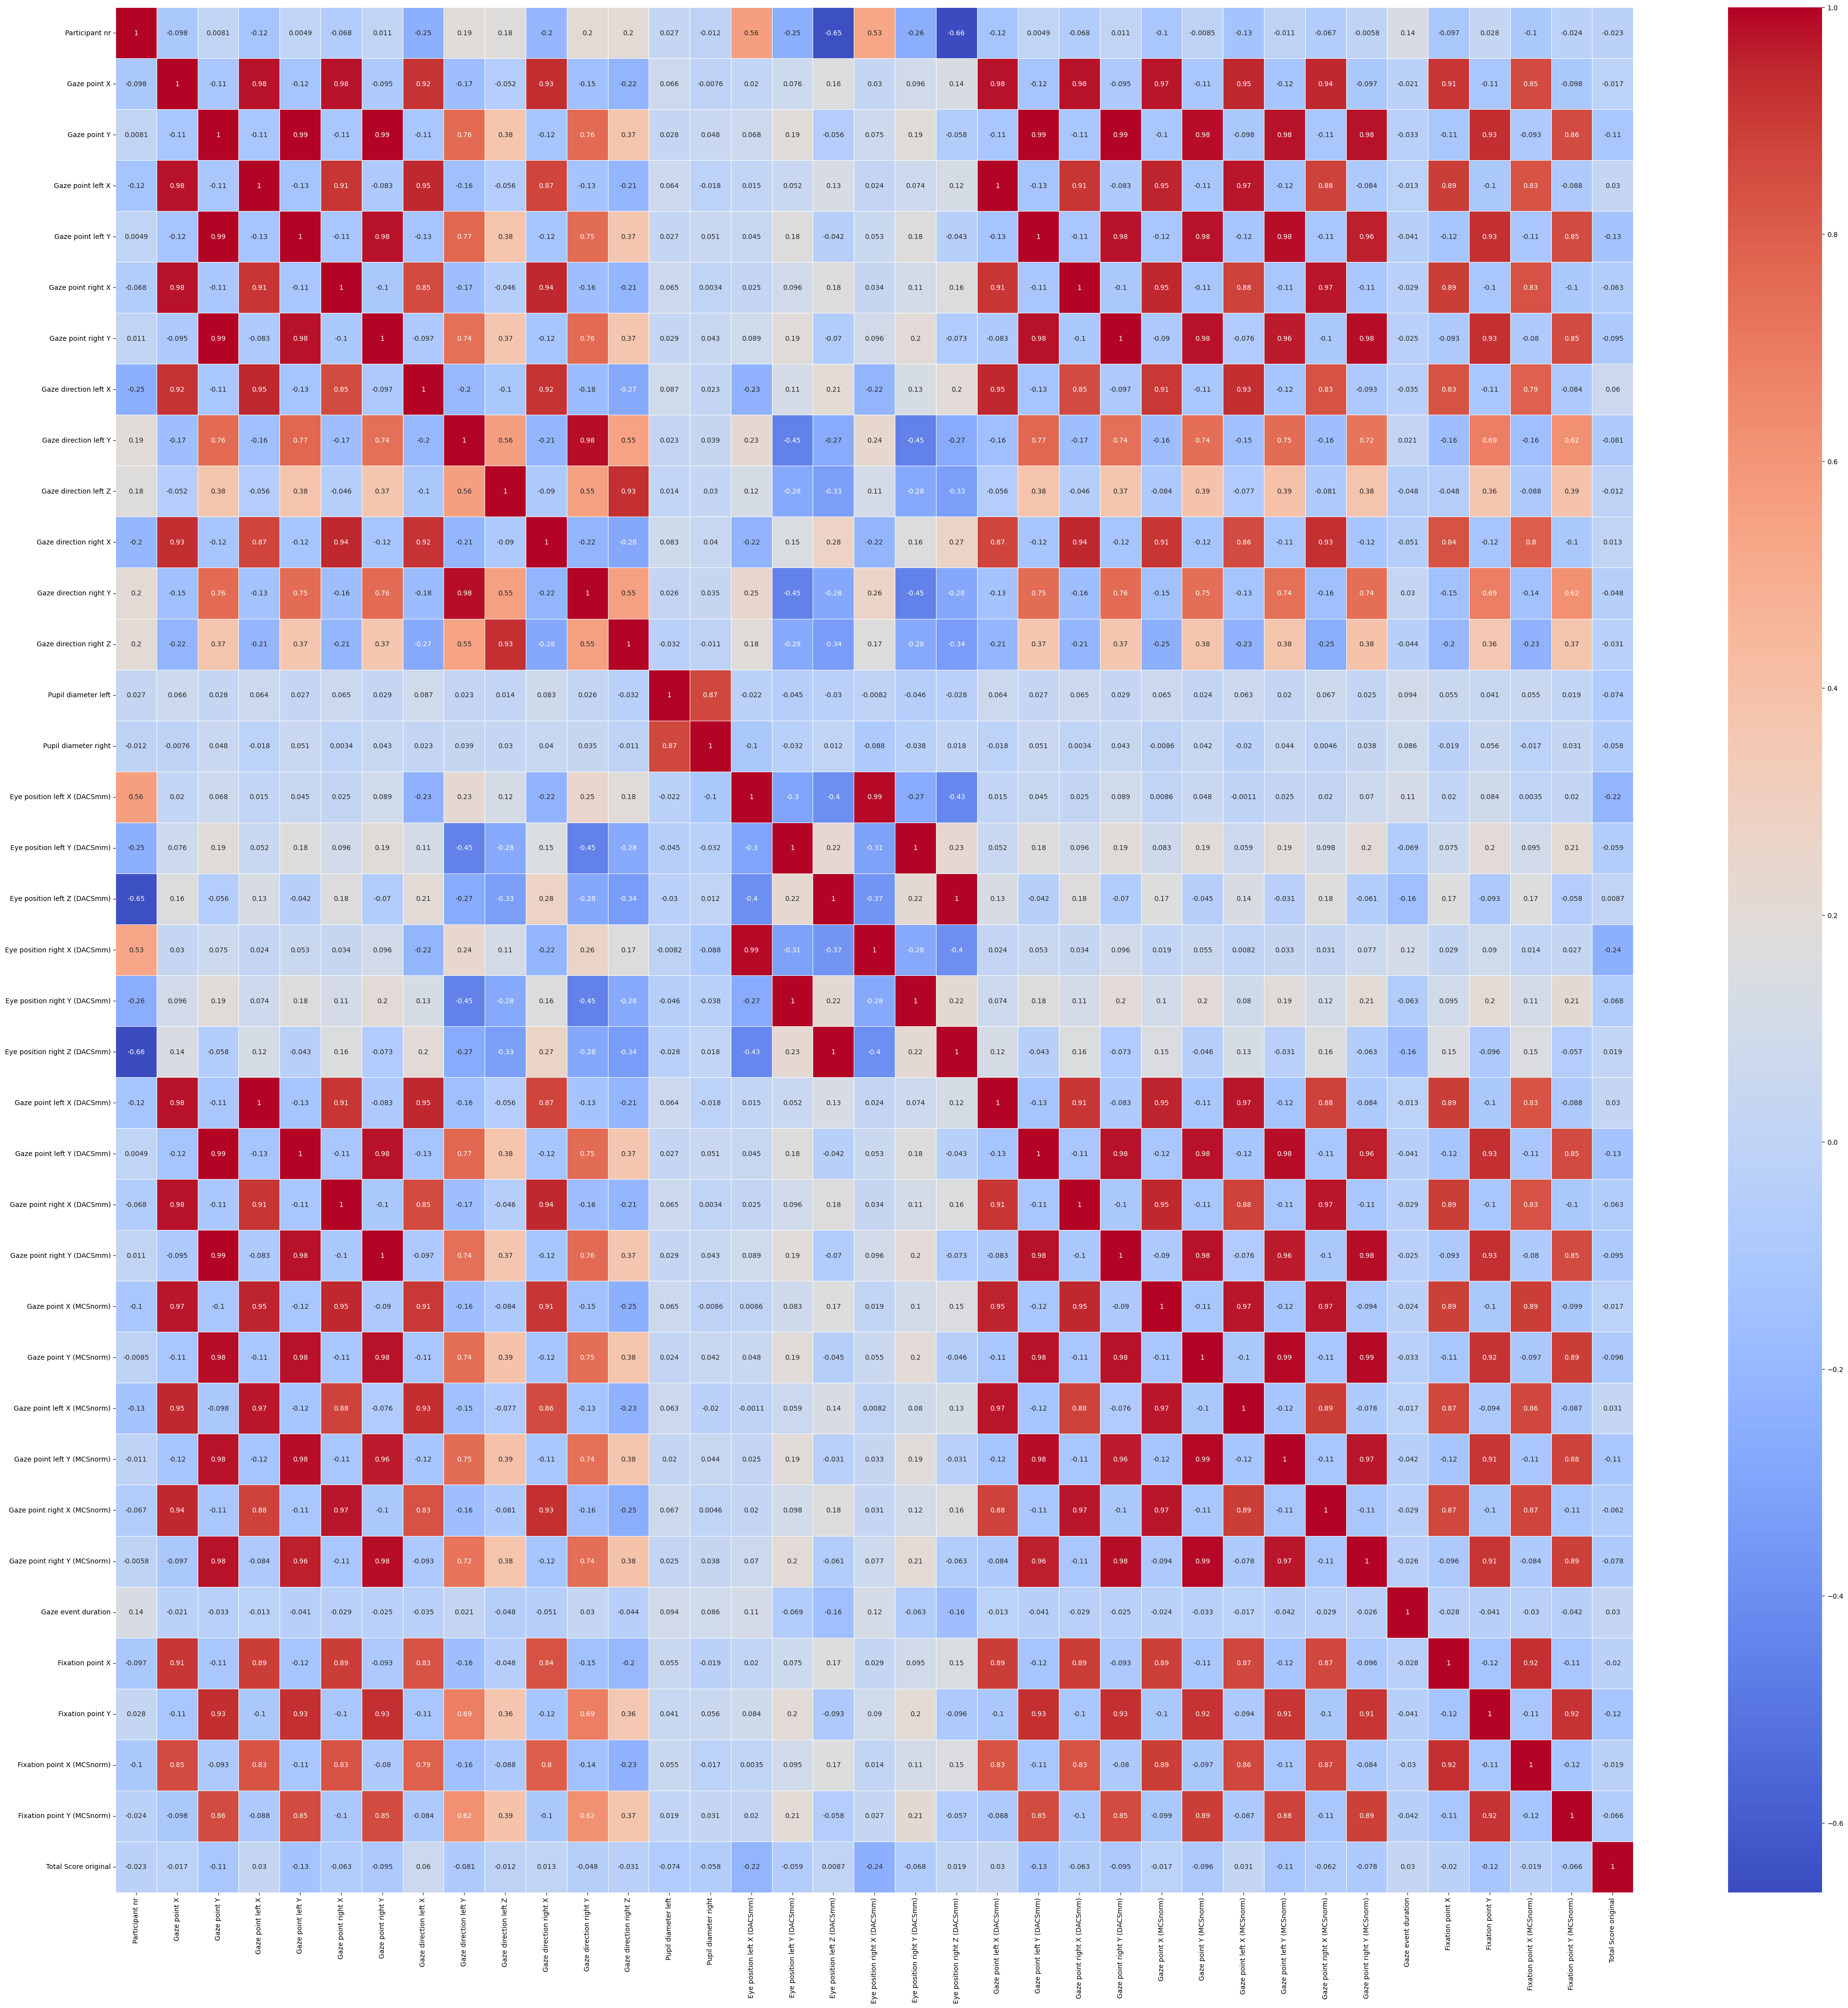

In [126]:
#correlation matrix for columns after preprocessing 
correlation_matrix = df_merged.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X = X_all_features_df
y = df_merged['Total Score original']

# Perform train-test split on normalized feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(2805844, 701462, 2805844, 701462)

In [87]:
# Create an MLP model
model4 = Sequential()

# Add input layer with the number of features as input_dim
model4.add(Dense(units=64, activation='relu', input_dim=35))  #35 features in X_selected

# Add one or more hidden layers with desired number of units and activation functions
model4.add(Dense(units=32, activation='relu'))
model4.add(Dense(units=16, activation='relu'))

# Add output layer with a single output neuron for regression task or multiple neurons for multi-class classification
model4.add(Dense(units=1))  # Assuming a regression task

# Compile the model by specifying loss function, optimizer, and evaluation metric(s)
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model on your training data
history4 = model4.fit(X_train, y_train, epochs=10, batch_size=32)  

# Evaluate the model on your test data
loss, mse = model4.evaluate(X_test, y_test)  

# Make predictions with the trained model
predictions4 = model4.predict(X_test)  

Epoch 1/10
87683/87683 [==============================] - 186s 2ms/step - loss: 45.0365 - mse: 45.0365
Epoch 2/10
87683/87683 [==============================] - 145s 2ms/step - loss: 19.1273 - mse: 19.1273
Epoch 3/10
87683/87683 [==============================] - 144s 2ms/step - loss: 15.1901 - mse: 15.1901
Epoch 4/10
87683/87683 [==============================] - 149s 2ms/step - loss: 13.5029 - mse: 13.5029
Epoch 5/10
87683/87683 [==============================] - 153s 2ms/step - loss: 11.9708 - mse: 11.9708
Epoch 6/10
87683/87683 [==============================] - 147s 2ms/step - loss: 10.0051 - mse: 10.0051
Epoch 7/10
87683/87683 [==============================] - 155s 2ms/step - loss: 8.4304 - mse: 8.4304
Epoch 8/10
87683/87683 [==============================] - 167s 2ms/step - loss: 7.1012 - mse: 7.1012
Epoch 9/10
87683/87683 [==============================] - 158s 2ms/step - loss: 5.9945 - mse: 5.9945
Epoch 10/10
21921/21921 [==============================] - 39s 2ms/step


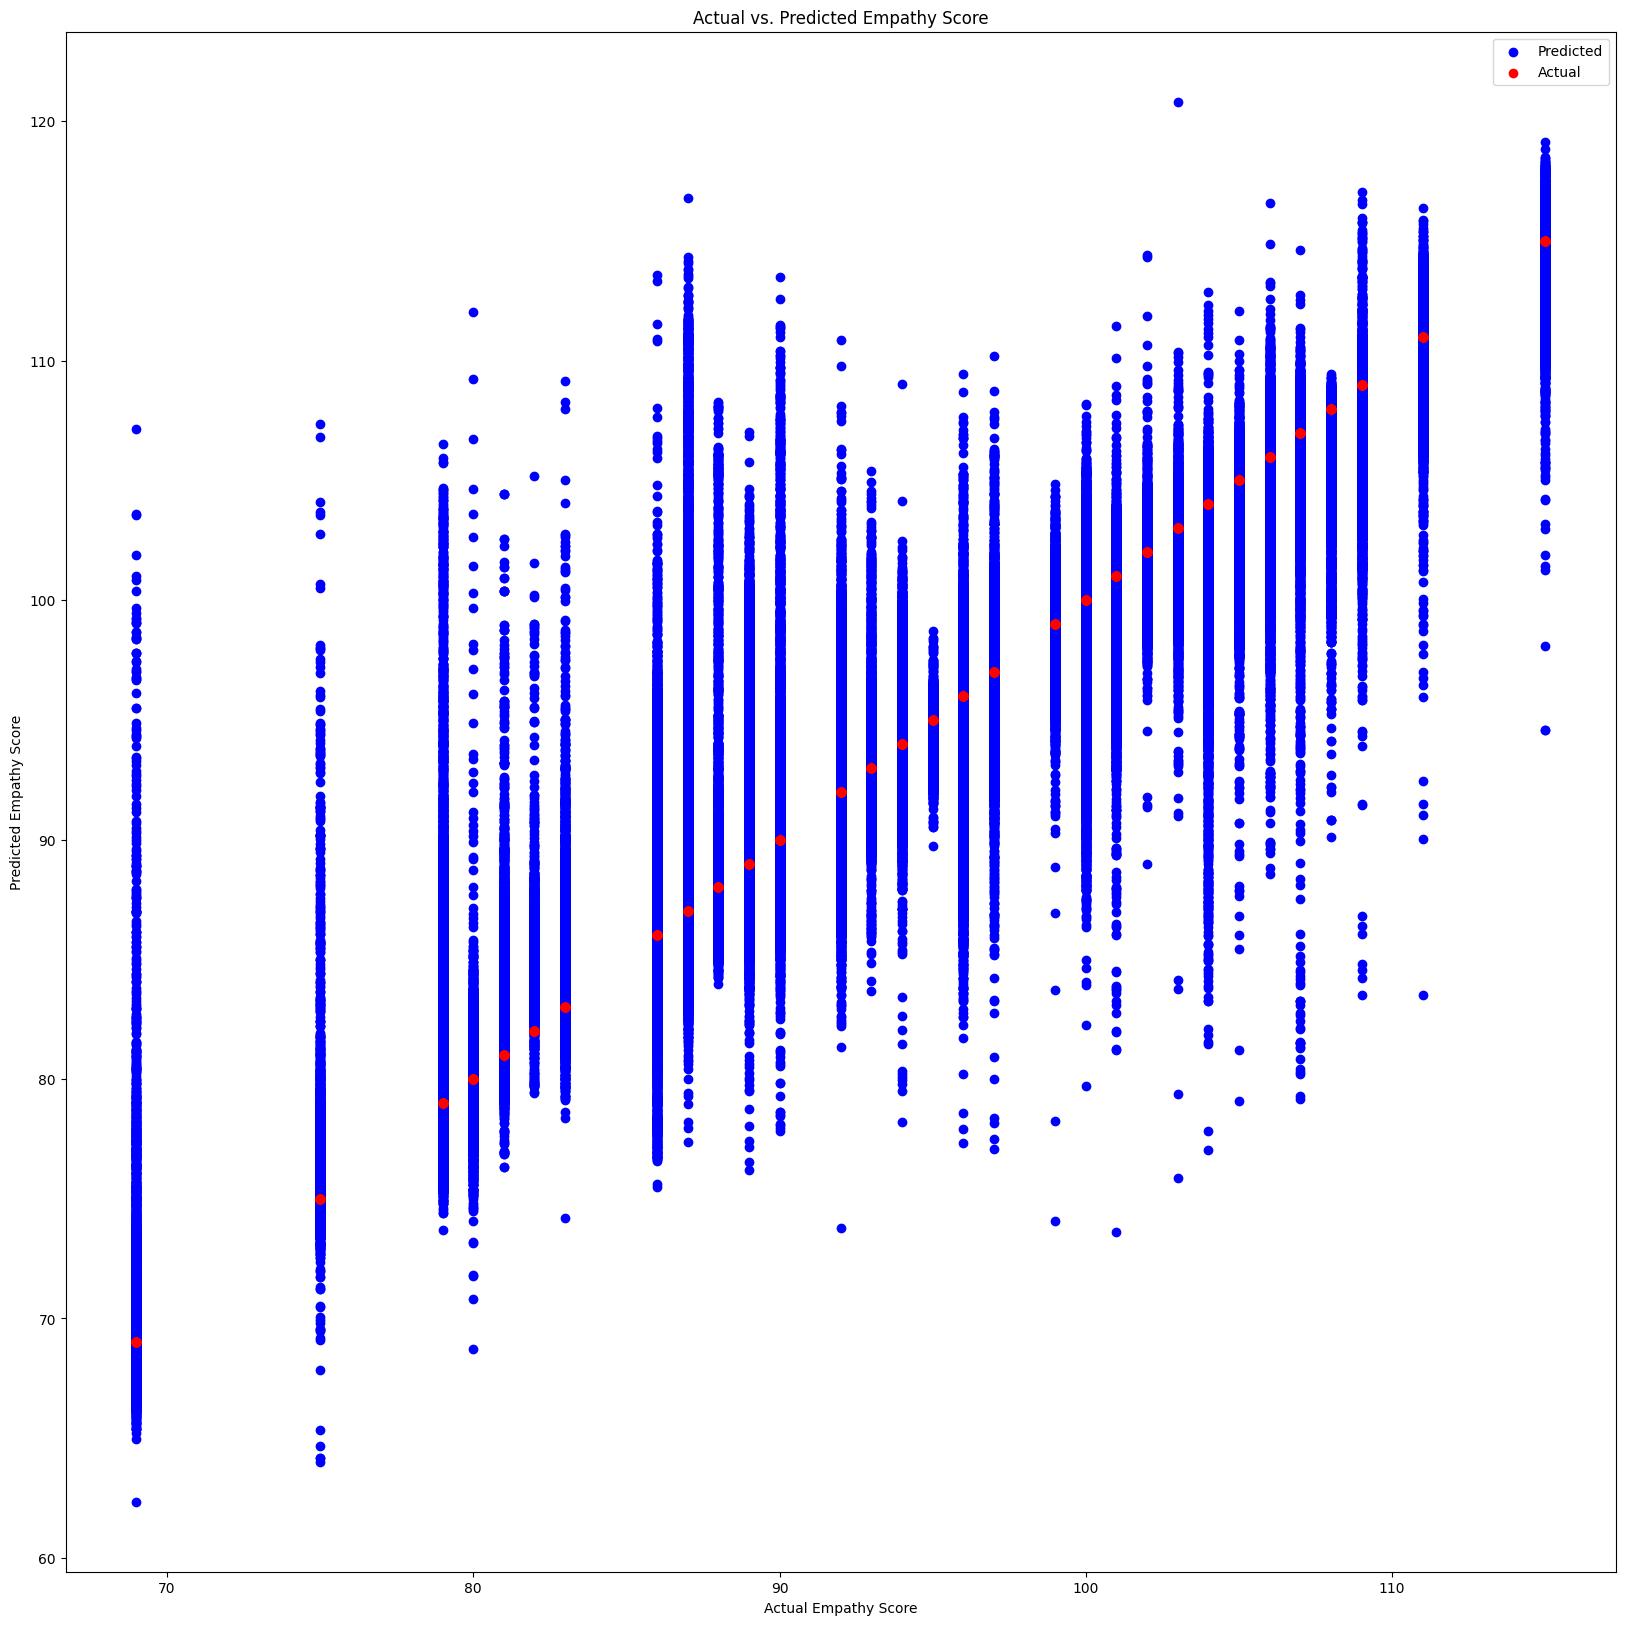

In [88]:
create_scatter_plot(y_test, predictions4)

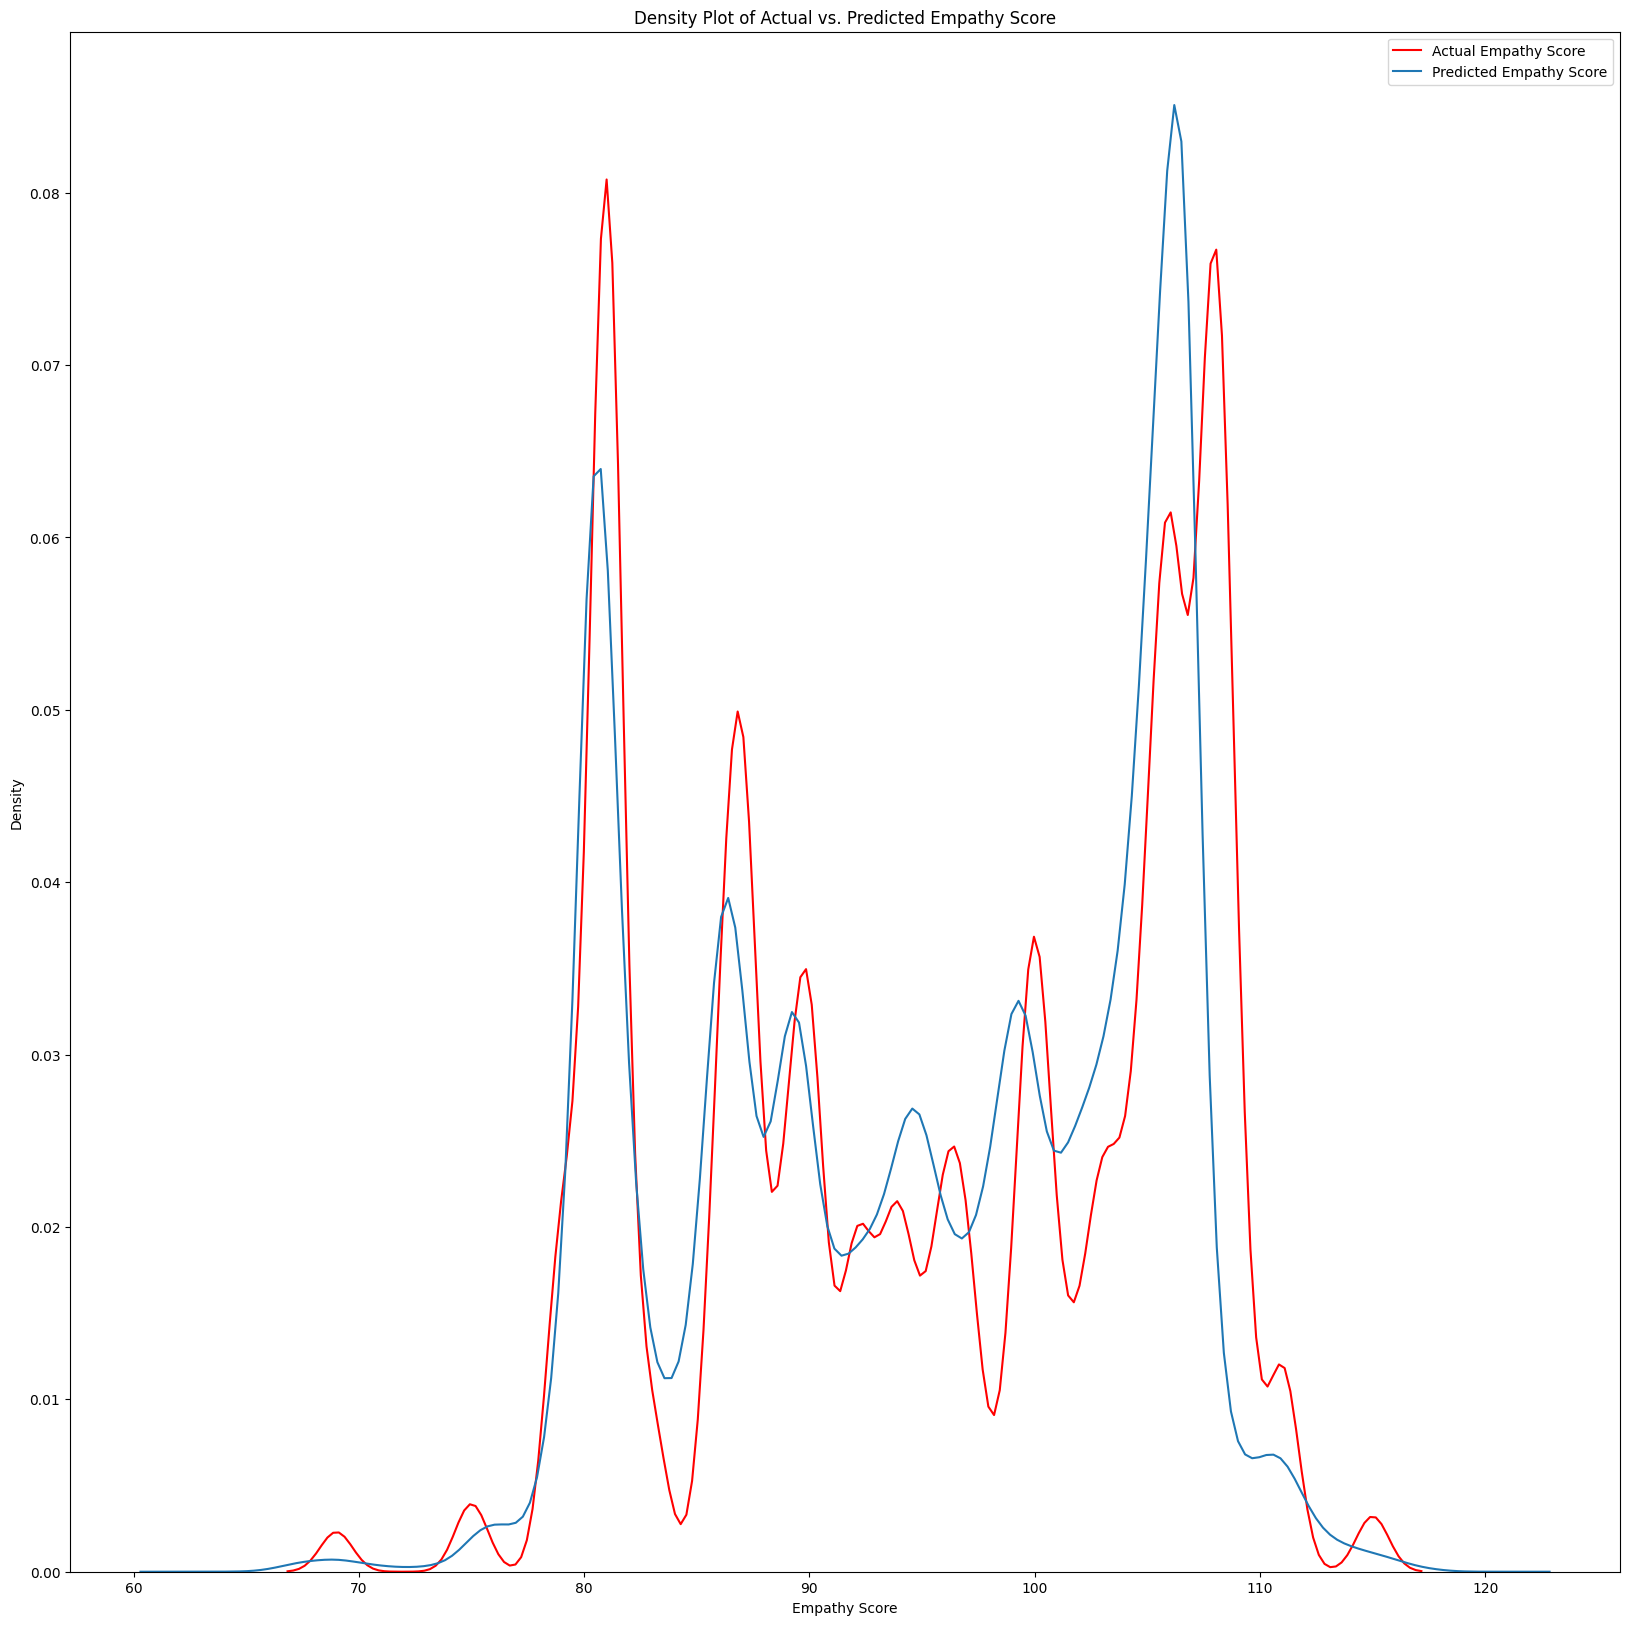

In [89]:
create_density_plots(y_test, predictions4)

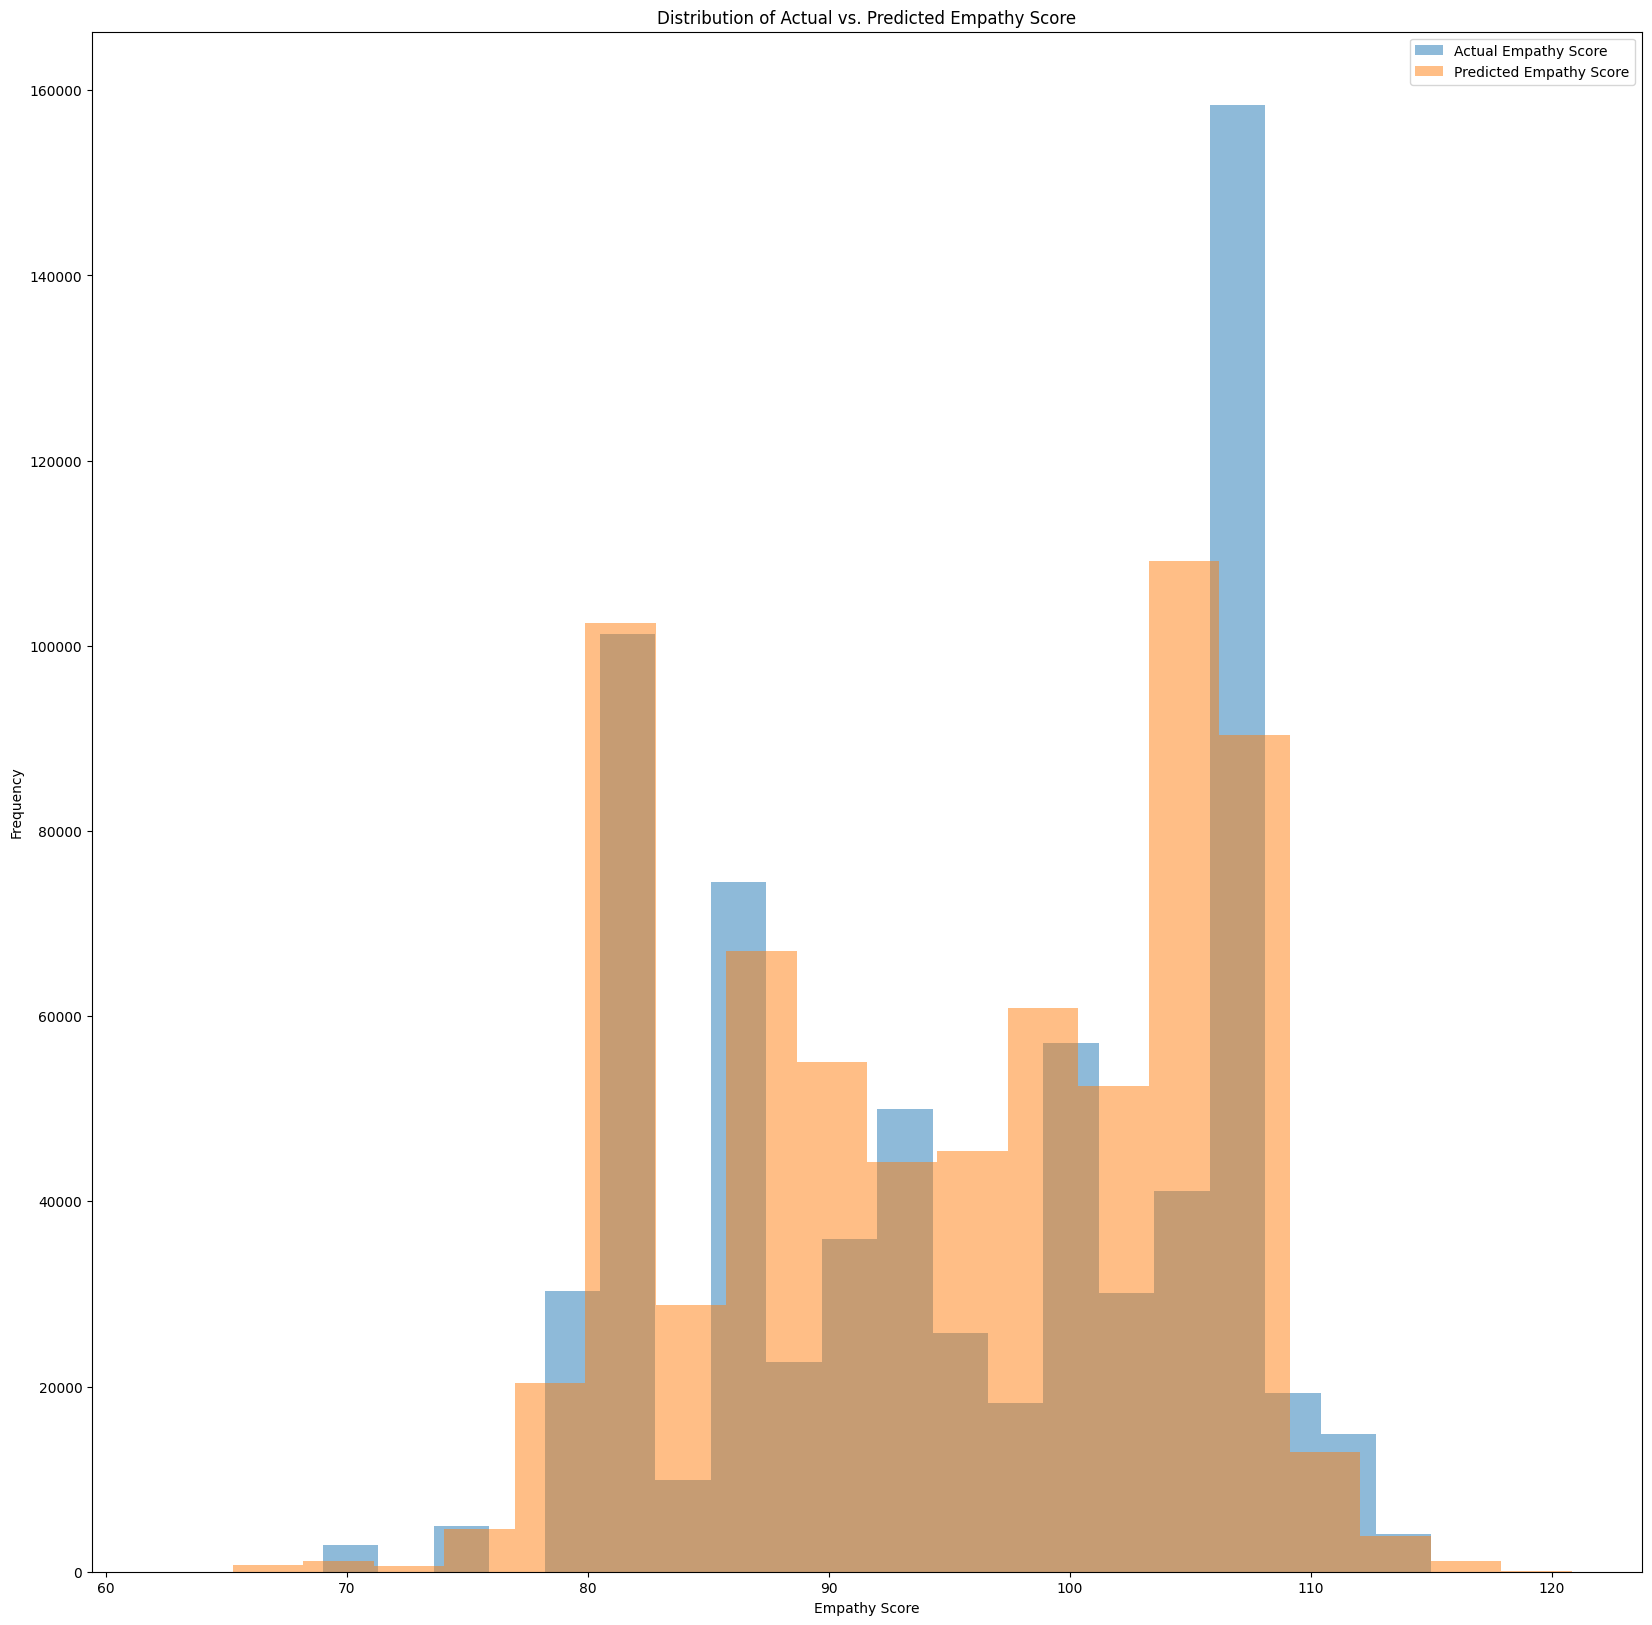

In [90]:
create_histograms(y_test, predictions4)

In [91]:
# concatenate y_test and predictions
df04 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), predictions4.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

# Round the predicted scores to 2 decimal places
df04['predictions'] = df04['predictions'].round()

# print the dataframe
df04.head(10)

y_test  predictions
0    81.0         81.0
1   108.0        106.0
2    79.0         78.0
3    79.0         86.0
4   106.0        105.0
5    90.0         89.0
6    81.0         81.0
7    96.0         95.0
8    86.0         86.0
9    81.0         79.0

In [92]:
len(df04)

701462

In [131]:
calculate_mismatch_percentage(y_test, predictions, df04)

Number of values that do not match in predictions: 529995 out of 701462
Percentage of values that do not match in predictions: 75.56%
Number of values that do match in predictions: 171467 out of 701462
Percentage of values that do match in predictions: 24.44%


Although the predictions are near, we will achieve much better outcomes if we train for more epochs. Let's practise for 50 epochs.


In [95]:
# Create an MLP model
model5 = Sequential()

# Add input layer with the number of features as input_dim
model5.add(Dense(units=64, activation='relu', input_dim=35))  #40 features in X_selected

# Add one or more hidden layers with desired number of units and activation functions
model5.add(Dense(units=32, activation='relu'))
model5.add(Dense(units=16, activation='relu'))

# Add output layer with a single output neuron for regression task or multiple neurons for multi-class classification
model5.add(Dense(units=1))  # Assuming a regression task

# Compile the model by specifying loss function, optimizer, and evaluation metric(s)
model5.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model on your training data
history5 = model5.fit(X_train, y_train, epochs=50, batch_size=32)  

# Evaluate the model on your test data
loss, mse = model5.evaluate(X_test, y_test)  

# Make predictions with the trained model
predictions5 = model5.predict(X_test)  

# Print the model summary
model5.summary()

Epoch 1/50
87683/87683 [==============================] - 170s 2ms/step - loss: 51.5675 - mse: 51.5675
Epoch 2/50
87683/87683 [==============================] - 168s 2ms/step - loss: 24.1498 - mse: 24.1498
Epoch 3/50
87683/87683 [==============================] - 166s 2ms/step - loss: 18.1719 - mse: 18.1719
Epoch 4/50
87683/87683 [==============================] - 169s 2ms/step - loss: 16.3023 - mse: 16.3023
Epoch 5/50
87683/87683 [==============================] - 170s 2ms/step - loss: 13.8019 - mse: 13.8019
Epoch 6/50
87683/87683 [==============================] - 175s 2ms/step - loss: 9.8548 - mse: 9.8548
Epoch 7/50
87683/87683 [==============================] - 180s 2ms/step - loss: 7.5241 - mse: 7.5241
Epoch 8/50
87683/87683 [==============================] - 174s 2ms/step - loss: 6.2554 - mse: 6.2554
Epoch 9/50
87683/87683 [==============================] - 185s 2ms/step - loss: 5.5290 - mse: 5.5290
Epoch 10/50
87683/87683 [==============================] - 175s 2ms/step - loss: 

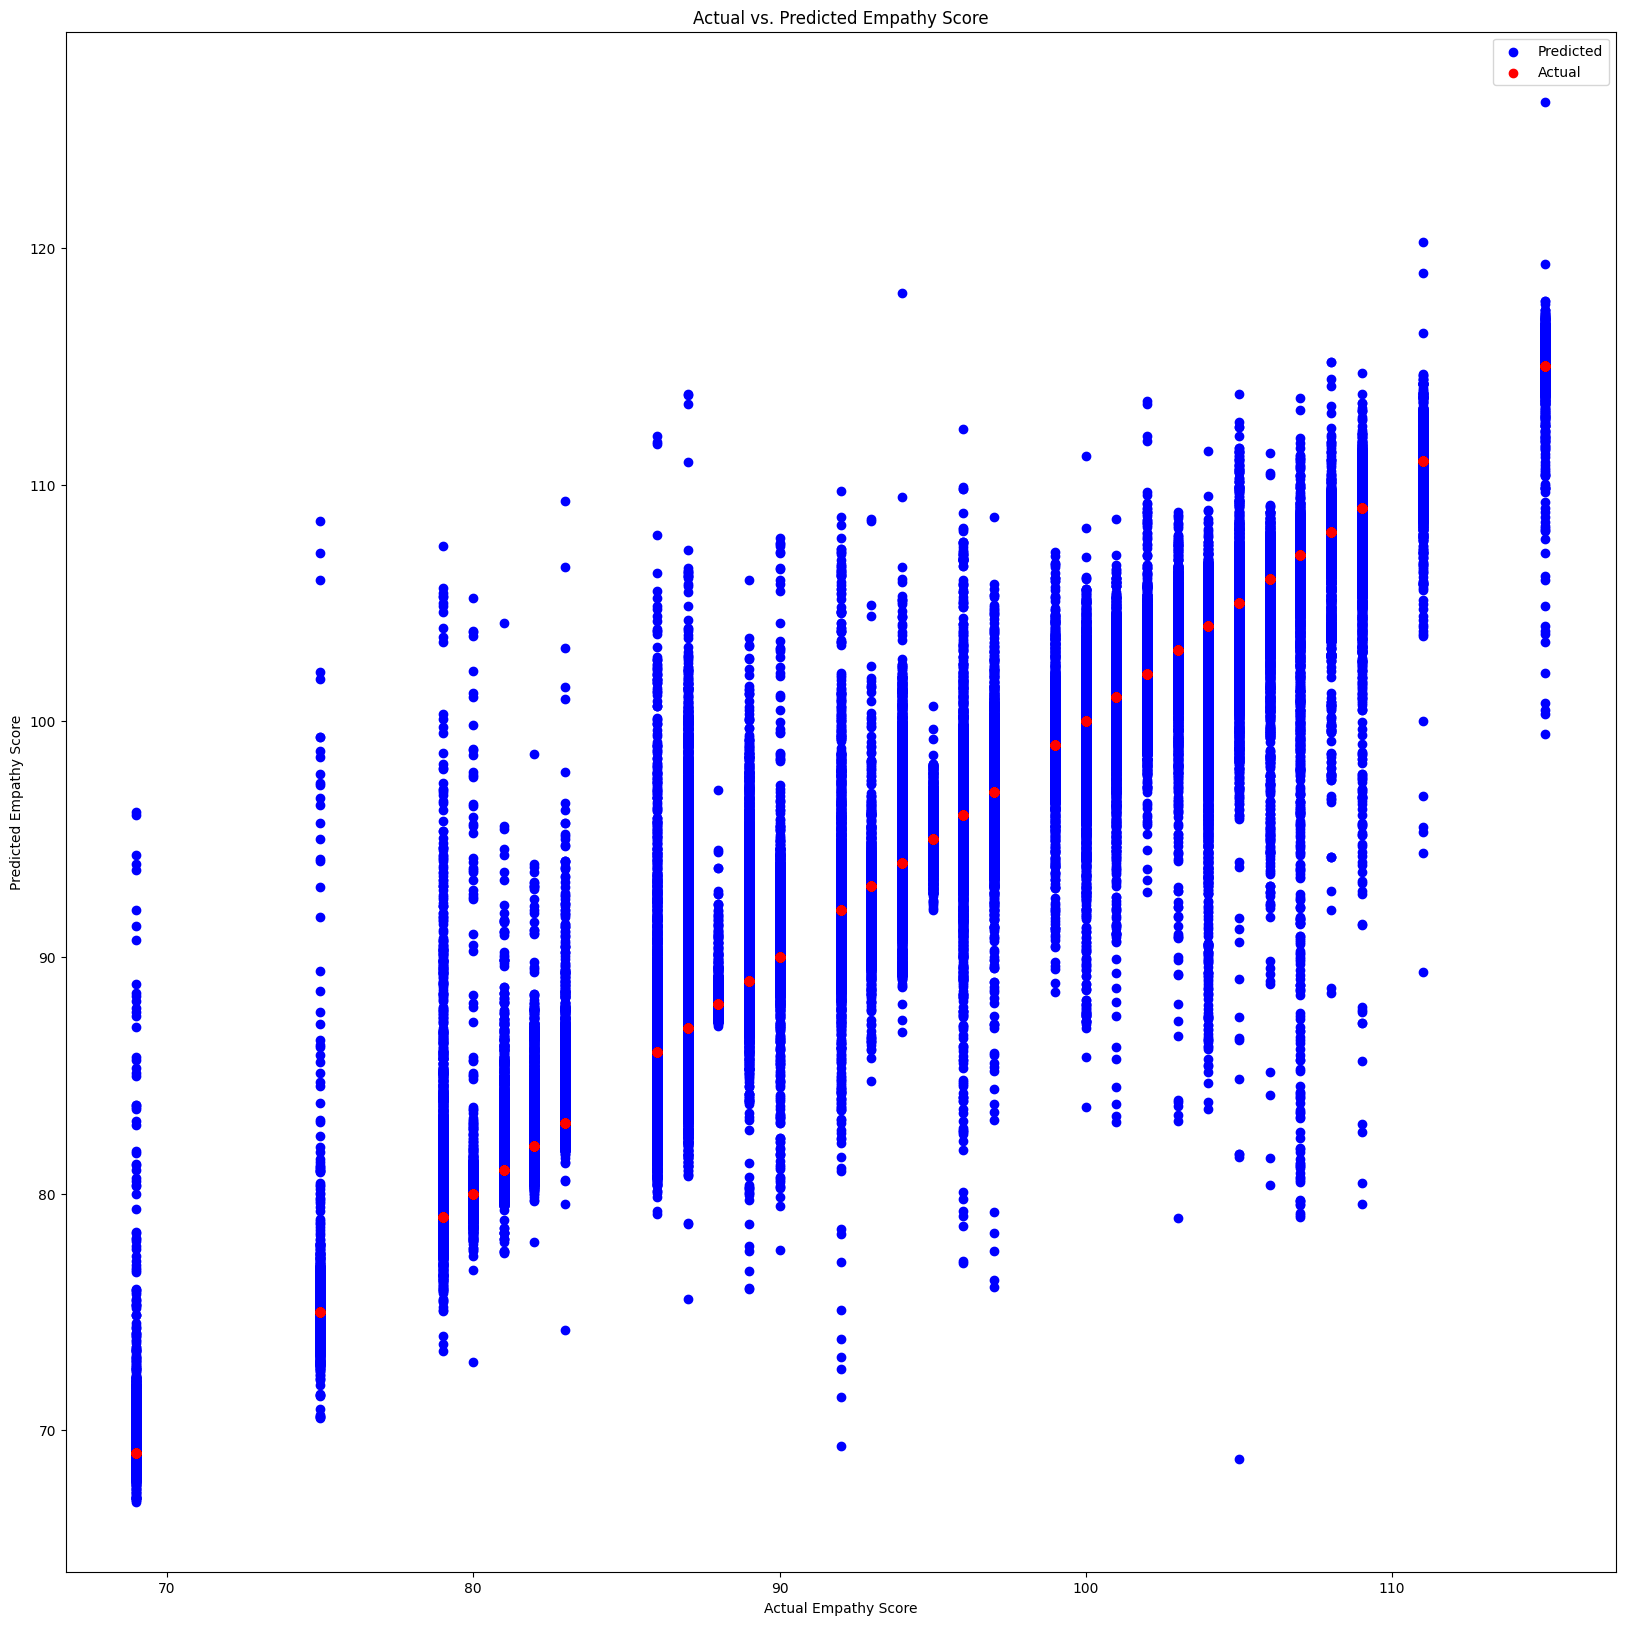

In [96]:
create_scatter_plot(y_test, predictions5)

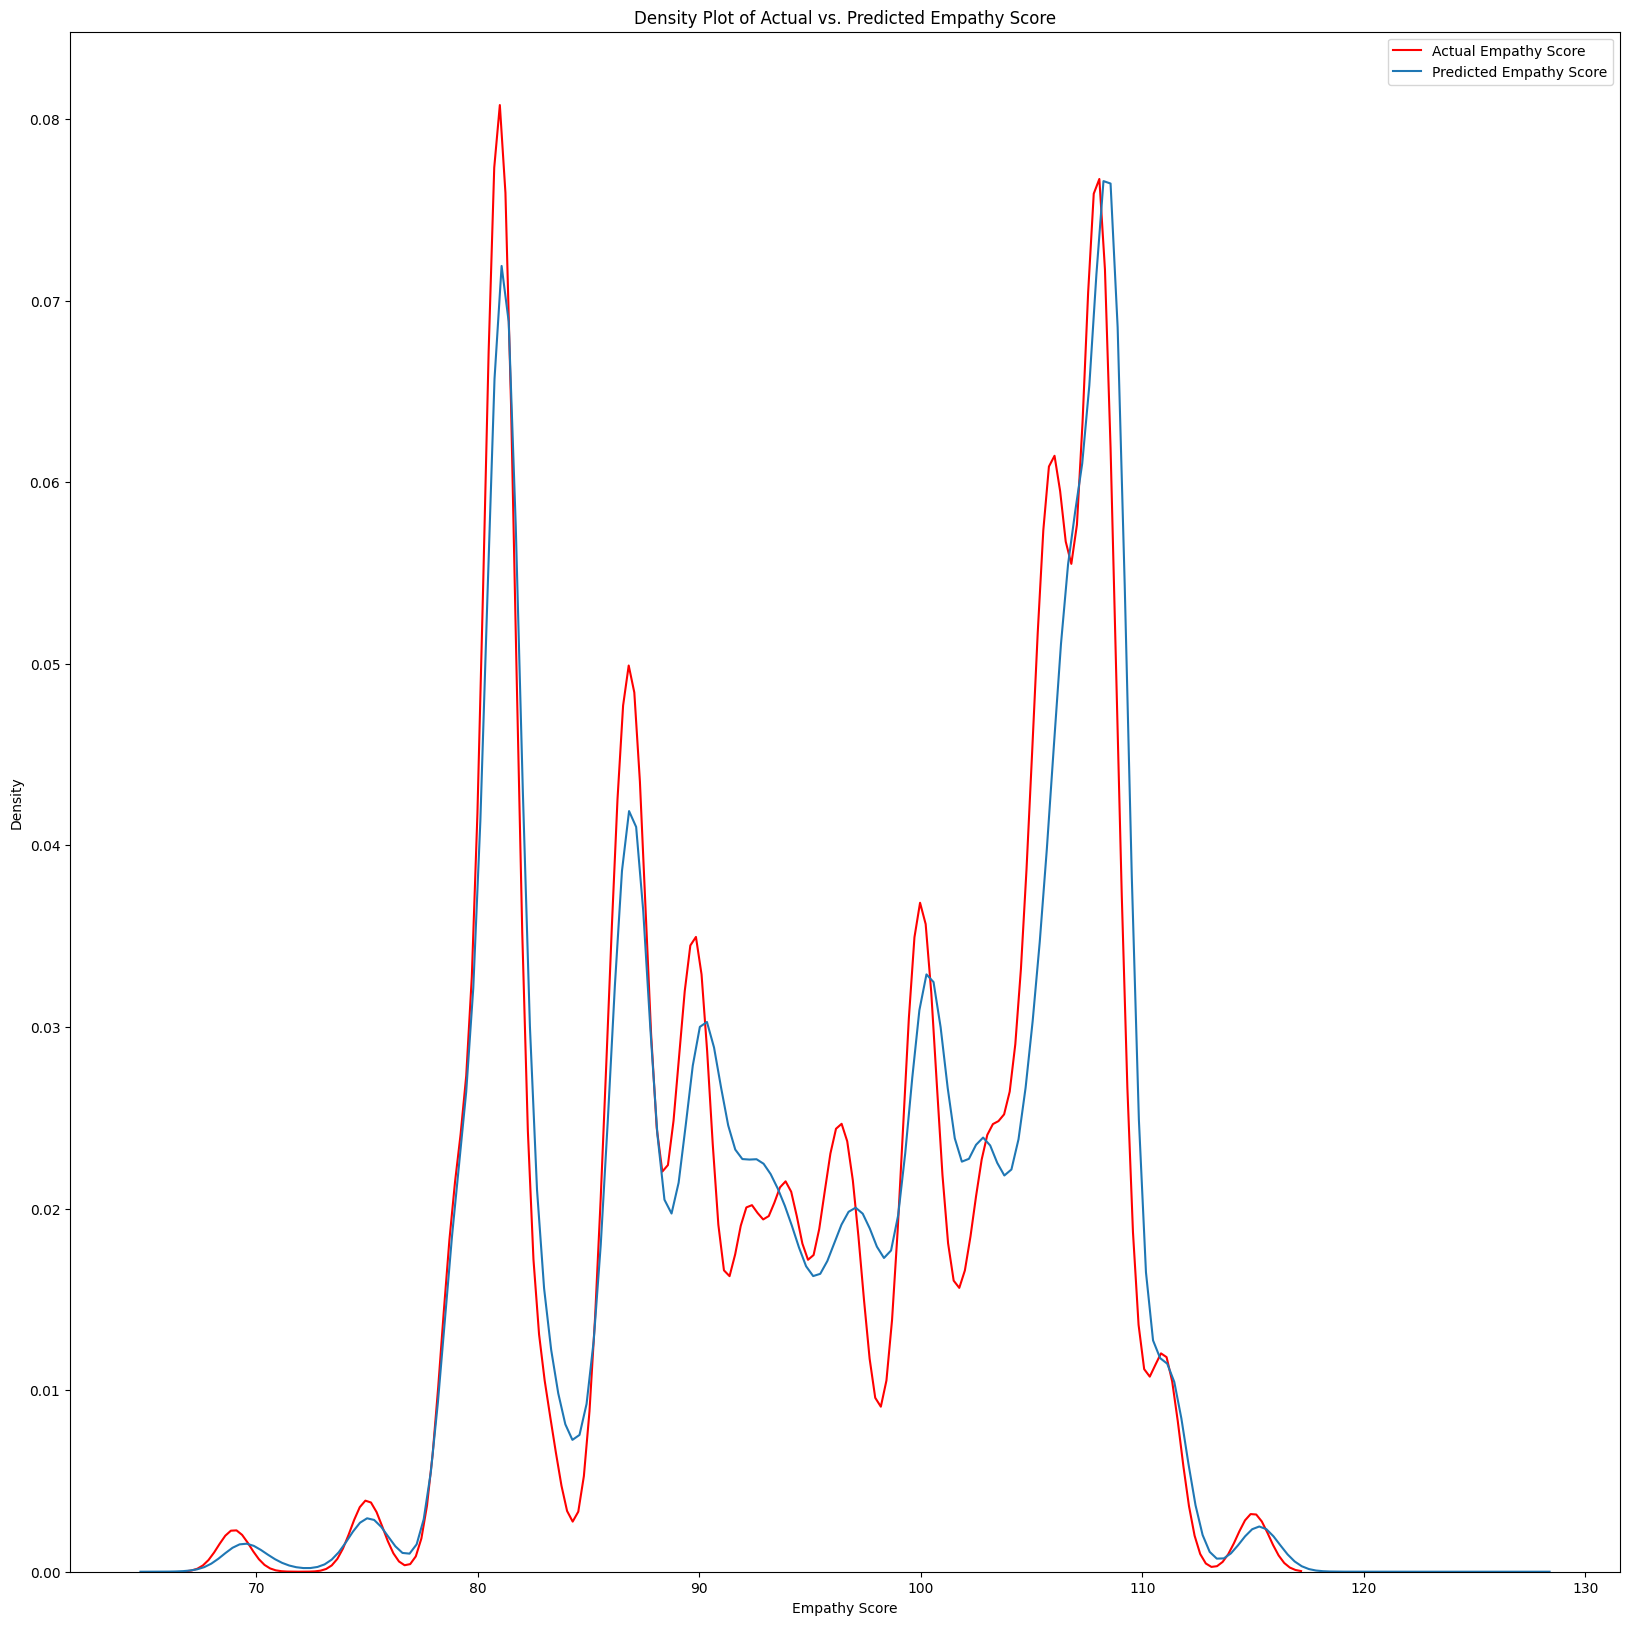

In [97]:
create_density_plots(y_test, predictions5)

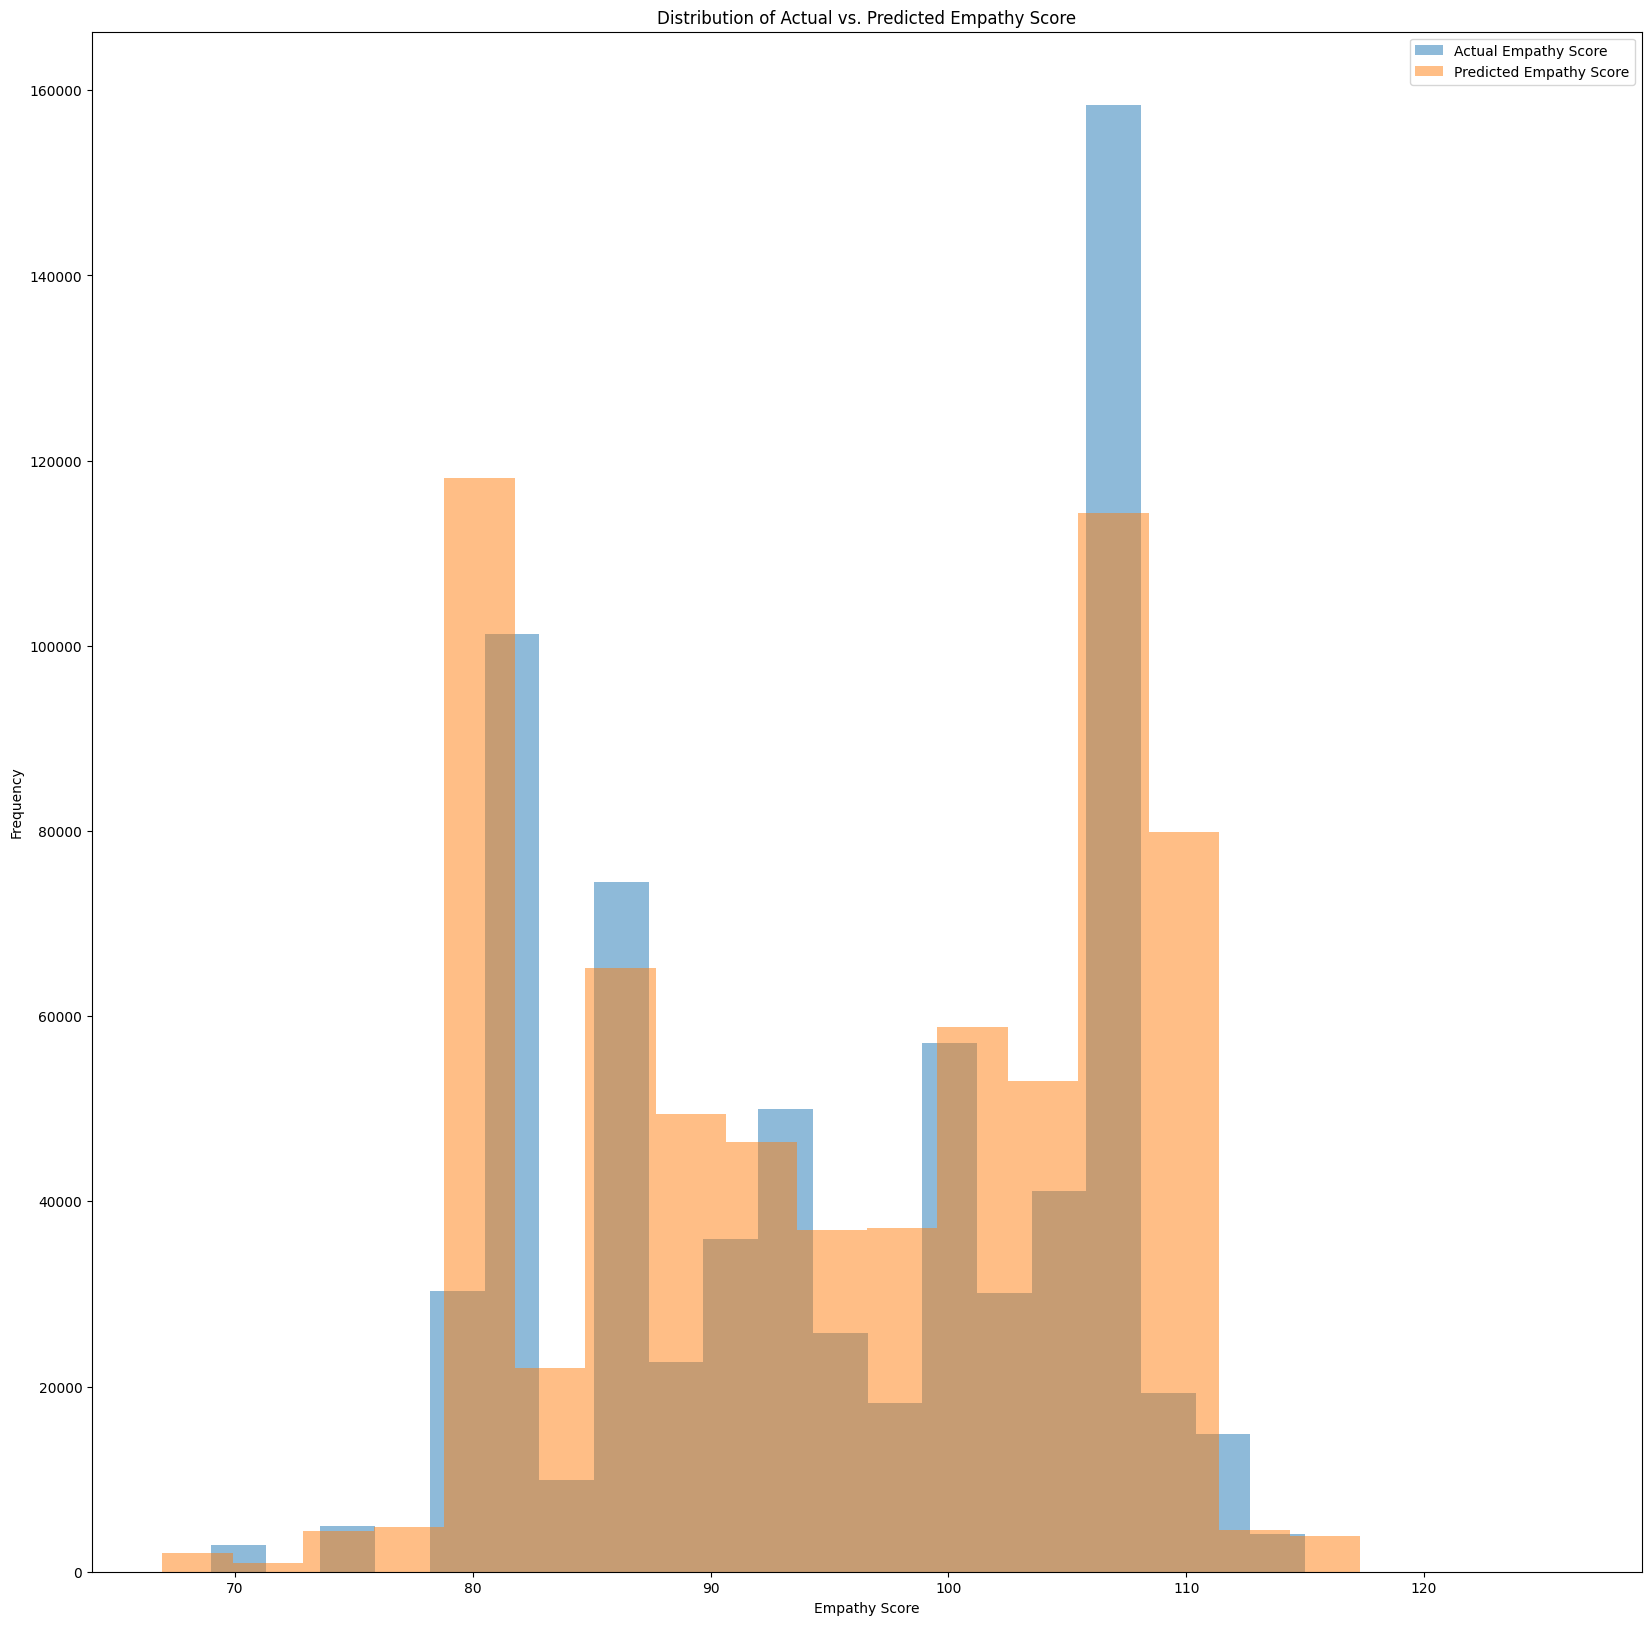

In [98]:
create_histograms(y_test, predictions5)

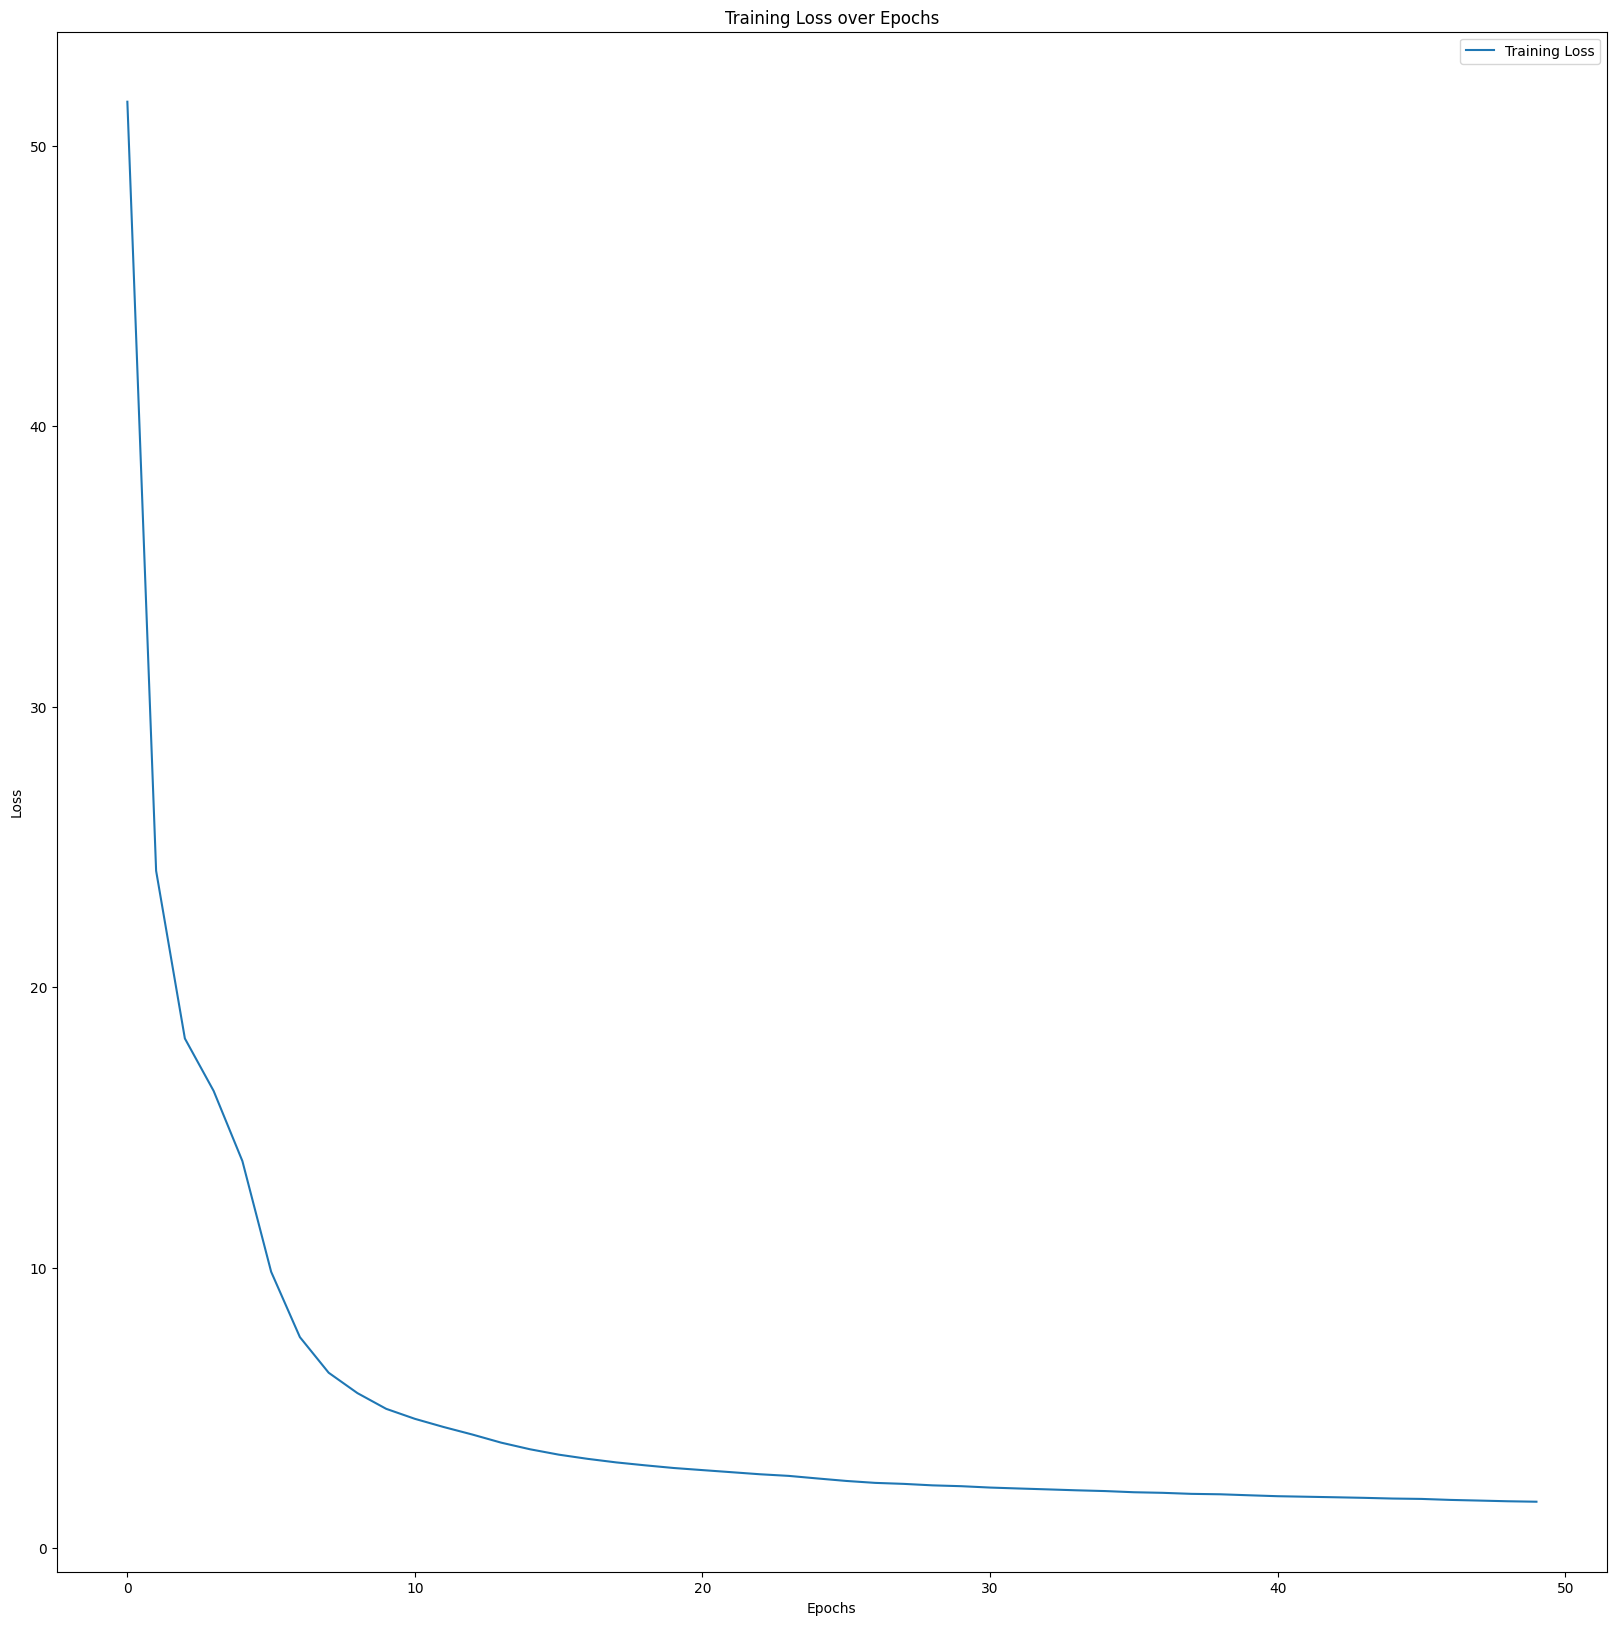

In [99]:
plot_loss_curve(history5)

In [100]:
from keras.models import load_model

# Load the saved model
my_model = load_model('model5.h5')
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,729
Trainable params: 3,729
Non-trainable params: 0
_________________________________________________________________


In [101]:
# concatenate y_test and predictions
df05 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), predictions5.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

# Round the predicted scores to 2 decimal places
df05['predictions'] = df05['predictions'].round()

# print the dataframe
df05.head(10)

y_test  predictions
0    81.0         81.0
1   108.0        108.0
2    79.0         79.0
3    79.0         80.0
4   106.0        106.0
5    90.0         91.0
6    81.0         81.0
7    96.0         97.0
8    86.0         86.0
9    81.0         81.0

In [132]:
calculate_mismatch_percentage(y_test, predictions, df05)

Number of values that do not match in predictions: 305602 out of 701462
Percentage of values that do not match in predictions: 43.57%
Number of values that do match in predictions: 395860 out of 701462
Percentage of values that do match in predictions: 56.43%


LinearRegression

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Initialize the Linear Regression model
model6 = LinearRegression()

# Train the model
model6.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_0 = model6.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_0)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_0)
r2 = r2_score(y_test, y_pred_0)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 77.99297241149094
Root Mean Squared Error (RMSE): 8.831362998512231
Mean Absolute Error (MAE): 7.362470865385281
R-squared Score: 0.31331199730900006


Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Linear Regression model
model7 = RandomForestRegressor(n_estimators=5)

# Train the model
model7.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_1 = model7.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 0.17803307948256644
Root Mean Squared Error (RMSE): 0.42193966331996624
Mean Absolute Error (MAE): 0.028568332995942754
R-squared Score: 0.998432510314932


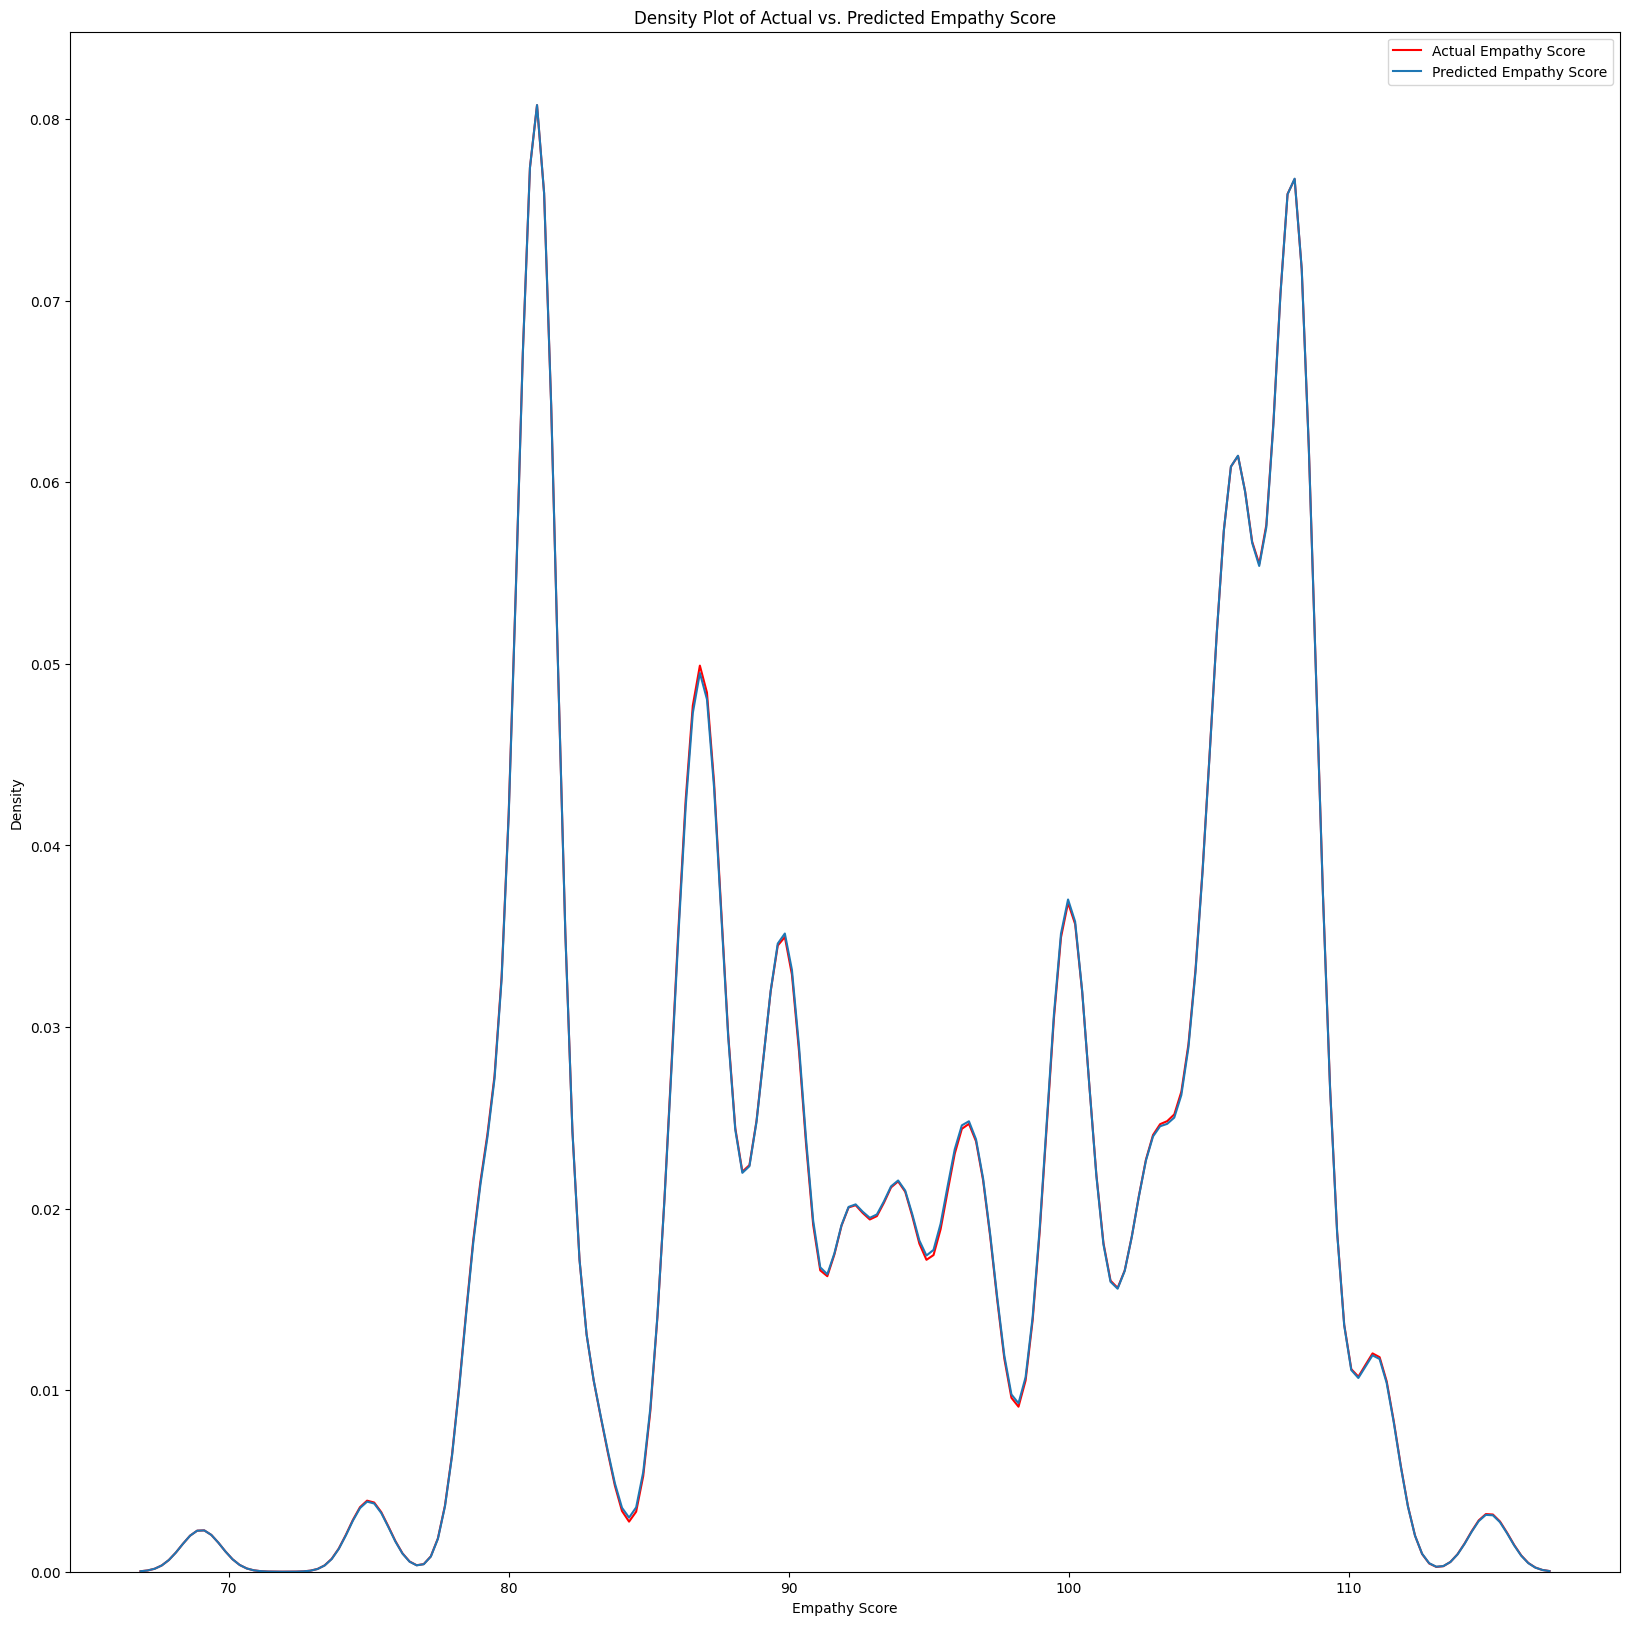

In [113]:
create_density_plots(y_test, y_pred_1)

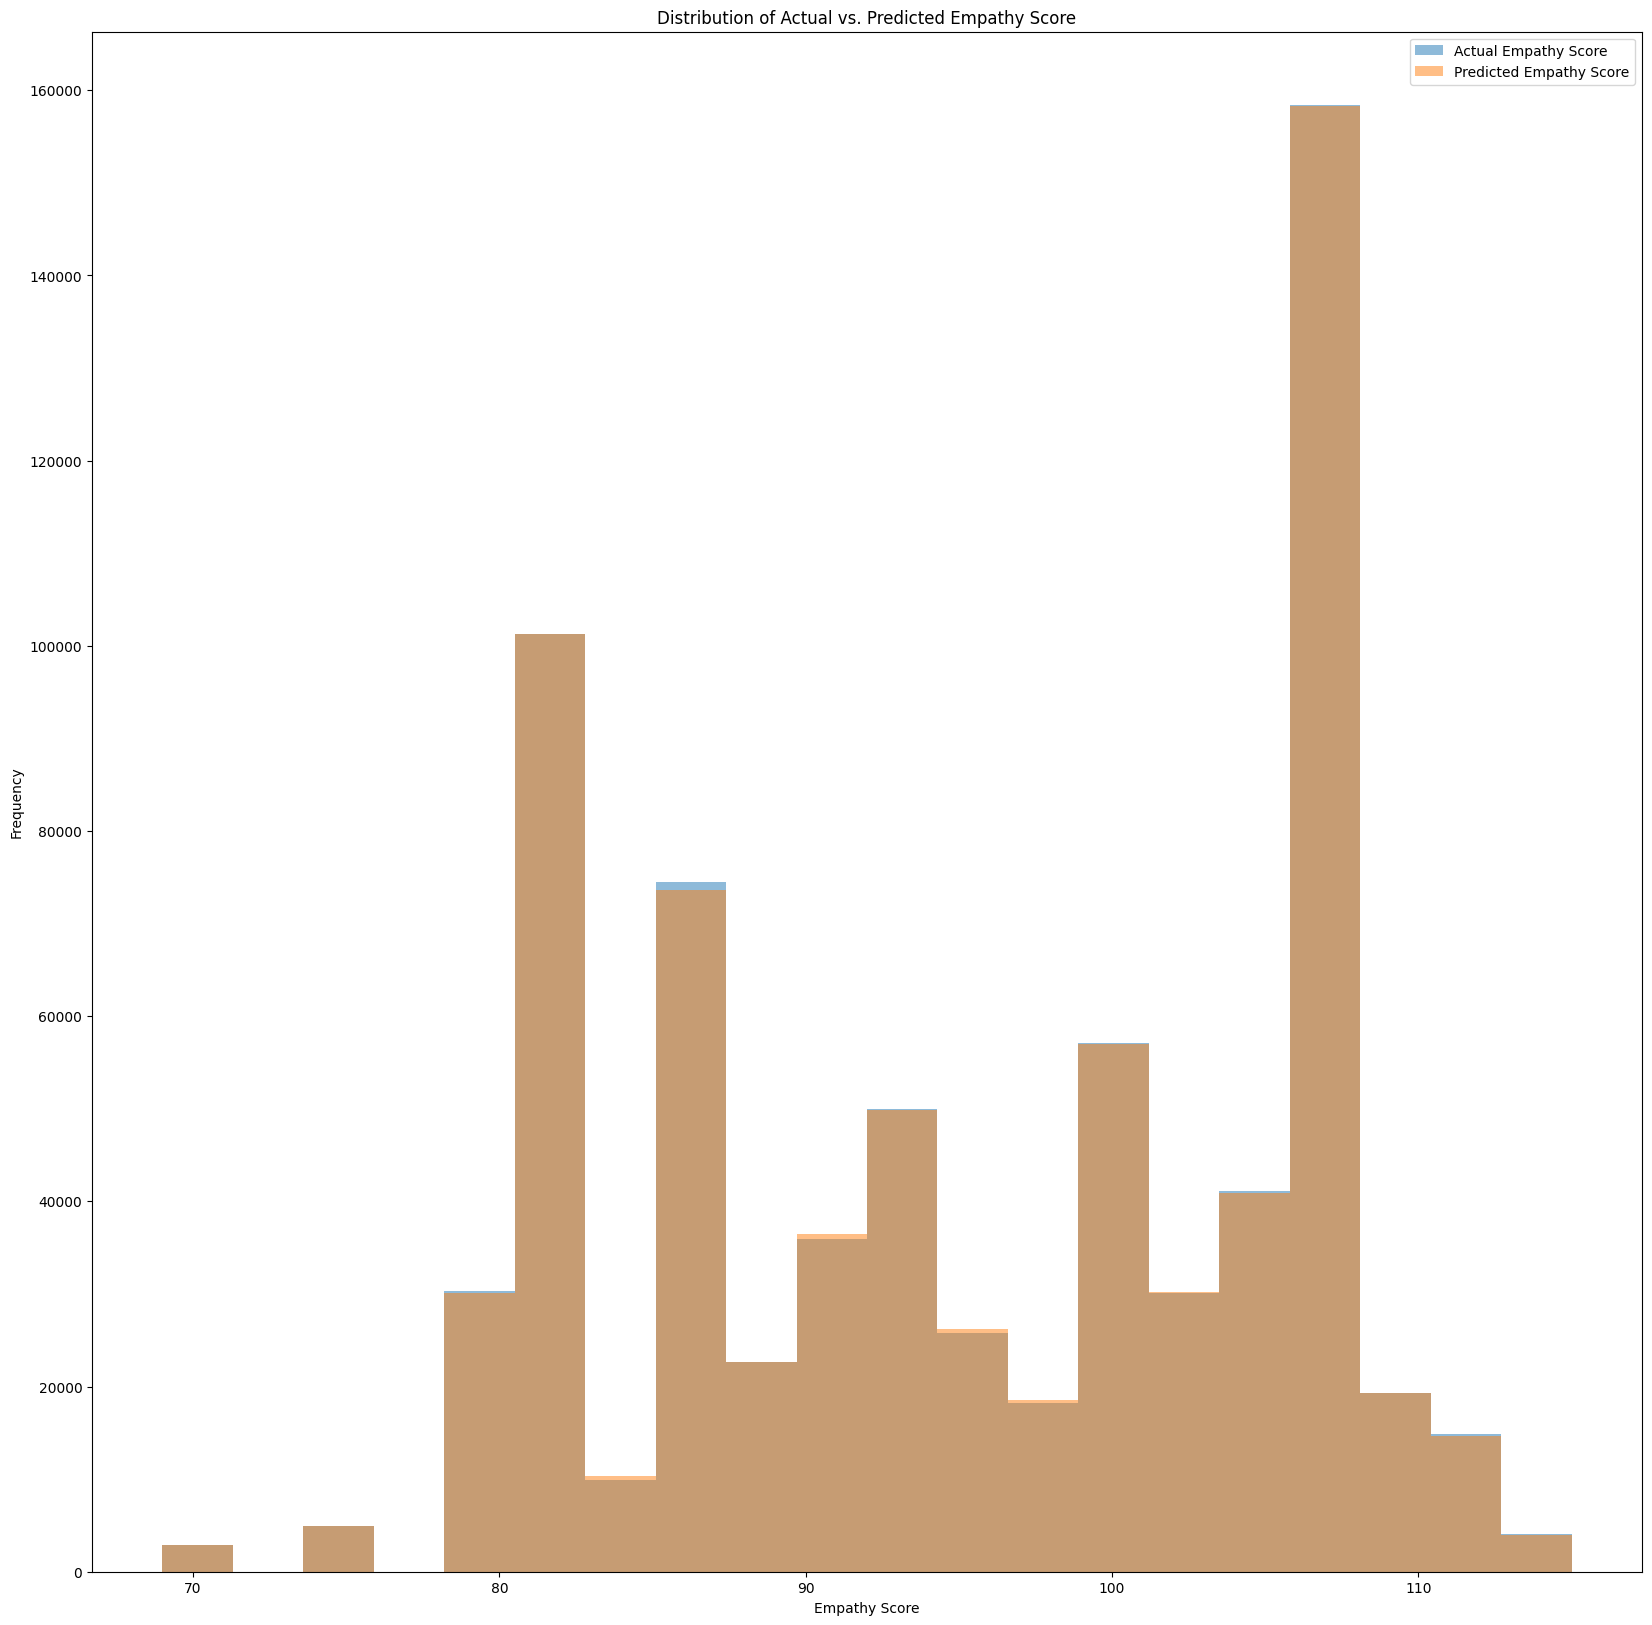

In [114]:
create_histograms(y_test, y_pred_1)

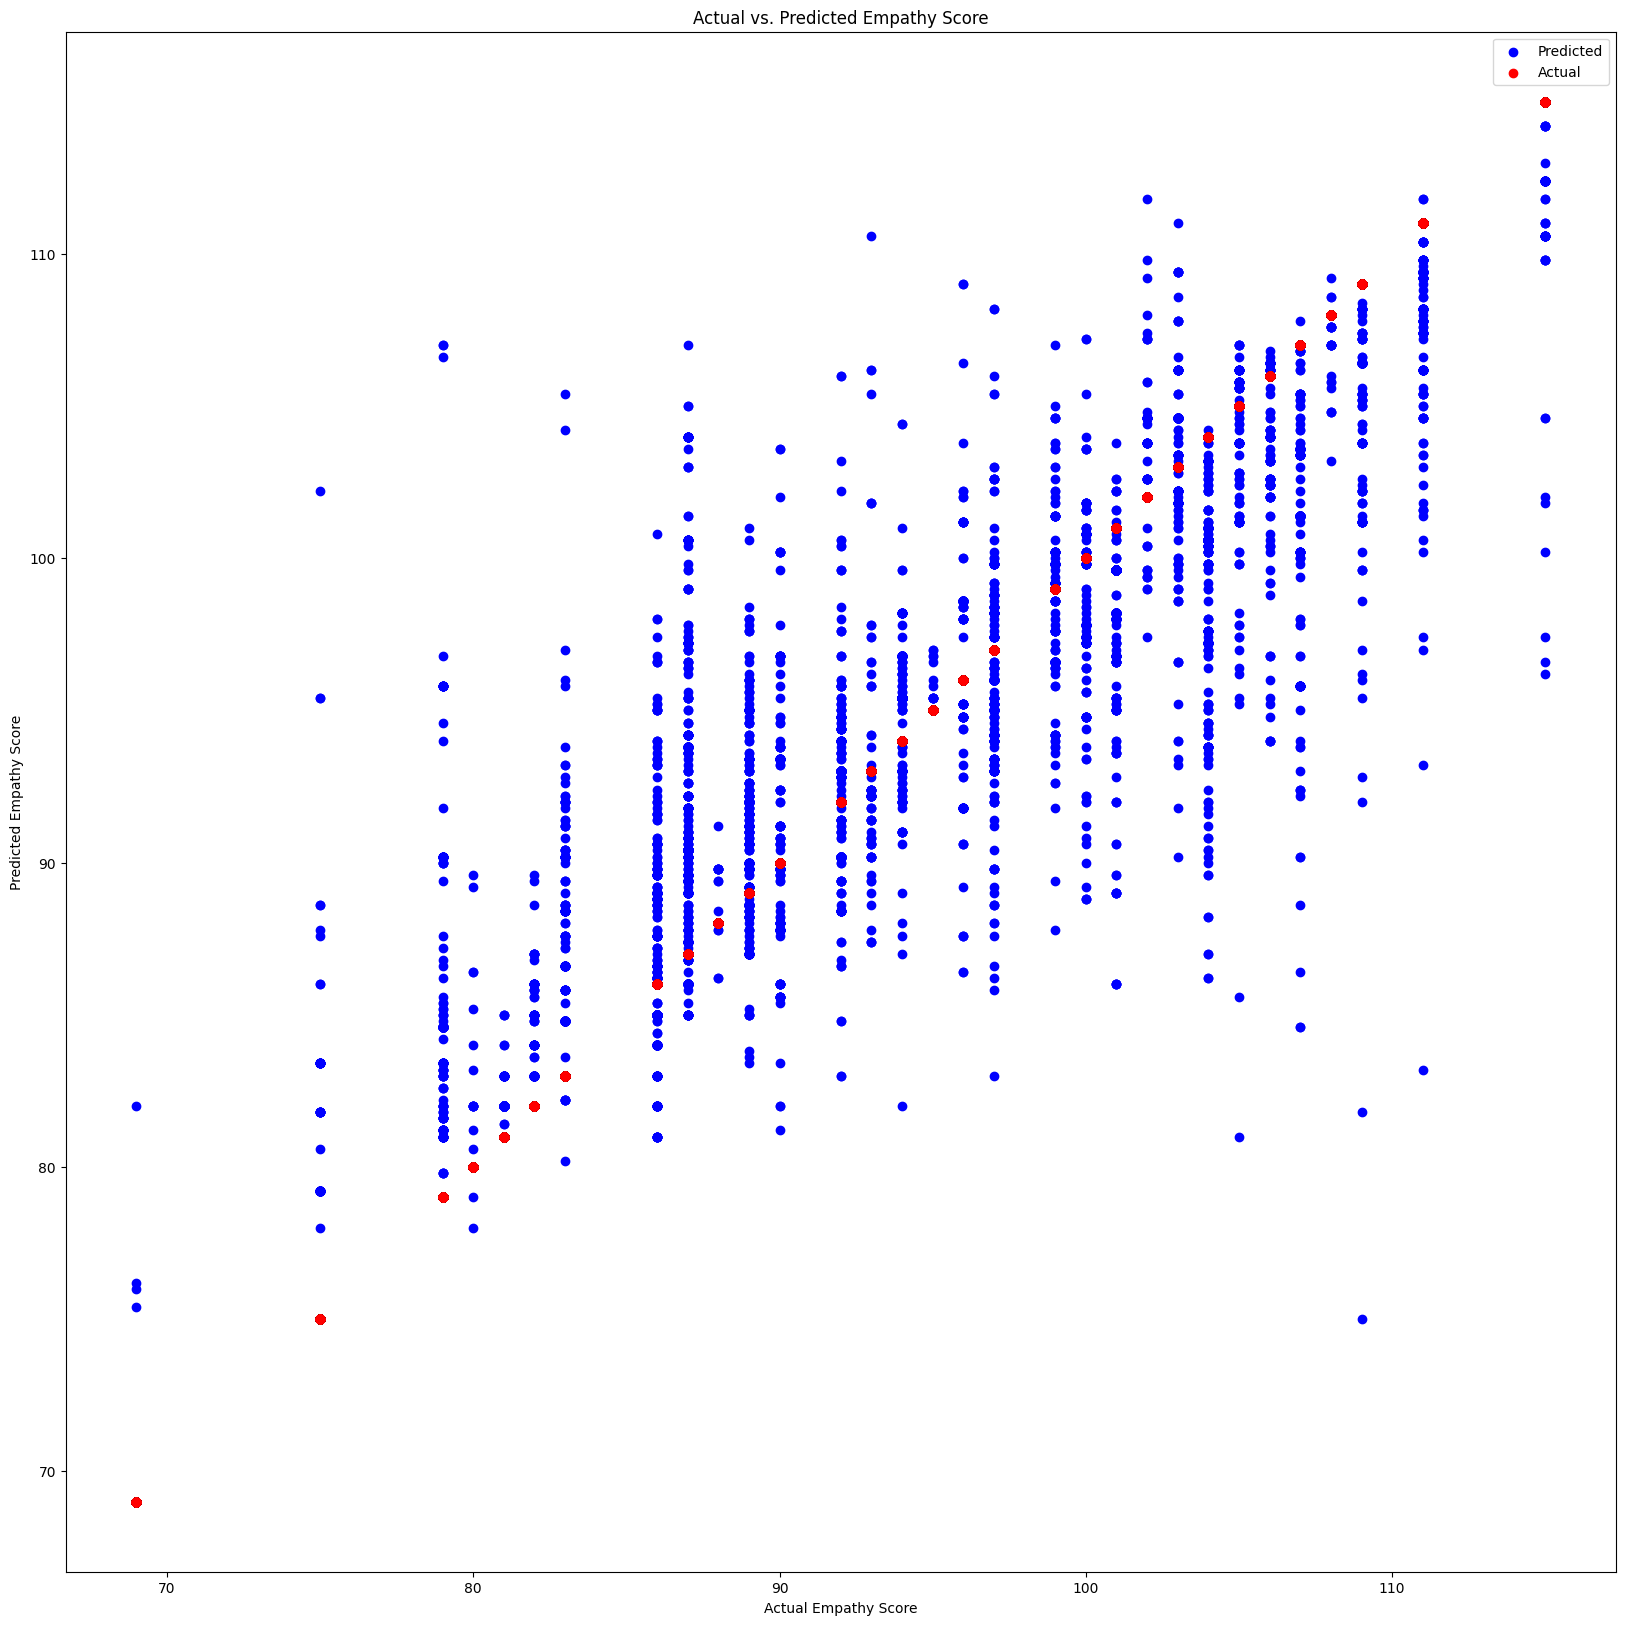

In [115]:
create_scatter_plot(y_test, y_pred_1)

In [116]:
# concatenate y_test and predictions
df07 = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), y_pred_1.reshape(-1,1)], axis=1), columns=['y_test', 'predictions'])

# Round the predicted scores to 2 decimal places
df07['predictions'] = df07['predictions'].round()

# print the dataframe
df07.head(10)

y_test  predictions
0    81.0         81.0
1   108.0        108.0
2    79.0         79.0
3    79.0         79.0
4   106.0        106.0
5    90.0         90.0
6    81.0         81.0
7    96.0         96.0
8    86.0         86.0
9    81.0         81.0

In [133]:
calculate_mismatch_percentage(y_test, predictions, df07)

Number of values that do not match in predictions: 5742 out of 701462
Percentage of values that do not match in predictions: 0.82%
Number of values that do match in predictions: 695720 out of 701462
Percentage of values that do match in predictions: 99.18%


Based on the MSE, RMSE, MAE, and R-squared score values, the model's performance appears to be very good, with highly accurate predictions and a high degree of explanation of the variance in the target variable.

Let's interpret the different evaluation metrics:

    * Mean Squared Error (MSE): The MSE is a measure of the average squared difference between the predicted values and the actual values. A lower MSE indicates better accuracy, with 0 being a perfect score. In this case, the MSE value of 0.17803307948256644 is very close to 0, which indicates that the model's predictions are very accurate.

    * Root Mean Squared Error (RMSE): The RMSE is the square root of MSE and provides an estimate of the standard deviation of the residuals (i.e., the prediction errors). Like MSE, a lower RMSE indicates better accuracy, with 0 being a perfect score. In this case, the RMSE value of 0.42193966331996624 is also very low, indicating that the model's predictions are highly accurate.

    * Mean Absolute Error (MAE): The MAE is a measure of the average absolute difference between the predicted values and the actual values. Similar to MSE and RMSE, a lower MAE indicates better accuracy, with 0 being a perfect score. The MAE value of 0.028568332995942754 is very close to 0, which indicates that the model's predictions are highly accurate.

    * R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the target variable (y_test) that is explained by the model's predictions. R-squared ranges from 0 to 1, with 1 being a perfect score indicating that the model explains all of the variance in the target variable. In this case, the R-squared score of 0.998432510314932 is very close to 1, indicating that the model's predictions explain almost all of the variance in the target variable, and thus, the model's performance is excellent.